In [1]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import plotly.plotly as py
from plotly.graph_objs import *
from sklearn.preprocessing import scale, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn import linear_model, svm, metrics
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_regression, chi2
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
%matplotlib inline

In [3]:
df =pd.read_excel('zephyr.xlsx')

In [4]:
df.head(3)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
0,113 Pixley St,Cow Hollow,3,3.5,2,1360,2022.058824,04/29/16,0.0,73,2900000,2750000,94.827586,1,0,7
1,129 Pixley St,Cow Hollow,2,1.0,2,907,1198.456450,11/14/13,0.0,12,929000,1087000,117.007535,0,1,7
2,133 Richardson Ave,Cow Hollow,3,3.0,2,2323,895.393887,01/07/16,0.0,66,2300000,2080000,90.434783,1,0,7


In [5]:
df.count()


address               4340
district              4340
bedroom               4340
bath                  4340
parking               4340
sqft                  4340
dollar_sqft           4340
sold                  4340
home_own_ass          4340
day_on_market         4340
list_price            4340
sale_price            4340
sale_to_list_ratio    4340
single_f_h            4340
condo                 4340
dist_no               4340
dtype: int64

In [6]:
df.describe()

,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
count,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4.340000e+03,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000
mean,2.336175,1.893318,1.232719,1503.111982,923.276636,398.056205,37.090323,1.435411e+06,1.474744e+06,106.519624,0.421198,0.578802,8.493088
std,1.201762,1.018042,0.712214,1032.974956,408.073486,740.361354,42.669865,1.799308e+06,1.666112e+06,12.552190,0.493808,0.493808,1.245854
min,0.000000,1.000000,0.000000,210.000000,125.000000,0.000000,0.000000,1.395000e+05,1.399000e+05,57.368421,0.000000,0.000000,7.000000
25%,2.000000,1.000000,1.000000,949.750000,621.382563,0.000000,13.000000,6.480000e+05,6.900000e+05,100.000000,0.000000,0.000000,7.000000
50%,2.000000,2.000000,1.000000,1249.500000,889.857636,278.150000,25.000000,8.490000e+05,9.010000e+05,104.838710,0.000000,1.000000,8.000000
75%,3.000000,2.000000,2.000000,1729.250000,1133.049747,584.595000,47.000000,1.452500e+06,1.500000e+06,113.461226,1.000000,1.000000,10.000000
max,14.000000,11.000000,7.000000,20516.000000,5597.014925,31356.770000,609.000000,3.900000e+07,3.100000e+07,192.093023,1.000000,1.000000,10.000000


In [7]:
print df.columns

Index([u'address', u'district', u'bedroom', u'bath', u'parking', u'sqft',
       u'dollar_sqft', u'sold', u'home_own_ass', u'day_on_market',
       u'list_price', u'sale_price', u'sale_to_list_ratio', u'single_f_h',
       u'condo', u'dist_no'],
      dtype='object')


In [8]:
sold_dt = pd.to_datetime(df.sold, infer_datetime_format=True)

In [9]:
sold_dt.head(3)

0   2016-04-29
1   2013-11-14
2   2016-01-07
Name: sold, dtype: datetime64[ns]

In [10]:
df.sold = sold_dt

In [11]:
df.sold.head(3)


0   2016-04-29
1   2013-11-14
2   2016-01-07
Name: sold, dtype: datetime64[ns]

In [12]:
df.head(3)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
0,113 Pixley St,Cow Hollow,3,3.5,2,1360,2022.058824,2016-04-29,0.0,73,2900000,2750000,94.827586,1,0,7
1,129 Pixley St,Cow Hollow,2,1.0,2,907,1198.456450,2013-11-14,0.0,12,929000,1087000,117.007535,0,1,7
2,133 Richardson Ave,Cow Hollow,3,3.0,2,2323,895.393887,2016-01-07,0.0,66,2300000,2080000,90.434783,1,0,7


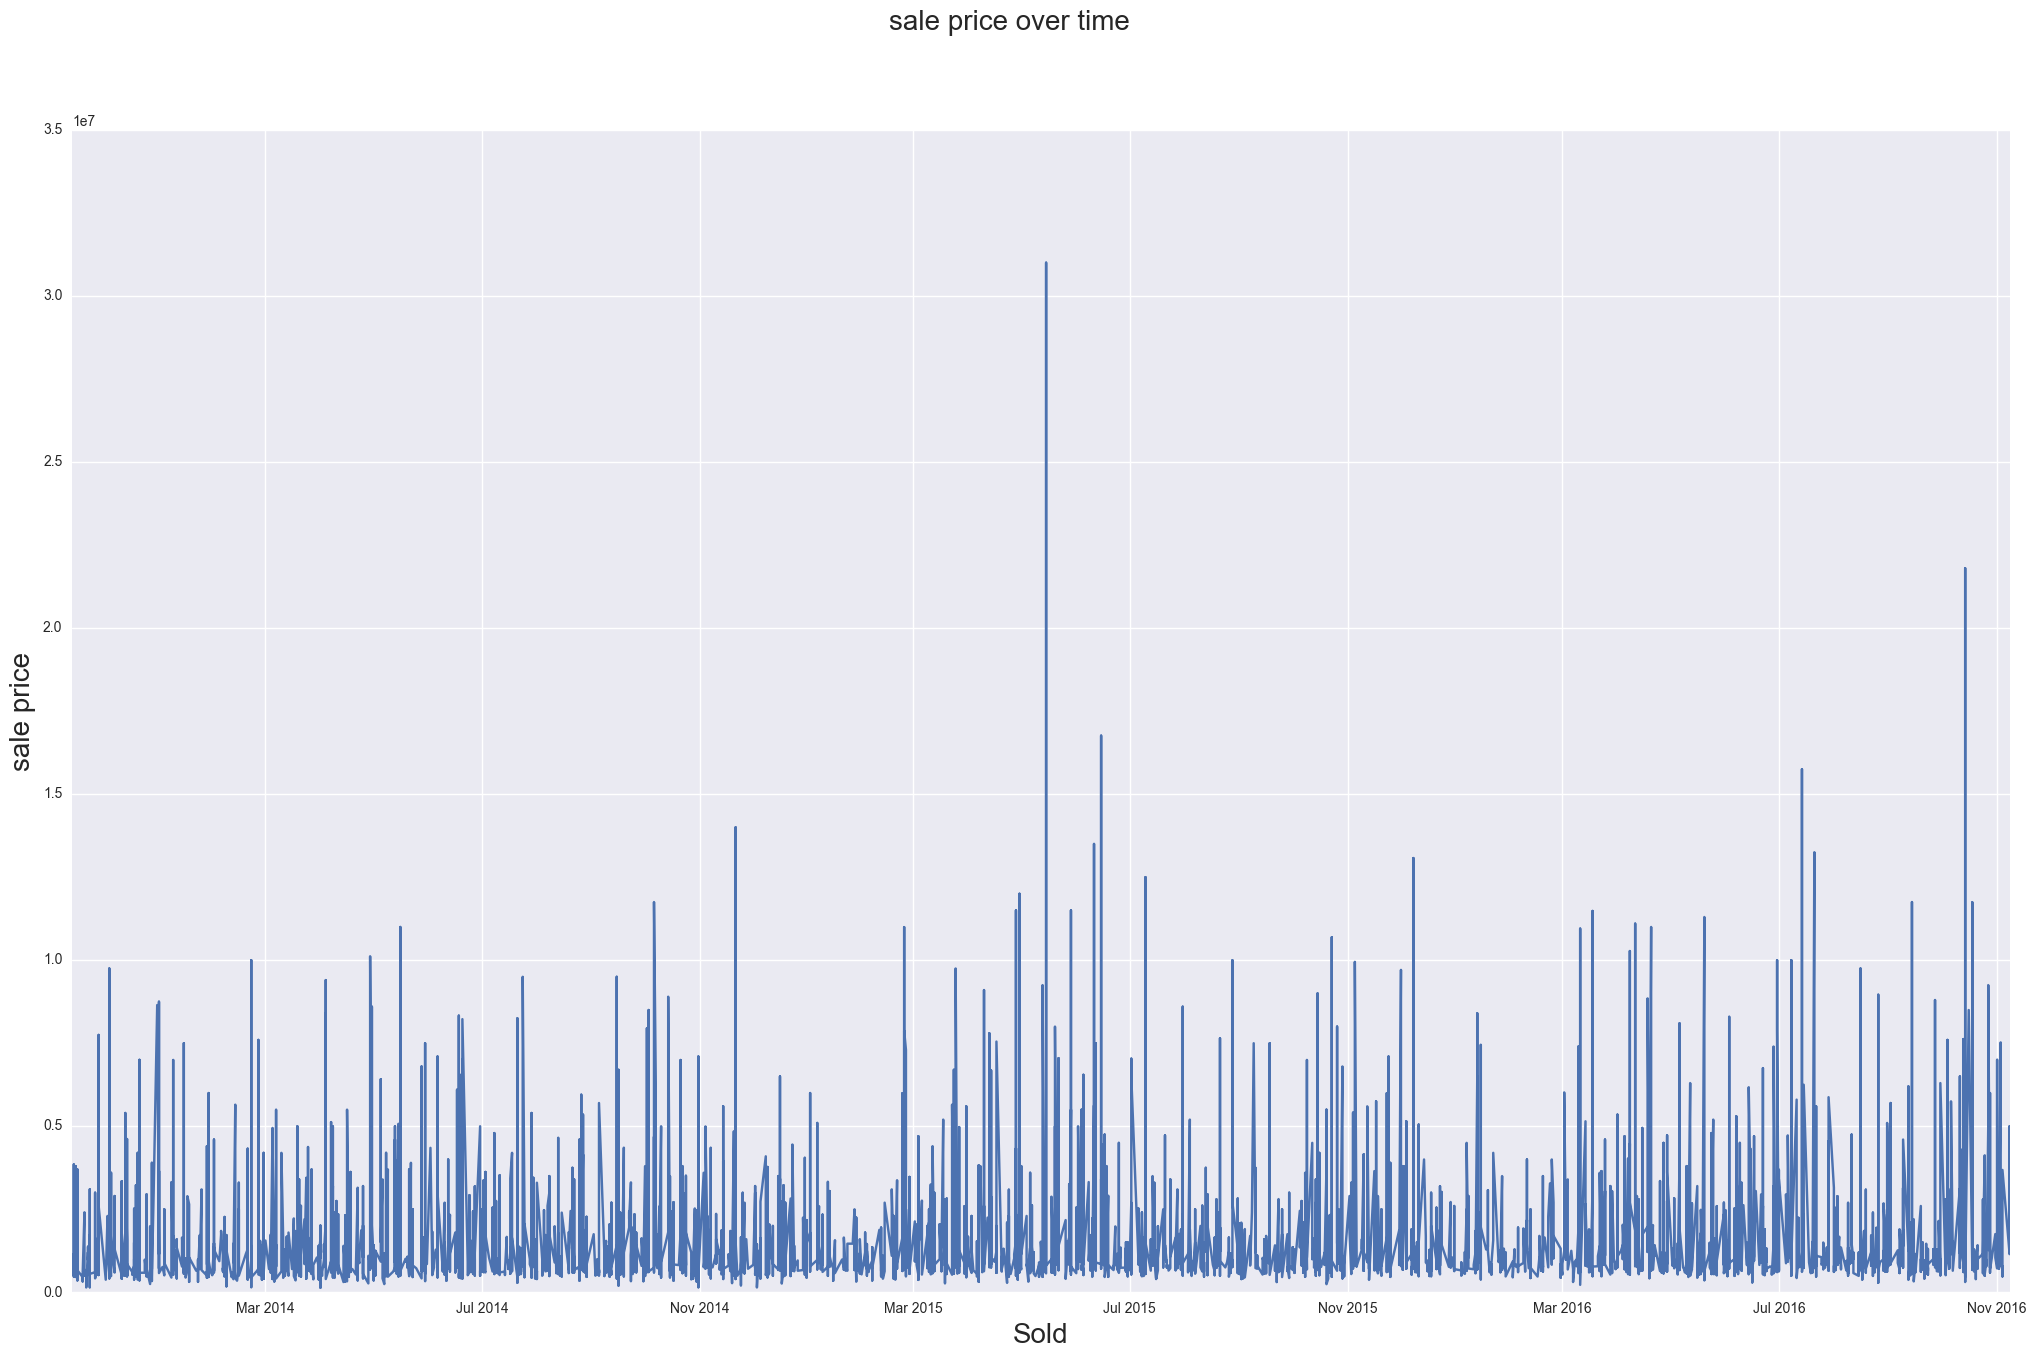

In [43]:
fig = plt.figure(figsize=(25,15))
plt.plot(df.sort_values('sold').sold, df.sort_values('sold').sale_price)
fig.suptitle('sale price over time', fontsize=20)
plt.xlabel('Sold', fontsize=20)
plt.ylabel('sale price', fontsize=20)
plt.show()


In [17]:
sp_log = np.log10(df.sort_values('sold').sale_price)

In [18]:
sp_log.head(3)

1349    5.785330
1812    6.053078
1469    5.774517
Name: sale_price, dtype: float64

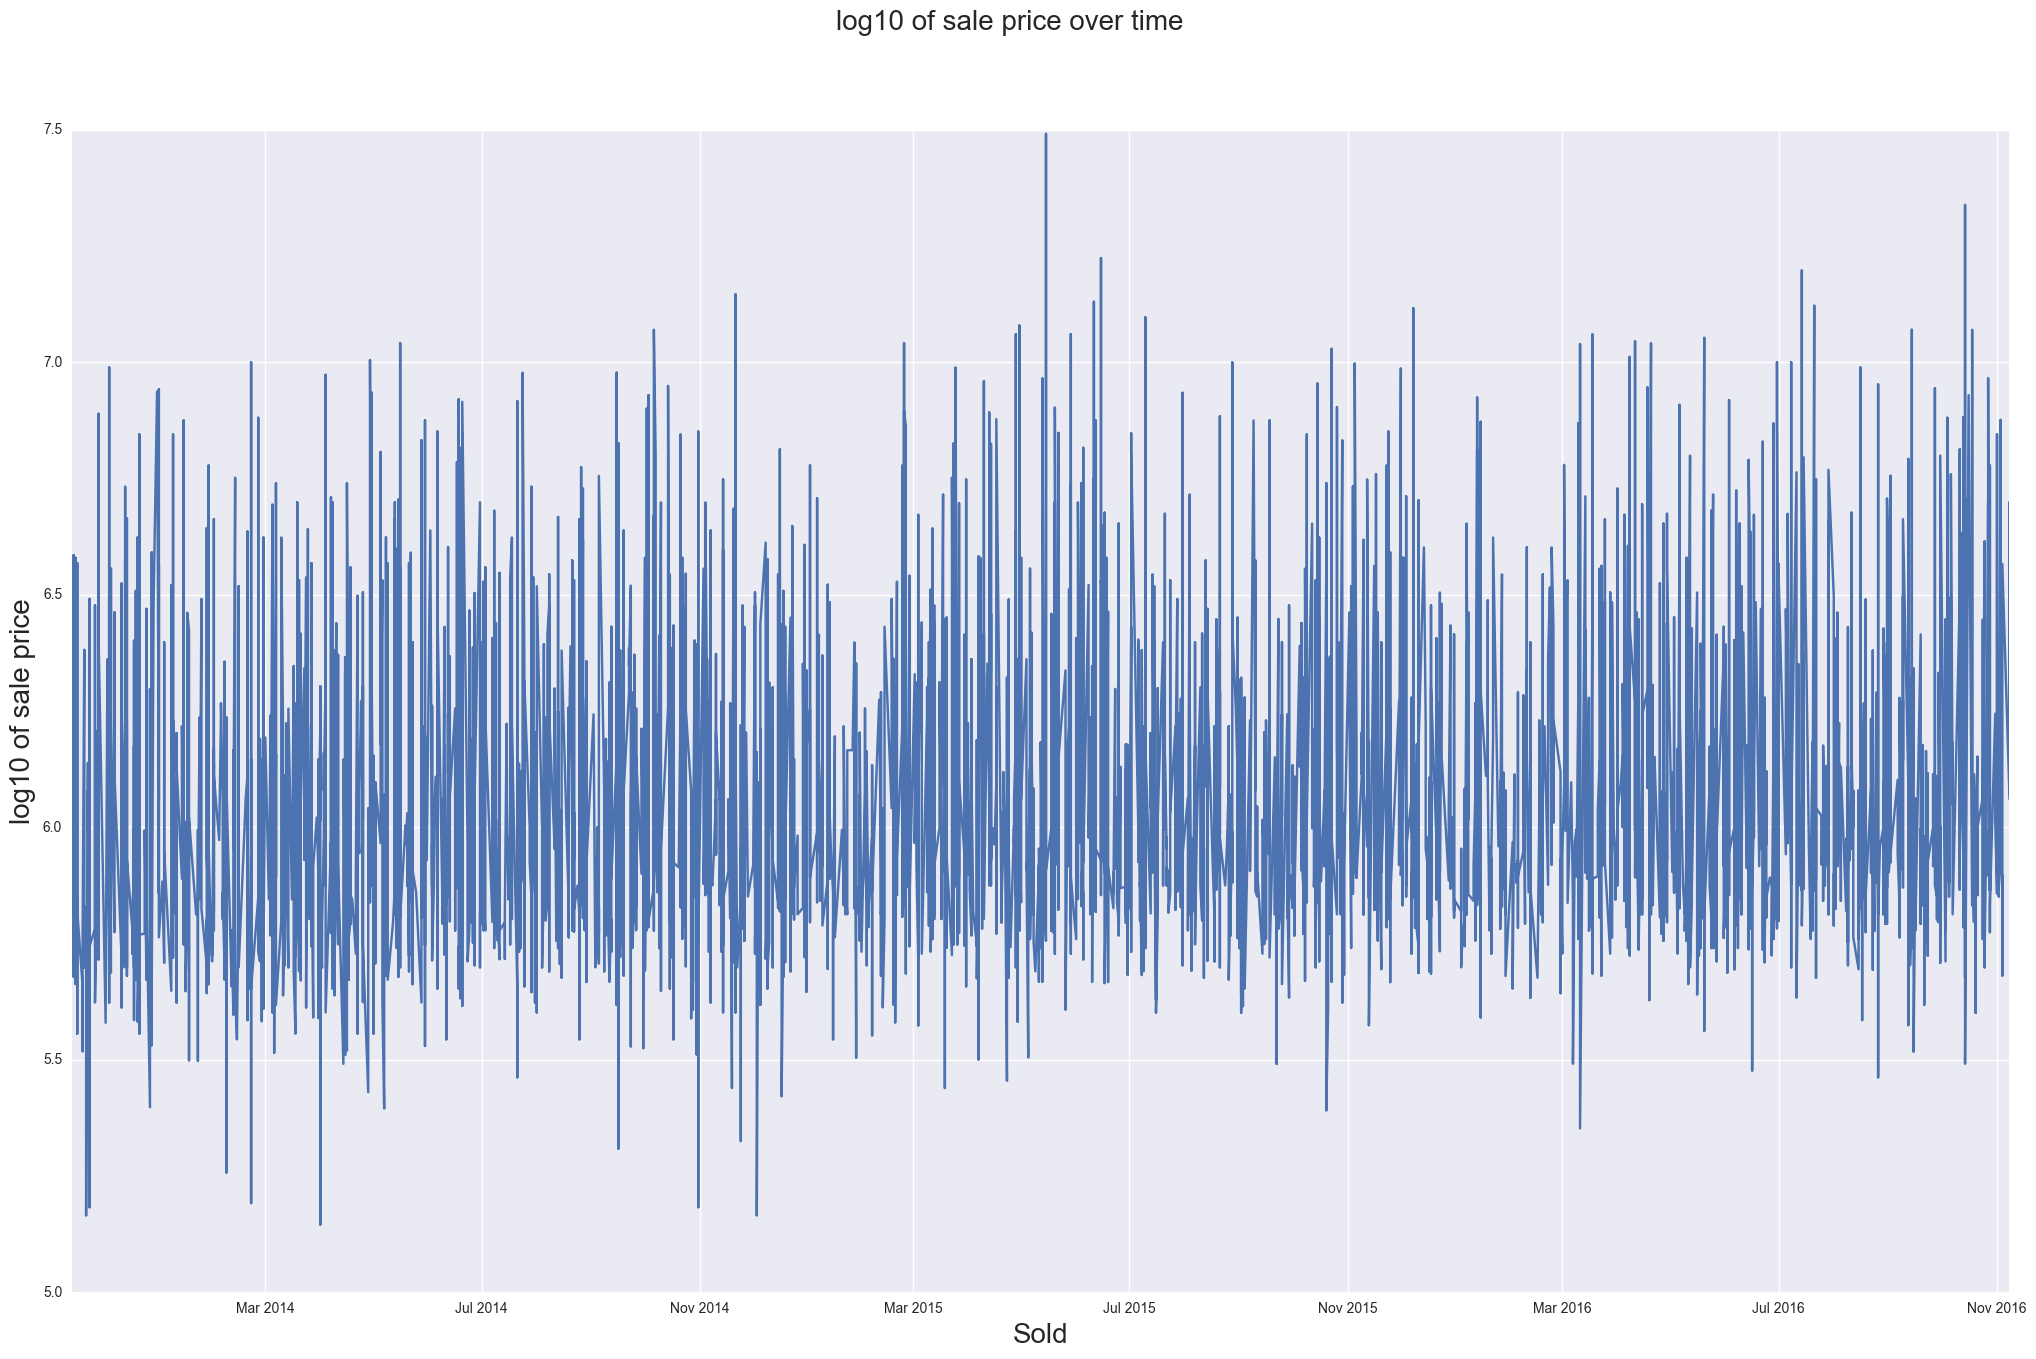

In [44]:
fig = plt.figure(figsize=(25,15))
plt.plot(df.sort_values('sold').sold, sp_log)
fig.suptitle('log10 of sale price over time', fontsize=20)
plt.xlabel('Sold', fontsize=20)
plt.ylabel('log10 of sale price', fontsize=20)
plt.show()

In [21]:
format = lambda x: x.year
df.sold_year = df.sold.map(format)
df['sold_year'] = pd.Series(df.sold_year, index=df.index)

In [22]:
df.sold_year.head(3)

0    2016
1    2013
2    2016
Name: sold, dtype: int64

In [25]:
format2 = lambda x: x.month
df.sold_month = df.sold.map(format2)
df['sold_month'] = pd.Series(df.sold_month, index=df.index)

In [26]:
df.sold_month.head(3)

0     4
1    11
2     1
Name: sold, dtype: int64

In [27]:
df.head(3)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
0,113 Pixley St,Cow Hollow,3,3.5,2,1360,2022.058824,2016-04-29,0.0,73,2900000,2750000,94.827586,1,0,7,2016,4
1,129 Pixley St,Cow Hollow,2,1.0,2,907,1198.456450,2013-11-14,0.0,12,929000,1087000,117.007535,0,1,7,2013,11
2,133 Richardson Ave,Cow Hollow,3,3.0,2,2323,895.393887,2016-01-07,0.0,66,2300000,2080000,90.434783,1,0,7,2016,1


In [28]:
print '\nmodel with year month columns, no log10: \n'
model_y_m = smf.ols(formula='sale_price ~ district + bedroom + bath + parking + sqft + home_own_ass + day_on_market + list_price + single_f_h + condo + dist_no + sold_year + sold_month', data=df)
linreg_no_log = model_y_m.fit()
print linreg_no_log.summary()


model with year month columns, no log10: 

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     6003.
Date:                Sun, 27 Nov 2016   Prob (F-statistic):               0.00
Time:                        21:29:23   Log-Likelihood:                -59978.
No. Observations:                4340   AIC:                         1.200e+05
Df Residuals:                    4306   BIC:                         1.202e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------

In [29]:
df_sold = df.sort_values('sold')
df_sold = df_sold.set_index('sold')

In [30]:
df_sold.head(3)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
sold,,,,,,,,,,,,,,,,,
2013-11-12,930 Pine #211,Downtown,1,1.0,1,700,871.428571,511.14,35,599000,610000,101.836394,0,1,8,2013,11
2013-11-12,20 Vandewater St,North Beach,2,2.0,1,1456,776.098901,565.00,38,1195000,1130000,94.560669,0,1,8,2013,11
2013-11-12,946 Stockton St #14A,Financial District,2,1.5,0,744,799.731183,556.00,8,500000,595000,119.000000,0,1,8,2013,11


In [35]:
df_sold.index[0:20]

DatetimeIndex(['2013-11-12', '2013-11-12', '2013-11-12', '2013-11-13',
               '2013-11-13', '2013-11-13', '2013-11-13', '2013-11-13',
               '2013-11-13', '2013-11-13', '2013-11-13', '2013-11-13',
               '2013-11-13', '2013-11-13', '2013-11-13', '2013-11-14',
               '2013-11-14', '2013-11-14', '2013-11-14', '2013-11-14'],
              dtype='datetime64[ns]', name=u'sold', freq=None)

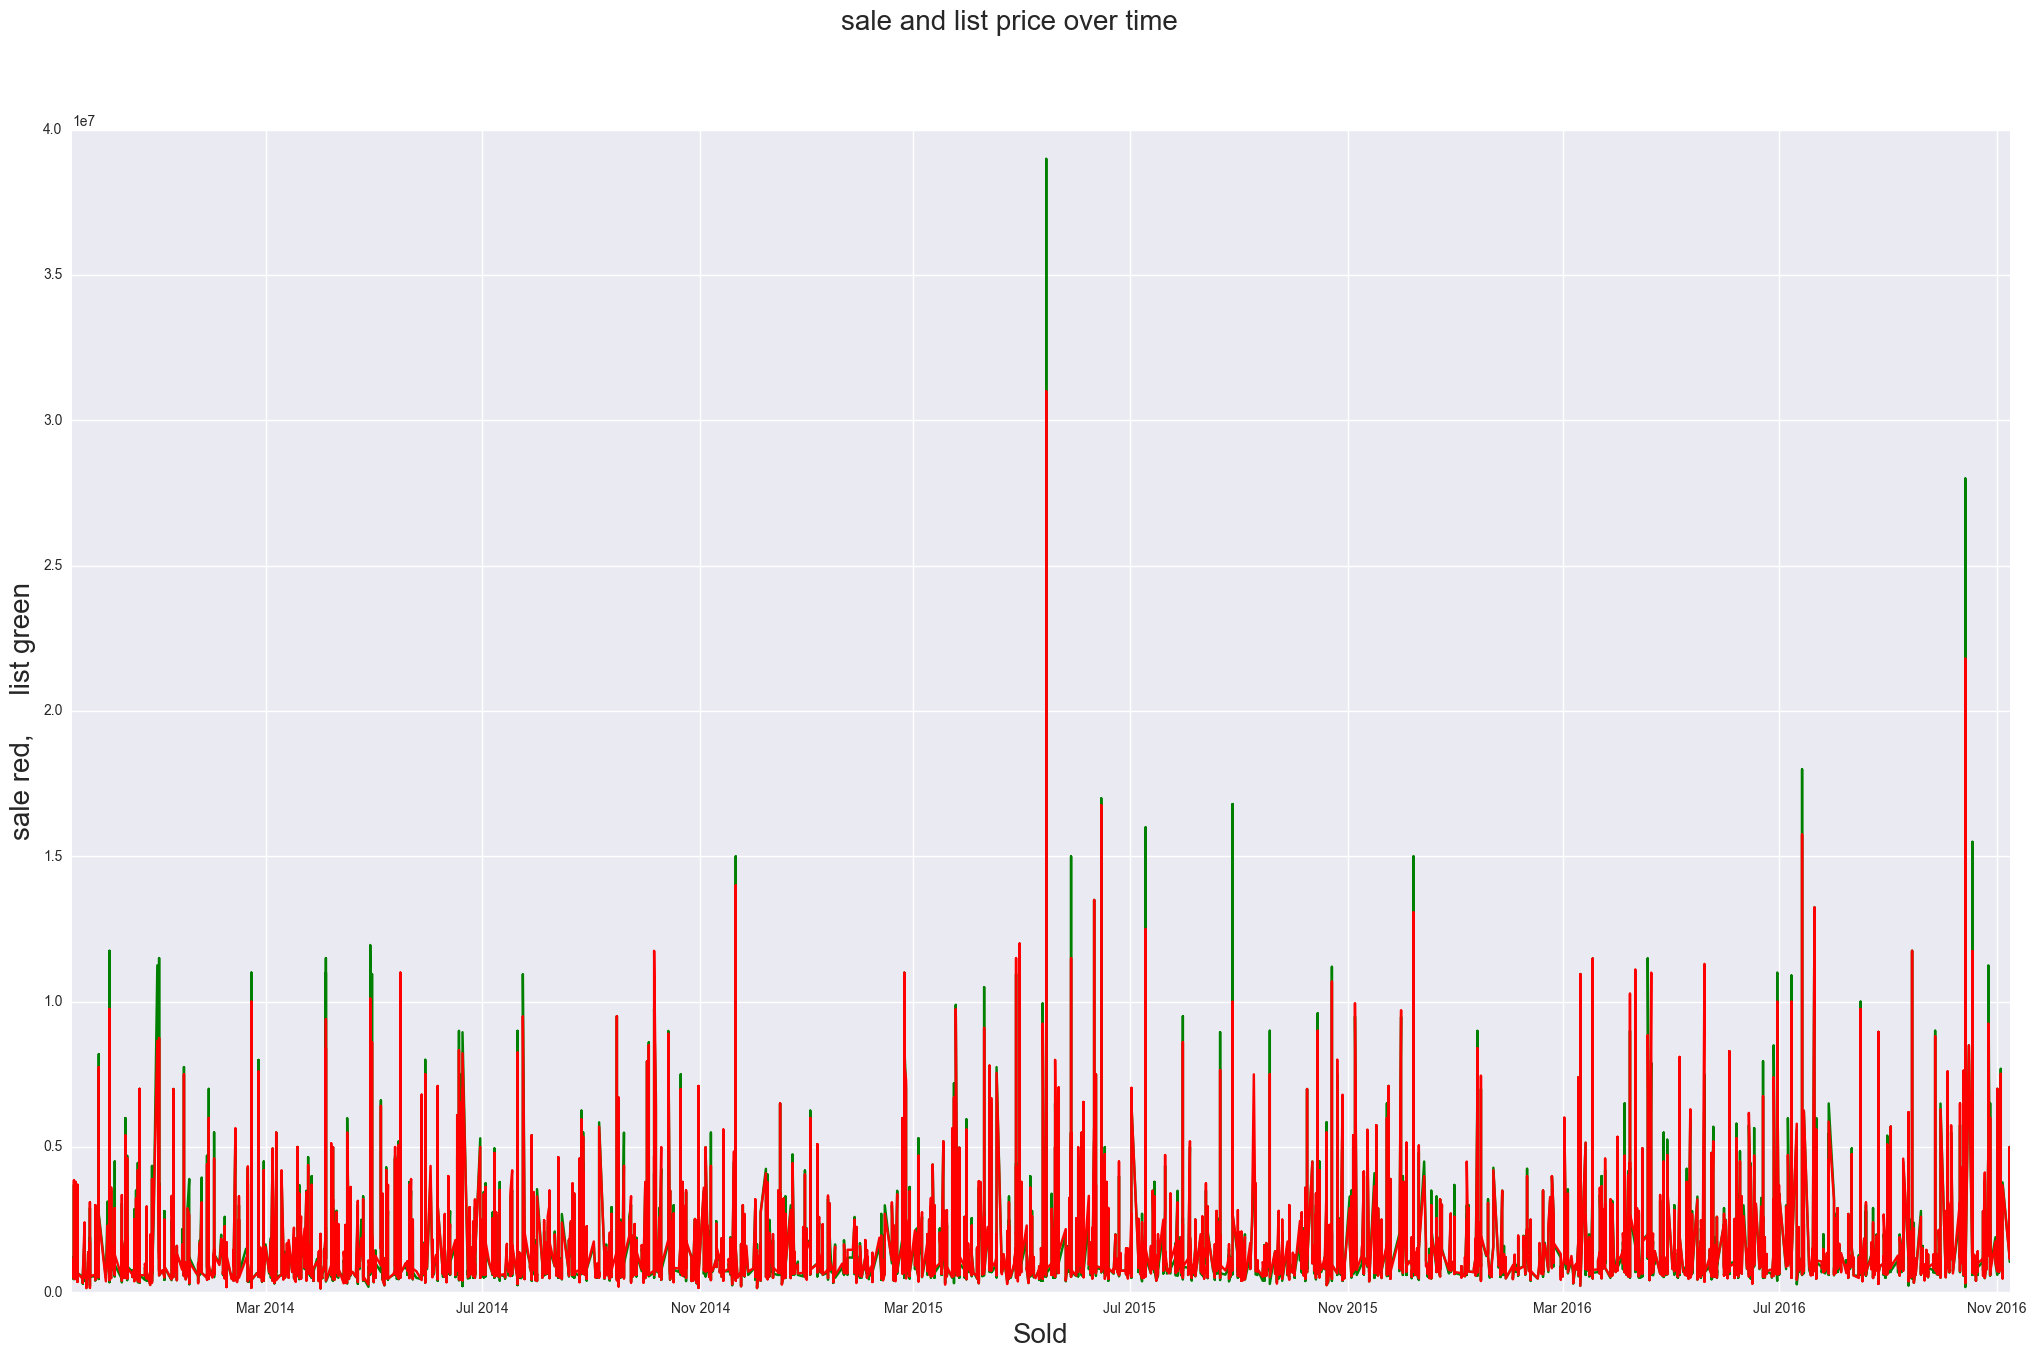

In [36]:

fig = plt.figure(figsize=(25,15))
plt.plot(df_sold[['list_price']], color = 'green')
plt.plot(df_sold[['sale_price']], color = 'red')
plt.xlabel('Sold', fontsize=20)
fig.suptitle('sale and list price over time', fontsize=20)
plt.ylabel('sale red,     list green', fontsize=20)
plt.show()

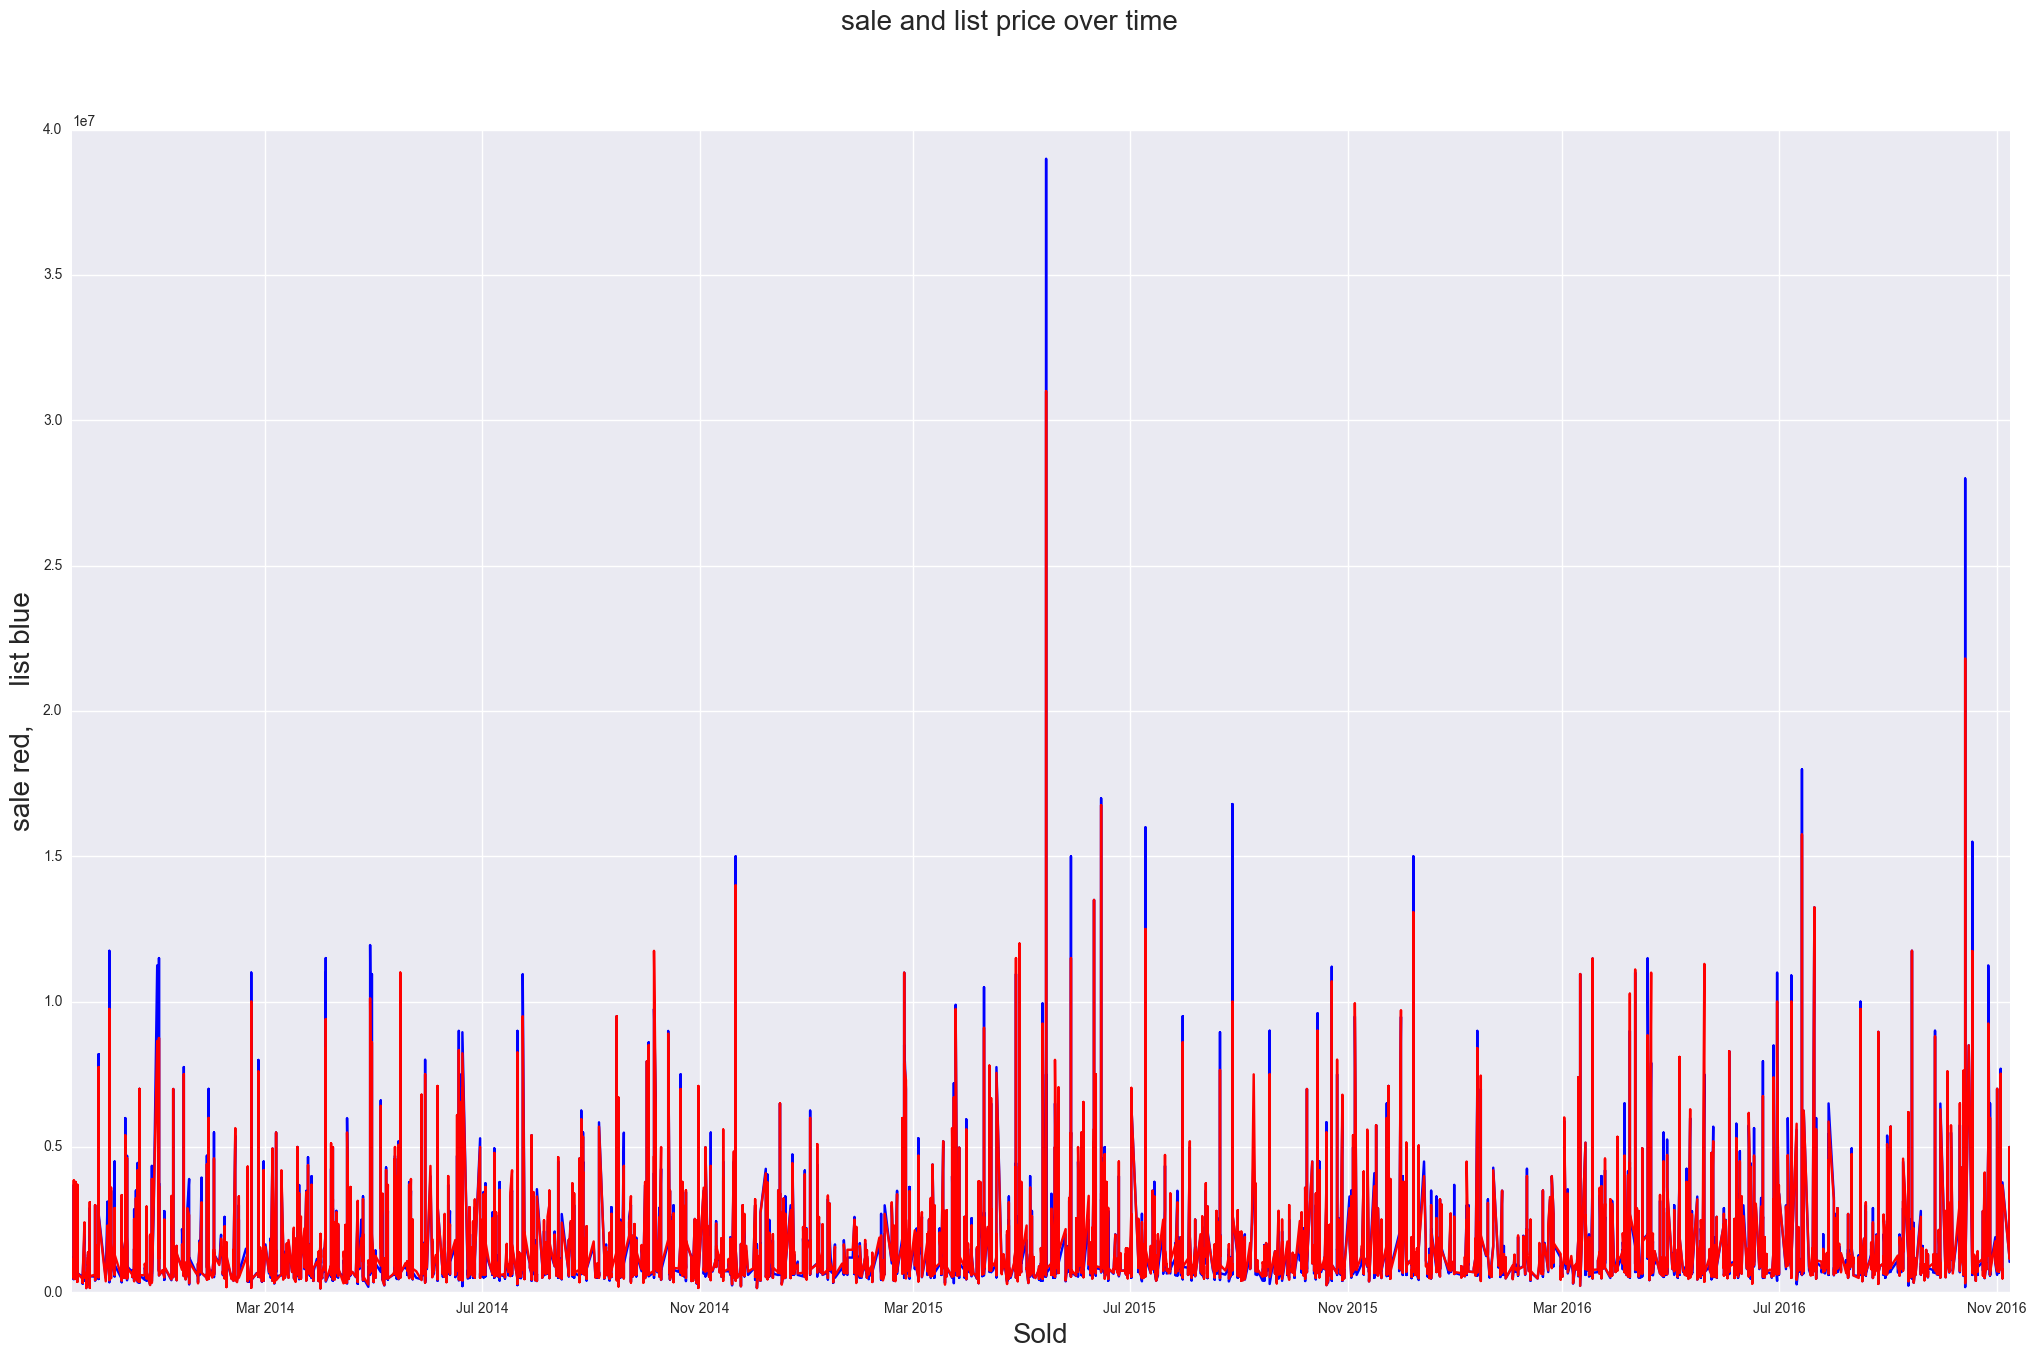

In [37]:
fig = plt.figure(figsize=(25,15))
plt.plot(df_sold[['list_price']], color = 'blue')
plt.plot(df_sold[['sale_price']], color = 'red')
plt.xlabel('Sold', fontsize=20)
fig.suptitle('sale and list price over time', fontsize=20)
plt.ylabel('sale red,     list blue', fontsize=20)
plt.show()

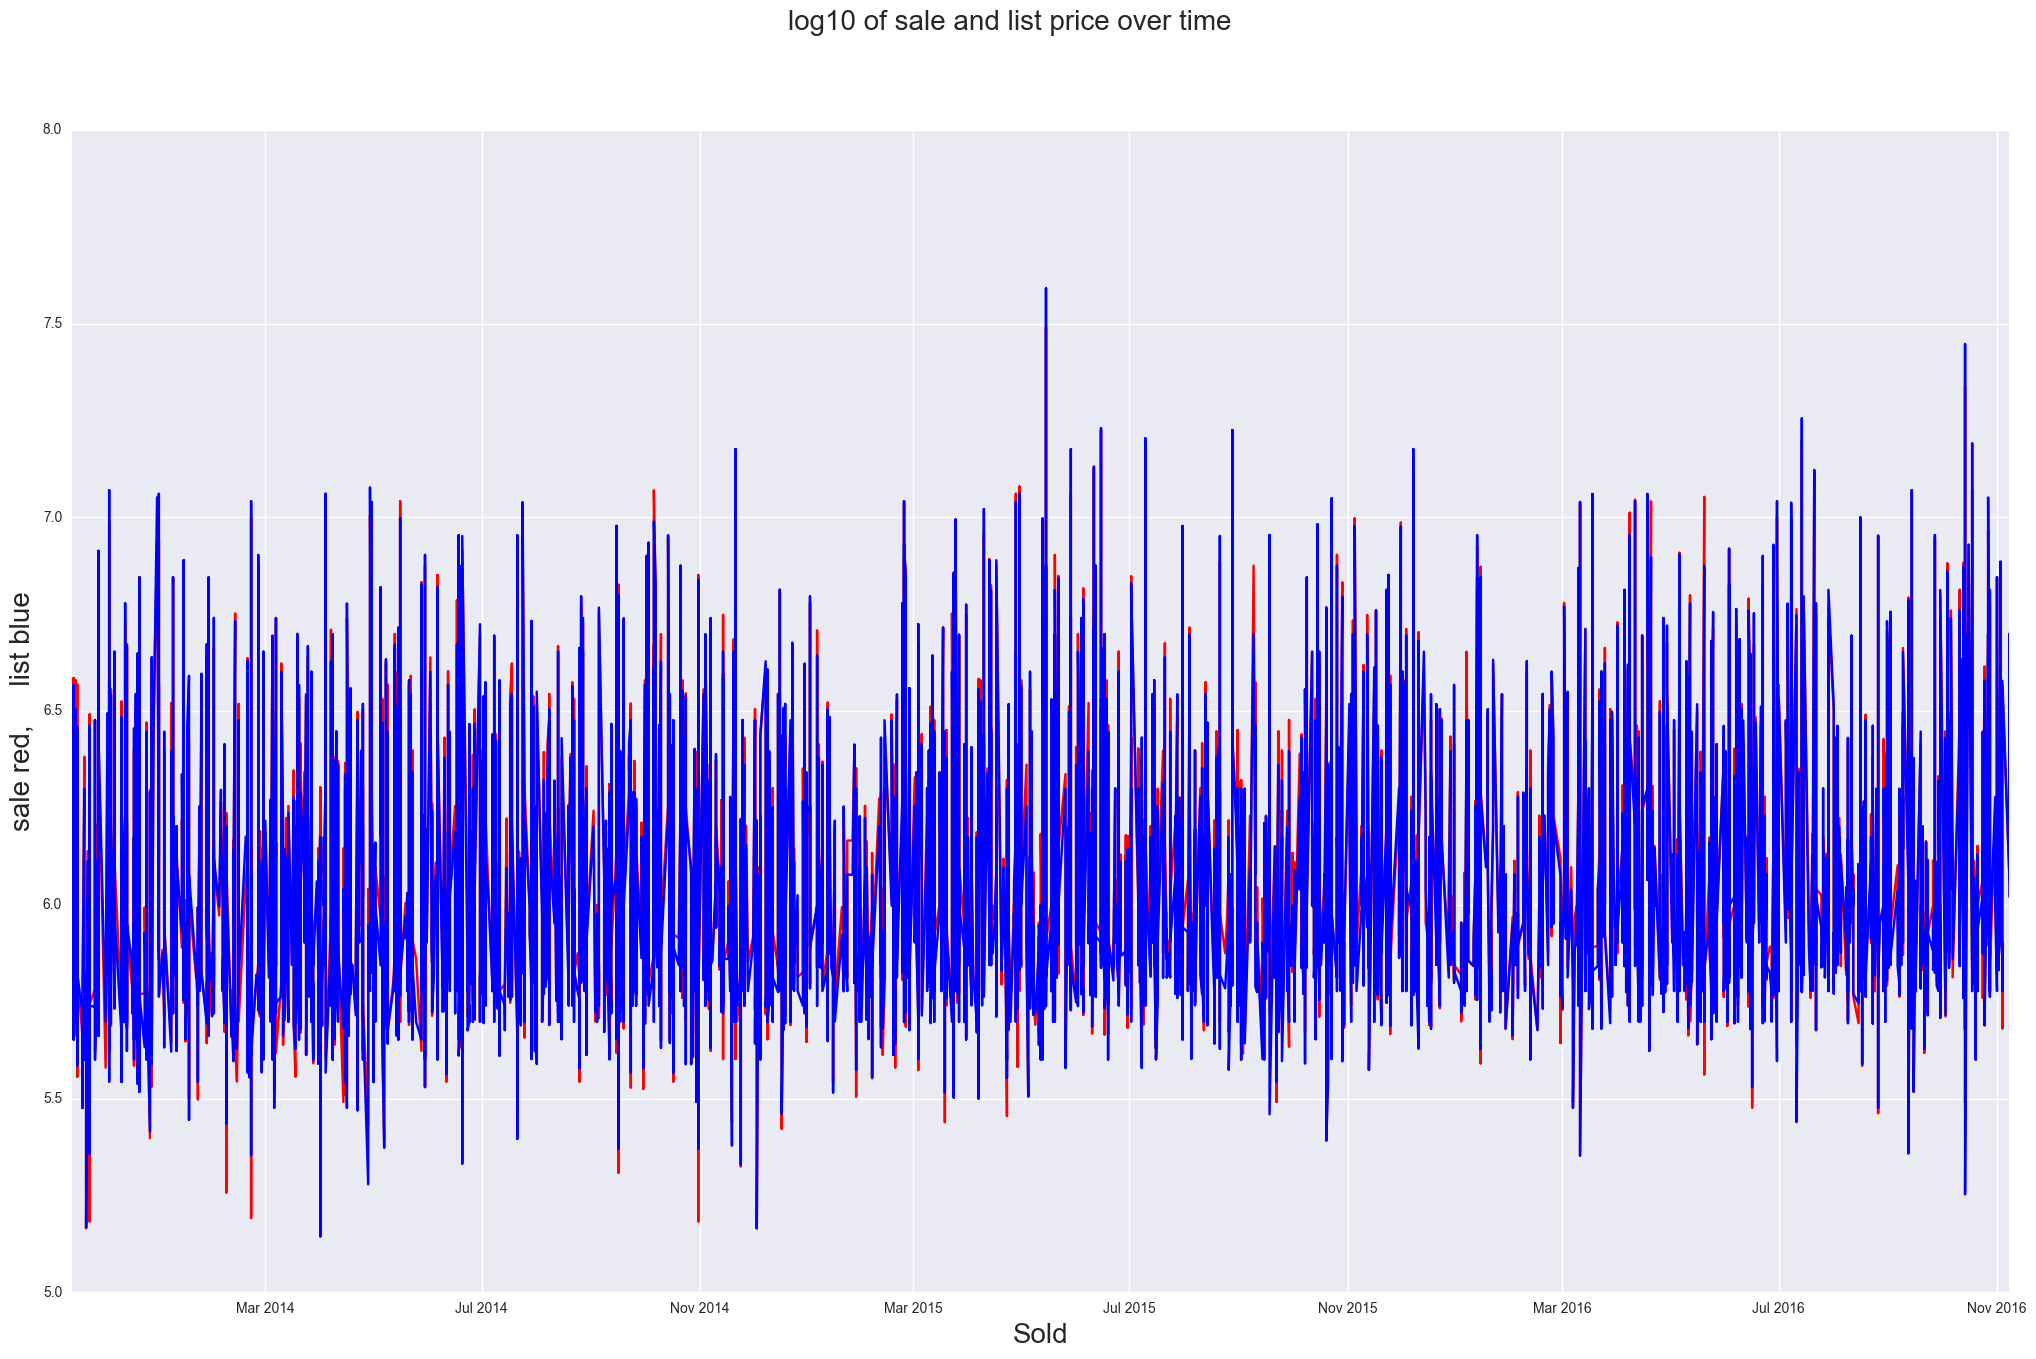

In [38]:
fig = plt.figure(figsize=(25,15))
plt.plot(np.log10(df_sold.sale_price), color='red')
plt.plot(np.log10(df_sold.list_price), color = 'blue')
plt.xlabel('Sold', fontsize=20)
fig.suptitle('log10 of sale and list price over time', fontsize=20)
plt.ylabel('sale red,     list blue', fontsize=20)
plt.show()

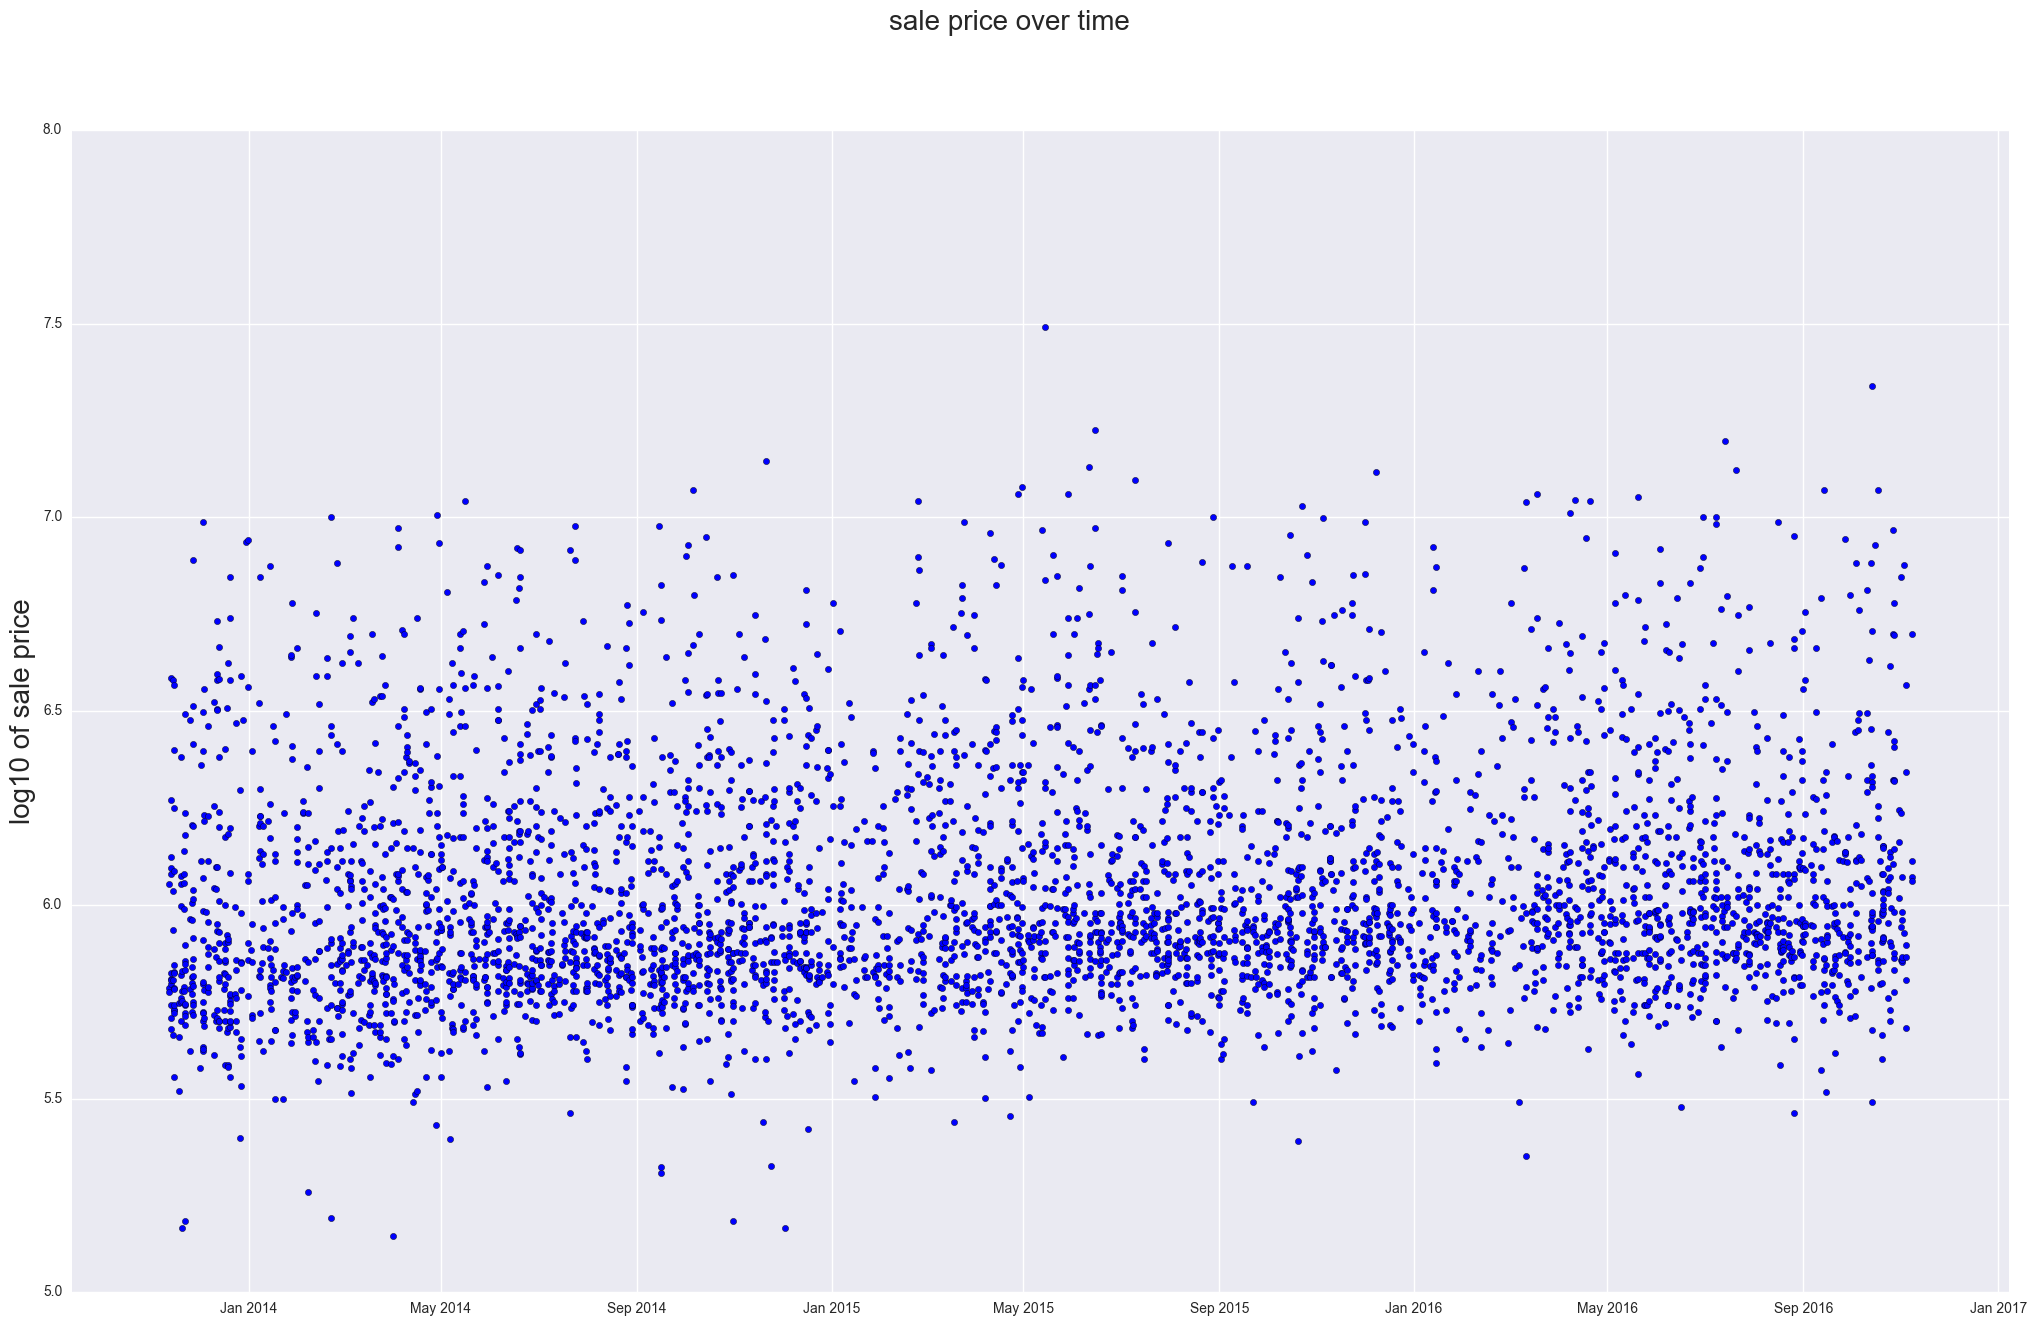

In [39]:
fig = plt.figure(figsize=(25,15))
plt.scatter(df_sold.index, np.log10(df_sold.sale_price))
fig.suptitle('sale price over time', fontsize=20)
plt.ylabel('log10 of sale price', fontsize=20)
plt.show()

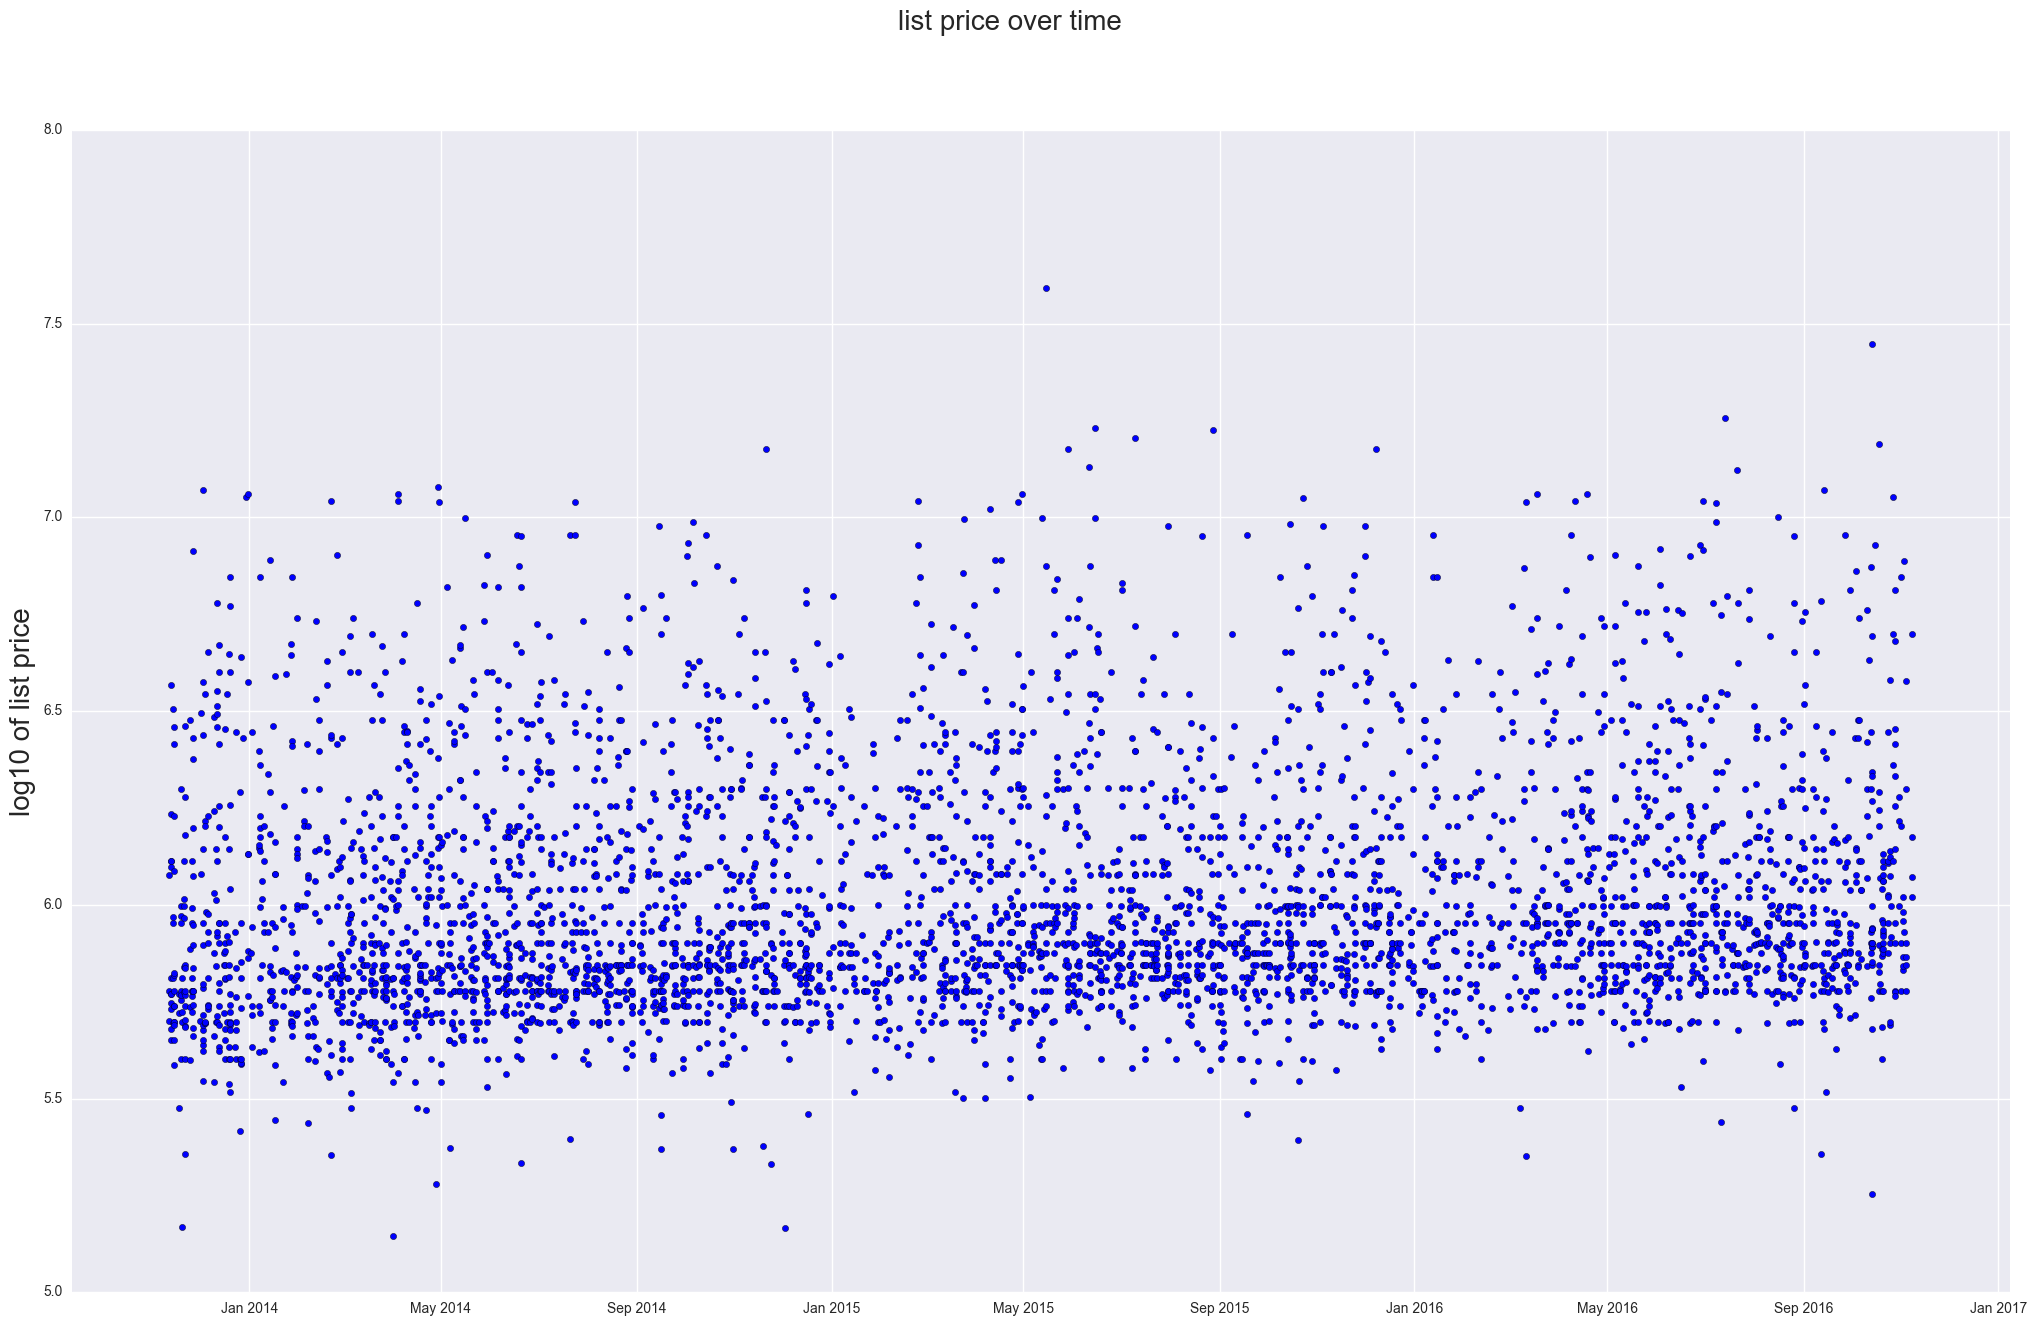

In [45]:
fig = plt.figure(figsize=(25,15))
plt.scatter(df_sold.index, np.log10(df_sold.list_price))
fig.suptitle('list price over time', fontsize=20)
plt.ylabel('log10 of list price', fontsize=20)
plt.show()

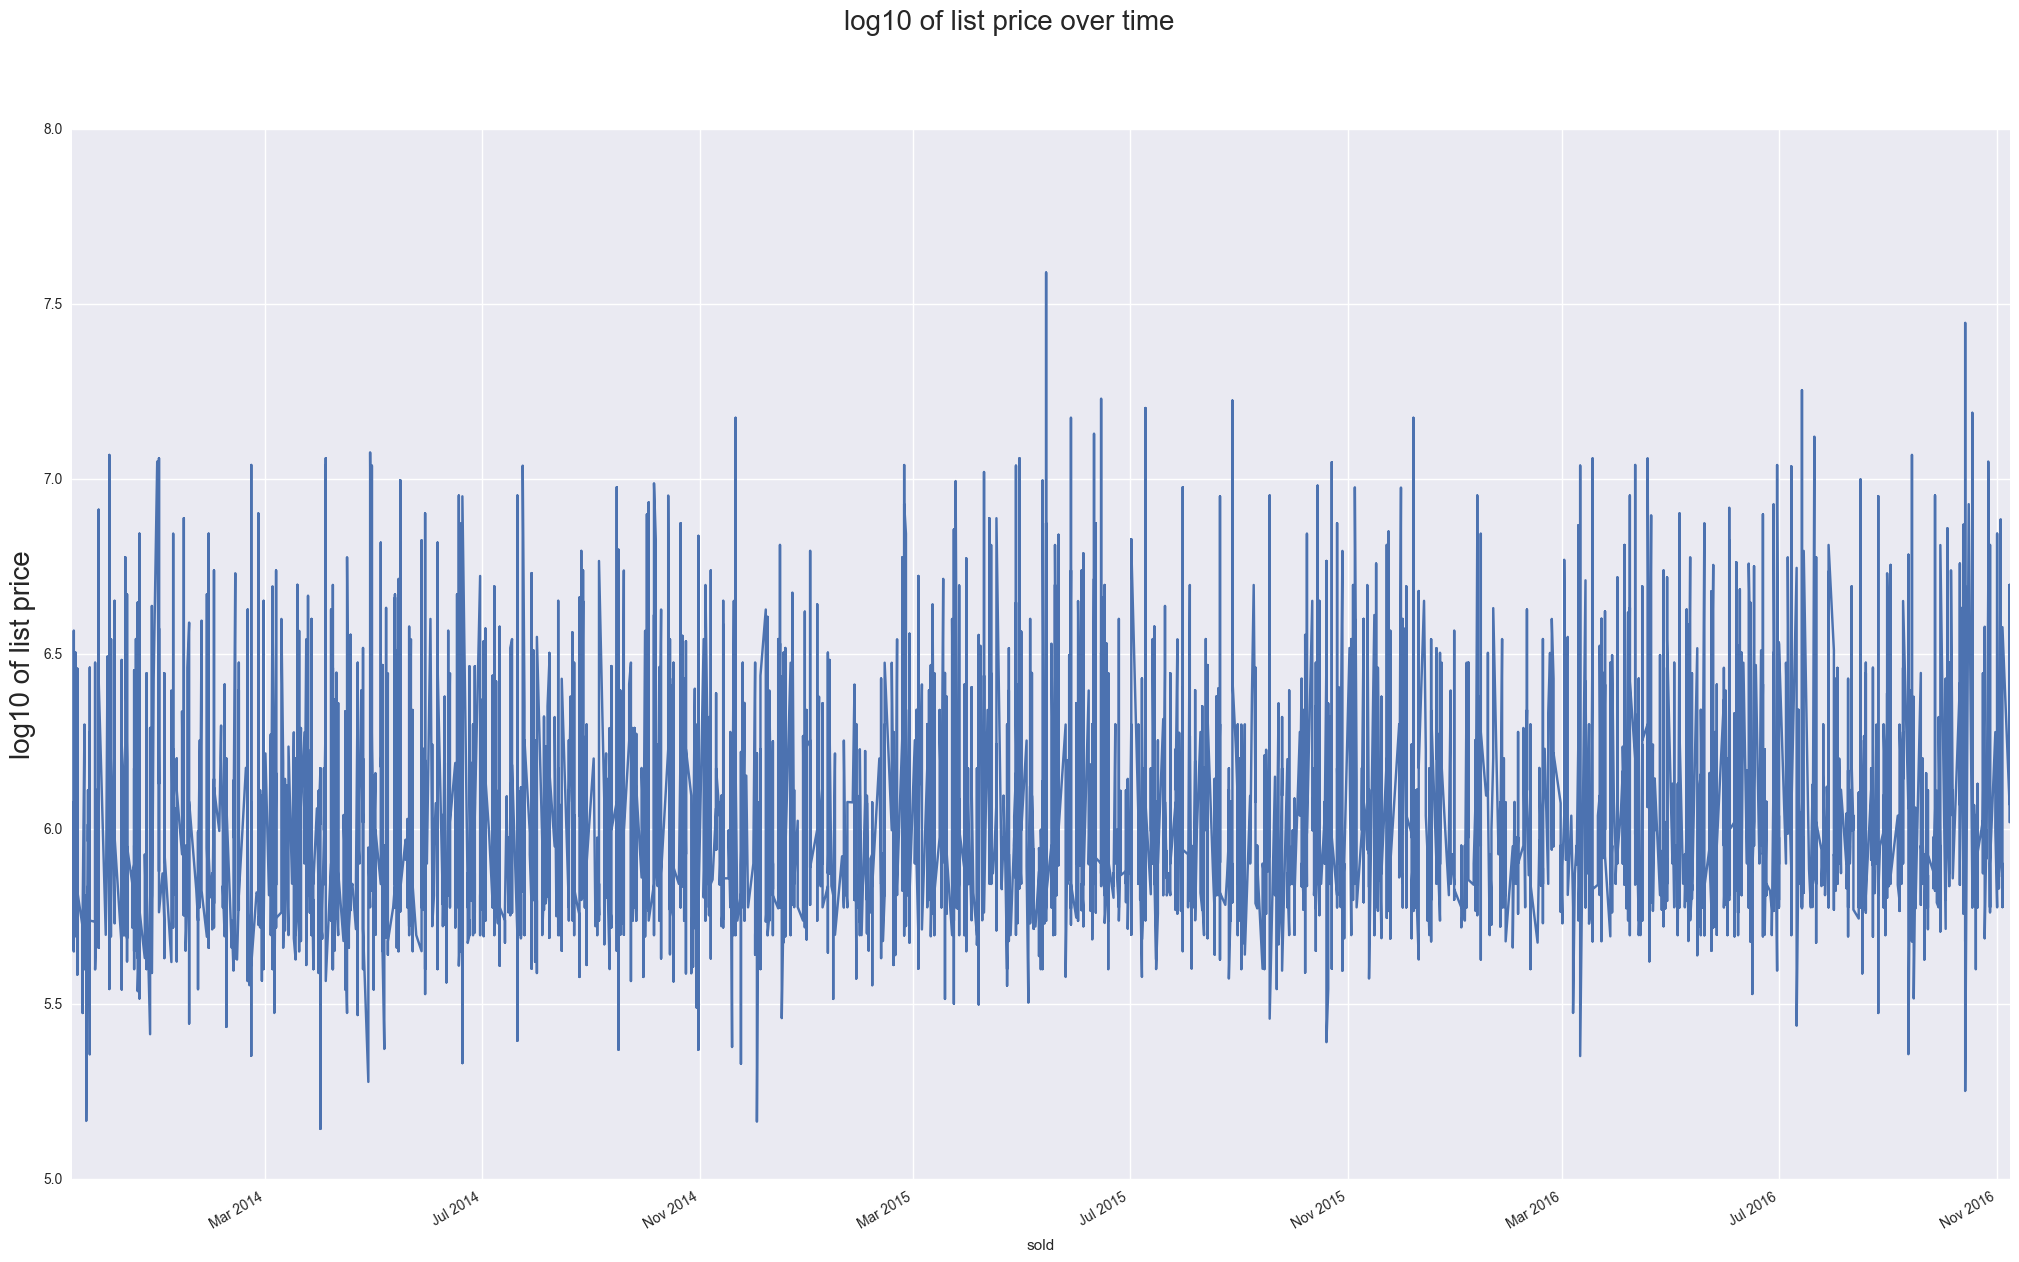

In [42]:
fig = plt.figure(figsize=(25,15))
np.log10(df_sold.list_price).plot()
fig.suptitle('log10 of list price over time', fontsize=20)
plt.ylabel('log10 of list price', fontsize=20)
plt.show()

In [46]:
model_sold_list = smf.ols(formula='np.log10(sale_price) ~ district + bedroom + bath + parking + sqft + home_own_ass + day_on_market + np.log10(list_price) + single_f_h + condo + dist_no + sold_year + sold_month', data=df_sold)
linreg3 = model_sold_list.fit()
print '\nmodel with log10 list price: ', linreg3.summary()



model with log10 list price:                               OLS Regression Results                             
Dep. Variable:     np.log10(sale_price)   R-squared:                       0.980
Model:                              OLS   Adj. R-squared:                  0.980
Method:                   Least Squares   F-statistic:                     6322.
Date:                  Sun, 27 Nov 2016   Prob (F-statistic):               0.00
Time:                          22:03:42   Log-Likelihood:                 7570.5
No. Observations:                  4340   AIC:                        -1.507e+04
Df Residuals:                      4306   BIC:                        -1.486e+04
Df Model:                            33                                         
Covariance Type:              nonrobust                                         
                                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------

In [47]:
model_sold_no_list= smf.ols(formula='np.log10(sale_price) ~ district + bedroom + bath + parking + sqft + home_own_ass + day_on_market + single_f_h + condo + dist_no + sold_year + sold_month', data=df_sold)
linreg4 = model_sold_no_list.fit()
print '\nmodel without list price: ', linreg4.summary()


model without list price:                               OLS Regression Results                             
Dep. Variable:     np.log10(sale_price)   R-squared:                       0.851
Model:                              OLS   Adj. R-squared:                  0.850
Method:                   Least Squares   F-statistic:                     766.4
Date:                  Sun, 27 Nov 2016   Prob (F-statistic):               0.00
Time:                          22:05:09   Log-Likelihood:                 3231.2
No. Observations:                  4340   AIC:                            -6396.
Df Residuals:                      4307   BIC:                            -6186.
Df Model:                            32                                         
Covariance Type:              nonrobust                                         
                                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------

In [48]:
print linreg4.fittedvalues[4000:4031]

sold
2016-08-16    5.828922
2016-08-16    5.956025
2016-08-16    5.799421
2016-08-16    6.762906
2016-08-16    6.086511
2016-08-16    6.124153
2016-08-17    5.812578
2016-08-17    5.804076
2016-08-17    6.055446
2016-08-17    5.969847
2016-08-17    5.541728
2016-08-17    6.121823
2016-08-18    6.259243
2016-08-18    5.938853
2016-08-18    5.996019
2016-08-18    6.187760
2016-08-19    5.865066
2016-08-19    5.885167
2016-08-19    5.723107
2016-08-19    6.392541
2016-08-19    6.061811
2016-08-19    6.003838
2016-08-19    6.181555
2016-08-19    6.171018
2016-08-19    5.852659
2016-08-19    6.306725
2016-08-19    6.257566
2016-08-19    5.829738
2016-08-19    5.907942
2016-08-22    6.211421
2016-08-22    5.857358
dtype: float64


In [54]:
print 'Date        Sale price  Pred. with list p    W/o list p     W and W/o diff'
for i in xrange(30):
    print df_sold.index[4000+i].date(), '    ', df_sold.sale_price[4000+i], '    ', np.around(np.power(10, linreg3.fittedvalues[4000+i]), decimals = 2), '     ', np.around(np.power(10, linreg4.fittedvalues[4000+i]), decimals = 2), '    ',np.around(np.power(10,linreg3.fittedvalues[4000+i])-np.power(10,linreg4.fittedvalues[4000+i]), decimals = 2)

Date        Sale price  Pred. with list p    W/o list p     W and W/o diff
2016-08-16      850000      833941.07       674407.24      159533.82
2016-08-16      1315000      1033950.63       903702.01      130248.61
2016-08-16      670000      653632.68       630117.05      23515.63
2016-08-16      9750000      9778898.96       5793032.39      3985866.57
2016-08-16      917500      1025620.36       1220425.94      -194805.59
2016-08-16      980000      1040687.88       1330922.59      -290234.71
2016-08-17      790000      726092.66       649498.45      76594.21
2016-08-17      775000      805822.42       636907.54      168914.89
2016-08-17      699000      802589.33       1136176.26      -333586.93
2016-08-17      1050000      1136525.85       932925.13      203600.72
2016-08-17      385000      366773.16       348119.0      18654.16
2016-08-17      1100000      1065574.1       1323800.79      -258226.69
2016-08-18      1850000      1847061.88       1816531.21      30530.67
2016-08-18 

In [55]:
df_district = pd.get_dummies(df_sold.district)
df_sold_dum = pd.concat( [df_sold, df_district], axis=1)

In [56]:
df_sold_dum.head(1)


,address,district,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,...,North Waterfront,Outer Mission,Pacific Heights,Portola,Presidio Heights,Russian Hill,Silver Terrace,Telegraph Hill,Van Ness/Civic Cente,Visitacion Valley
sold,,,,,,,,,,,,,,,,,,,,,
2013-11-12,930 Pine #211,Downtown,1,1.0,1,700,871.428571,511.14,35,599000,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df_sold_dum.pop('district')
df_sold_dum.pop('address')

sold
2013-11-12               930 Pine #211
2013-11-12            20 Vandewater St
2013-11-12        946 Stockton St #14A
2013-11-13        950 Stockton St #201
2013-11-13     2211 California St #407
2013-11-13               779 Sweeny St
2013-11-13             2055 Thomas Ave
2013-11-13      2466 Francisco St #102
2013-11-13               873 Meade Ave
2013-11-13          3417 Divisadero St
2013-11-13             2921 Jackson St
2013-11-13    1626 North Point St #202
2013-11-13             2469 Vallejo St
2013-11-13         2821 Buchanan St #2
2013-11-13           1299 Bush St #604
2013-11-14        1177 California #225
2013-11-14           2775 Greenwich St
2013-11-14            2813 Buchanan St
2013-11-14               2 Robinson Dr
2013-11-14               129 Pixley St
2013-11-15              1642 Palou Ave
2013-11-15         62-62 Bridgeview Dr
2013-11-15           1001 Pine St #312
2013-11-15          3423 Divisadero St
2013-11-15                3228 Clay St
2013-11-15          

In [58]:
df_sold_dum.head(1)

,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,...,North Waterfront,Outer Mission,Pacific Heights,Portola,Presidio Heights,Russian Hill,Silver Terrace,Telegraph Hill,Van Ness/Civic Cente,Visitacion Valley
sold,,,,,,,,,,,,,,,,,,,,,
2013-11-12,1,1.0,1,700,871.428571,511.14,35,599000,610000,101.836394,...,0,0,0,0,0,0,0,0,0,0


In [59]:
y_sold = df_sold_dum.pop('sale_price')
#y_sold = np.log10(y_sold)

X_sold = df_sold_dum
X_sold.pop('dollar_sqft')
X_sold.pop('sale_to_list_ratio')

sold
2013-11-12    101.836394
2013-11-12     94.560669
2013-11-12    119.000000
2013-11-13    113.839286
2013-11-13    106.112054
2013-11-13    114.758497
2013-11-13    102.040816
2013-11-13     98.401387
2013-11-13     99.582463
2013-11-13     95.783252
2013-11-13    104.194858
2013-11-13     96.000000
2013-11-13    108.488372
2013-11-13    102.307692
2013-11-13    112.903226
2013-11-14     92.929293
2013-11-14     95.661846
2013-11-14    118.750000
2013-11-14     98.690293
2013-11-14    117.007535
2013-11-15    119.153675
2013-11-15    116.861436
2013-11-15     93.533703
2013-11-15    100.000000
2013-11-15    105.014749
2013-11-15    111.368613
2013-11-15    110.200364
2013-11-15    107.214429
2013-11-15    128.506944
2013-11-15    101.522843
                 ...    
2016-10-28    106.785317
2016-10-28    116.991643
2016-10-28    129.310345
2016-10-28     97.116279
2016-10-28     85.106383
2016-10-31     92.465753
2016-10-31     87.932080
2016-10-31    104.522613
2016-11-01    120.20

In [60]:
X_sold.head(3)

,bedroom,bath,parking,sqft,home_own_ass,day_on_market,list_price,single_f_h,condo,dist_no,...,North Waterfront,Outer Mission,Pacific Heights,Portola,Presidio Heights,Russian Hill,Silver Terrace,Telegraph Hill,Van Ness/Civic Cente,Visitacion Valley
sold,,,,,,,,,,,,,,,,,,,,,
2013-11-12,1,1.0,1,700,511.14,35,599000,0,1,8,...,0,0,0,0,0,0,0,0,0,0
2013-11-12,2,2.0,1,1456,565.00,38,1195000,0,1,8,...,0,0,0,0,0,0,0,0,0,0
2013-11-12,2,1.5,0,744,556.00,8,500000,0,1,8,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y_sold.head(3)

sold
2013-11-12     610000
2013-11-12    1130000
2013-11-12     595000
Name: sale_price, dtype: int64

In [62]:
X_train = X_sold[:3500]
X_test = X_sold[3500:4000]
X_val = X_sold[4000:]

y_train = y_sold[:3500]
y_test = y_sold[3500:4000]
y_val = y_sold[4000:]


In [63]:
X_train.shape

(3500, 36)

In [64]:
y_train.shape

(3500,)

In [65]:
X_test.shape

(500, 36)

In [66]:
y_test.shape

(500,)

In [71]:
lr1 = linear_model.LinearRegression(normalize = True)
lr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [73]:
print 'lr1 no log10 Train Coefficients: \n', np.around(lr1.coef_, decimals = 4)

lr1 no log10 Train Coefficients: 
[  2.03451738e+04   4.82414620e+04   2.09330968e+04   6.99300000e+00
   1.82821000e+01  -2.05726510e+03   8.50800000e-01  -5.00953026e+16
  -5.00953026e+16  -6.92116390e+15   2.91198619e+04   3.60890300e+02
   2.90002454e+16   2.90002454e+16   2.90002454e+16   8.23675372e+15
   2.90002454e+16   1.51579176e+16   2.90002454e+16   1.51579176e+16
   2.90002454e+16   2.90002454e+16   8.23675372e+15   2.90002454e+16
   1.51579176e+16   1.51579176e+16   1.51579176e+16   2.90002454e+16
   8.23675372e+15   2.90002454e+16   8.23675372e+15   1.51579176e+16
   2.90002454e+16   1.51579176e+16   1.51579176e+16   2.90002454e+16]


In [77]:
len(lr1.coef_)

36

In [78]:
for i in range(len(lr1.coef_)):
    print np.round(lr1.coef_[i], 4)


20345.1738
48241.462
20933.0968
6.993
18.2821
-2057.2651
0.8508
-5.0095302617e+16
-5.00953026172e+16
-6.92116389501e+15
29119.8619
360.8903
2.9000245409e+16
2.9000245409e+16
2.9000245409e+16
8.23675372428e+15
2.9000245409e+16
1.51579176191e+16
2.9000245409e+16
1.51579176192e+16
2.90002454091e+16
2.9000245409e+16
8.23675372425e+15
2.9000245409e+16
1.51579176192e+16
1.51579176191e+16
1.51579176191e+16
2.9000245409e+16
8.23675372425e+15
2.9000245409e+16
8.23675372438e+15
1.51579176192e+16
2.9000245409e+16
1.51579176192e+16
1.51579176191e+16
2.90002454089e+16


In [79]:
print('lr1 no log10 Train Variance score: %.2f' % lr1.score(X_train, y_train))

lr1 no log10 Train Variance score: 0.98


In [80]:
predicted_t1 = cross_val_predict(lr1, X_train, y_train, cv=10)

In [81]:
predicted_t1[0:20]

array([  600832.,  1195264.,   626688.,   474112.,   726016.,   592896.,
         583168.,   702720.,   401152.,  1254400.,  3872768.,  1332224.,
        1844736.,  1372160.,   616960.,   483328.,   945664.,  3417088.,
         667904.,  1121024.])

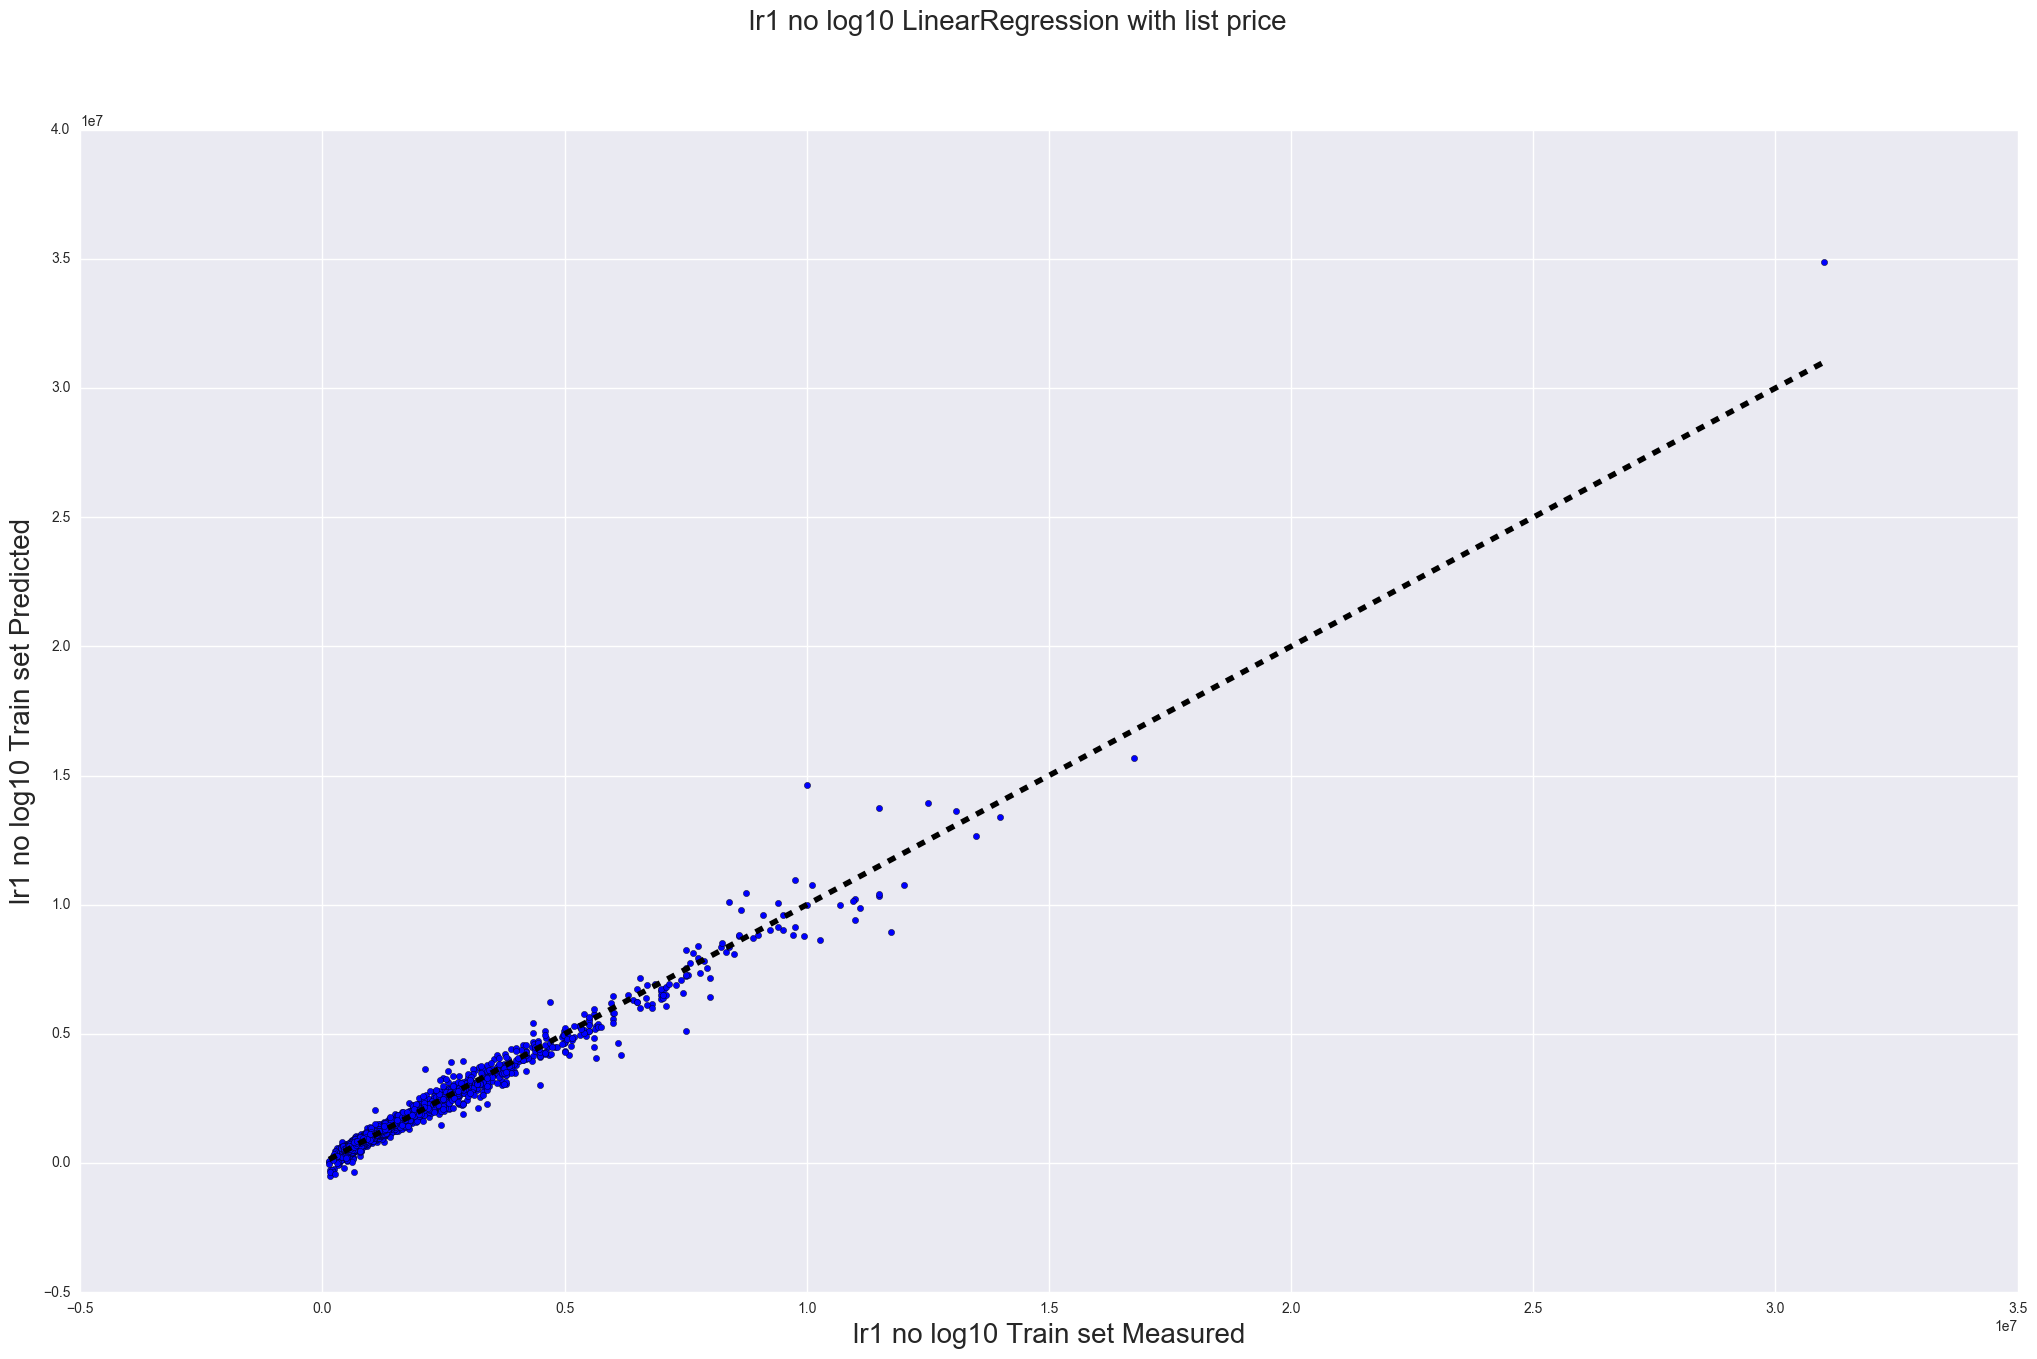

In [82]:
fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr1 no log10 LinearRegression with list price', fontsize=20)
ax.scatter(y_train, predicted_t1)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('lr1 no log10 Train set Measured', fontsize=20)
ax.set_ylabel('lr1 no log10 Train set Predicted', fontsize=20)
plt.show()

In [83]:
print('lr1 no log10 Test Variance score: %.2f' % lr1.score(X_test, y_test))

lr1 no log10 Test Variance score: 0.97


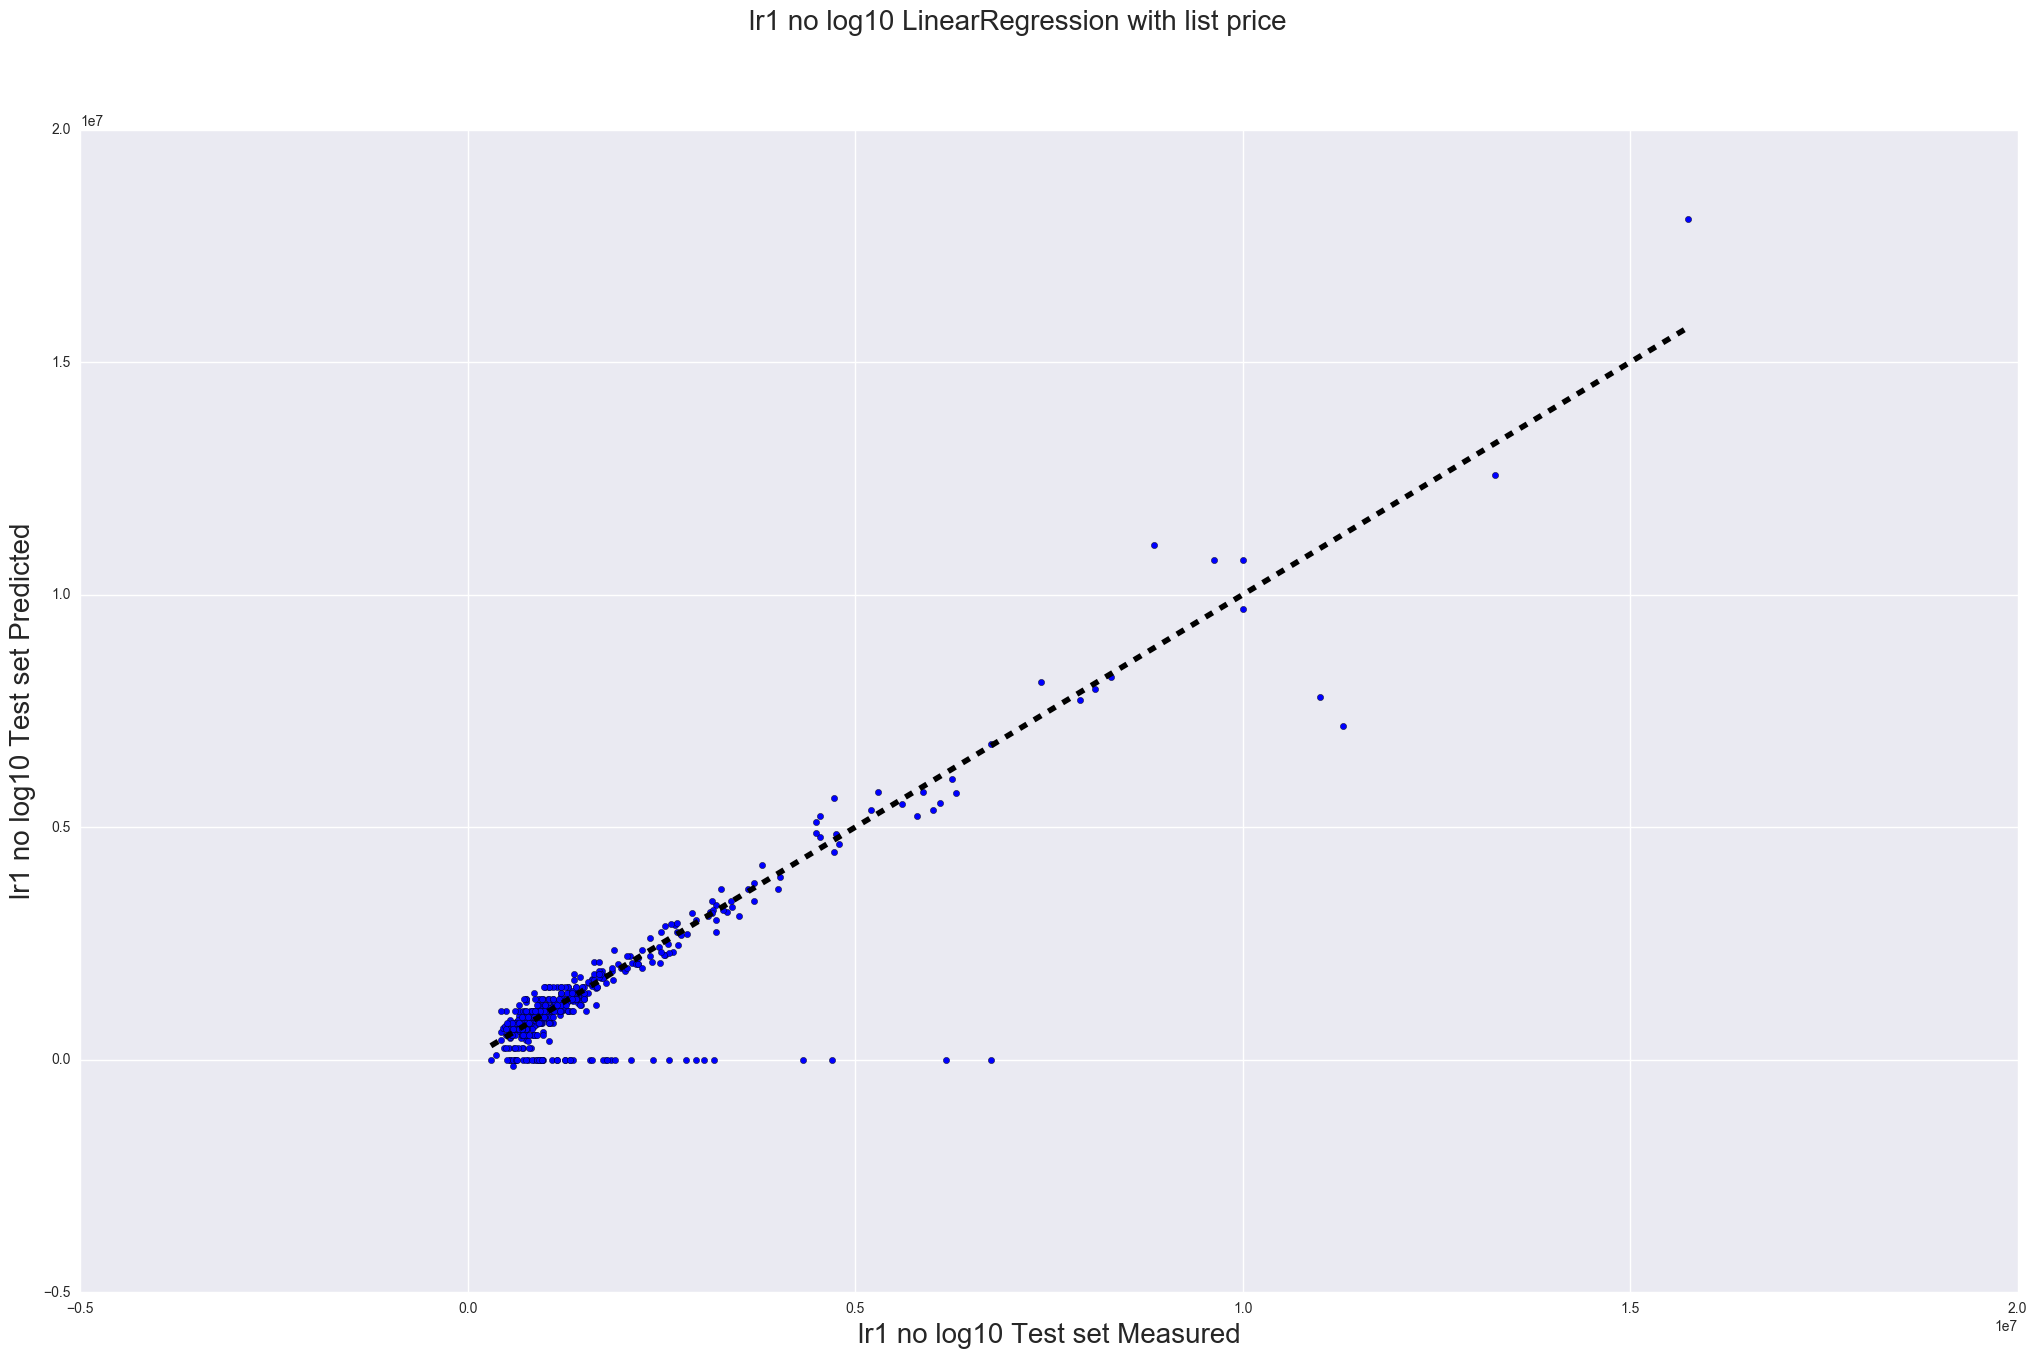

In [85]:
predicted_test1 = cross_val_predict(lr1, X_test, y_test, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr1 no log10 LinearRegression with list price', fontsize=20)
ax.scatter(y_test, predicted_test1)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('lr1 no log10 Test set Measured', fontsize=20)
ax.set_ylabel('lr1 no log10 Test set Predicted', fontsize=20)
plt.show()

lr1 no log10 Validation Variance score: 0.98


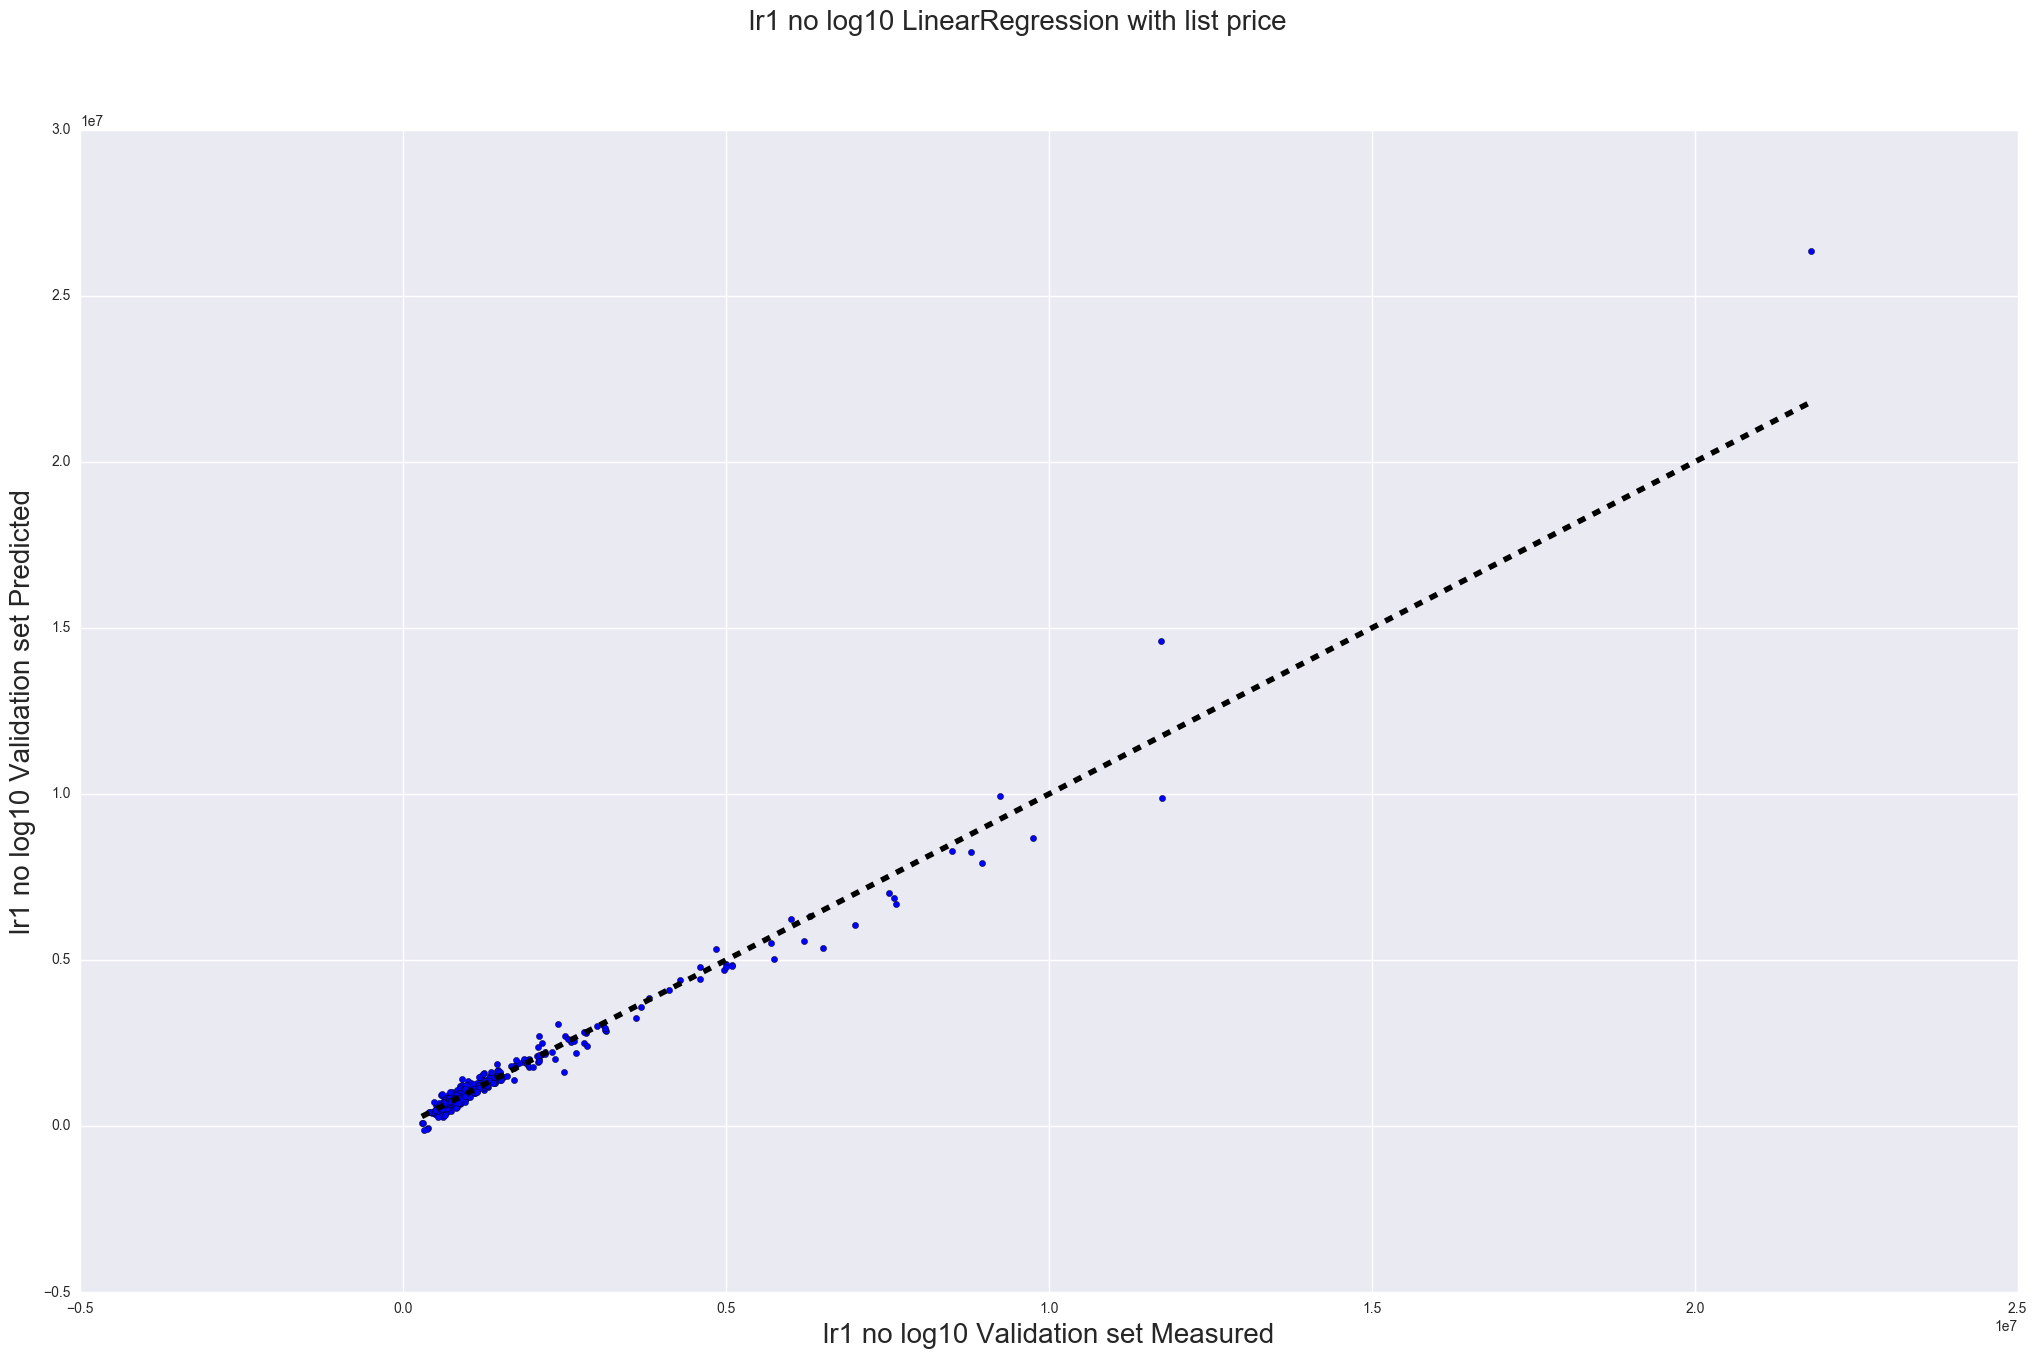

In [86]:
print('lr1 no log10 Validation Variance score: %.2f' % lr1.score(X_val, y_val))

# Train
predicted_val = cross_val_predict(lr1, X_val, y_val, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr1 no log10 LinearRegression with list price', fontsize=20)
ax.scatter(y_val, predicted_val)
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('lr1 no log10 Validation set Measured', fontsize=20)
ax.set_ylabel('lr1 no log10 Validation set Predicted', fontsize=20)
plt.show()

In [87]:
X_train = X_sold[:4000]
X_test = X_sold[4000:]

y_train = y_sold[:4000]
y_test = y_sold[4000:]

In [91]:
lr2 = linear_model.LinearRegression()
lr2.fit(X_train, y_train)

# The coefficients
print 'lr2 Train Coefficients: \n', lr2.coef_
# Explained variance score: 1 is perfect prediction
print('lr2 Train Variance score: %.2f' % lr2.score(X_train, y_train))


lr2 Train Coefficients: 
[  1.18379885e+04   4.54632102e+04   1.98136183e+04   1.81901782e+01
   1.62090410e+01  -2.18924345e+03   8.55660441e-01   7.85235851e+04
  -7.85235851e+04  -9.19101525e+04   1.61657524e+04  -8.38651623e+02
  -1.39123718e+04  -1.16556364e+04   6.26270768e+04  -1.14874087e+04
  -1.79587220e+04  -4.24744372e+04  -1.72666714e+04  -1.01553506e+04
   8.73526119e+04   9.66181066e+03  -2.86527780e+04   3.36853315e+04
   1.44371097e+04  -2.69393770e+04  -5.37368907e+04  -2.46701094e+04
  -3.83405203e+03  -2.12190451e+04   1.24266036e+05   6.50957012e+04
  -3.77481816e+04   9.59388661e+03  -3.03032622e+04  -5.47052706e+04]
lr2 Train Variance score: 0.98


In [89]:
lr2 = linear_model.LinearRegression(normalize=True)
lr2.fit(X_train, y_train)

# The coefficients
print 'lr2 Train Coefficients: \n', lr2.coef_
# Explained variance score: 1 is perfect prediction
print('lr2 Train Variance score: %.2f' % lr2.score(X_train, y_train))


lr2 Train Coefficients: 
[  1.17109935e+04   4.57258176e+04   2.00528864e+04   1.81621848e+01
   1.58578344e+01  -2.18692823e+03   8.55768301e-01  -1.67556134e+18
  -1.67556134e+18   7.25831811e+16   1.61912266e+04  -8.70160651e+02
  -1.58454934e+17  -1.58454934e+17  -1.58454934e+17   5.92946091e+16
  -1.58454934e+17  -1.32885720e+16  -1.58454934e+17  -1.32885720e+16
  -1.58454934e+17  -1.58454934e+17   5.92946091e+16  -1.58454934e+17
  -1.32885720e+16  -1.32885720e+16  -1.32885720e+16  -1.58454934e+17
   5.92946091e+16  -1.58454934e+17   5.92946091e+16  -1.32885720e+16
  -1.58454934e+17  -1.32885720e+16  -1.32885720e+16  -1.58454934e+17]
lr2 Train Variance score: 0.98


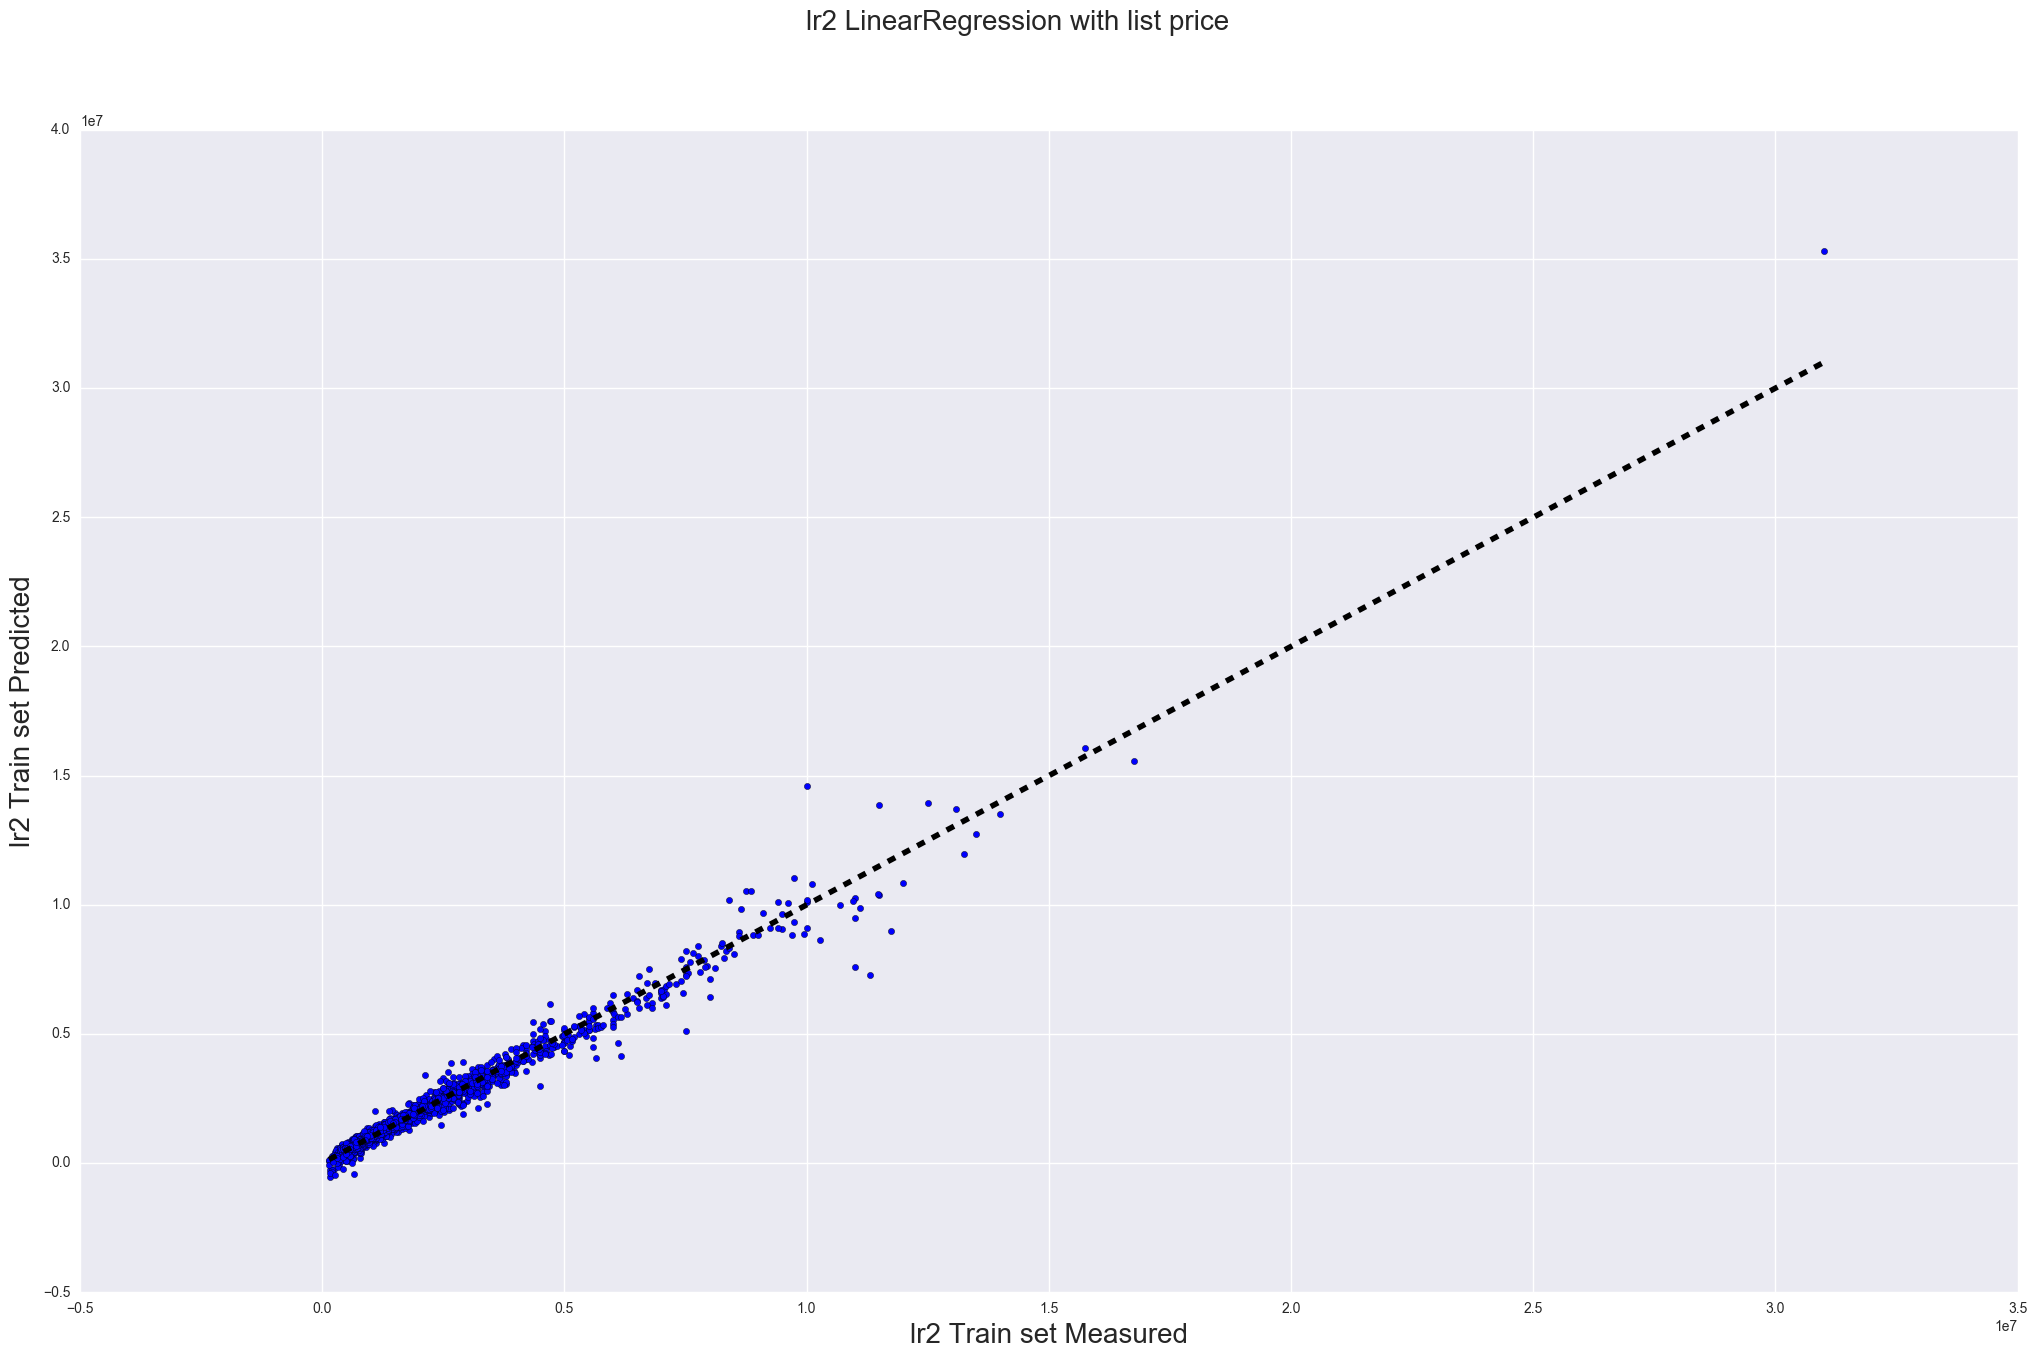

In [92]:
predicted_train2 = cross_val_predict(lr2, X_train, y_train, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr2 LinearRegression with list price', fontsize=20)
ax.scatter(y_train, predicted_train2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('lr2 Train set Measured', fontsize=20)
ax.set_ylabel('lr2 Train set Predicted', fontsize=20)
plt.show()

lr2 Test Variance score: 0.98


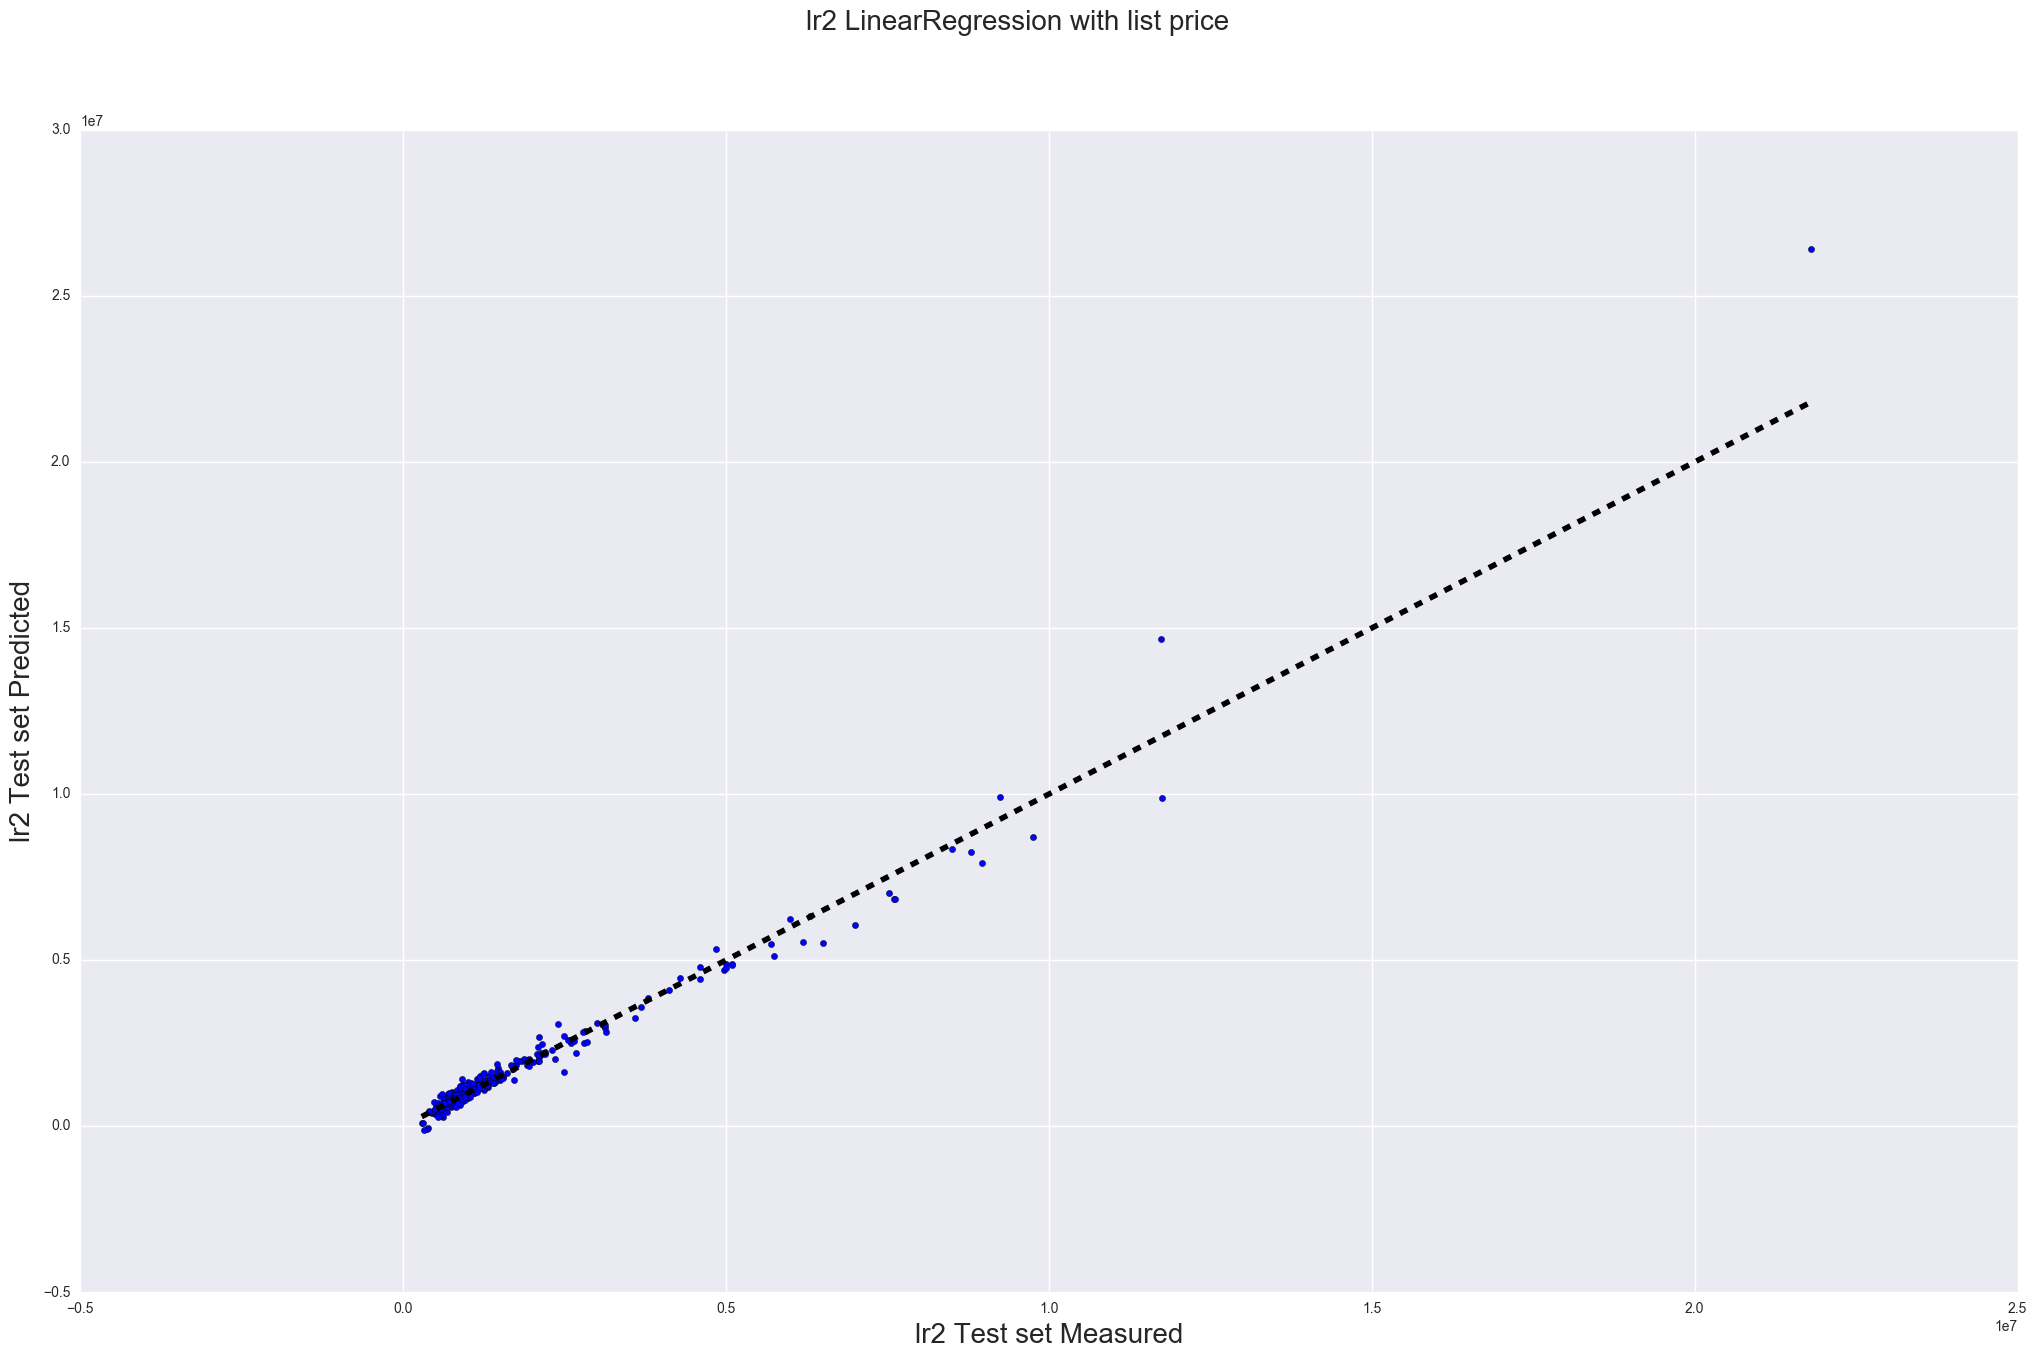

In [93]:
print('lr2 Test Variance score: %.2f' % lr2.score(X_test, y_test))

# Train
predicted_test2 = cross_val_predict(lr2, X_test, y_test, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr2 LinearRegression with list price', fontsize=20)
ax.scatter(y_test, predicted_test2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('lr2 Test set Measured', fontsize=20)
ax.set_ylabel('lr2 Test set Predicted', fontsize=20)
plt.show()


no list price Train Coefficients: 
[ -1.99322593e+05   2.13480462e+05   8.58530990e+04   1.09127490e+03
   1.56350030e+02  -1.20290785e+03   3.87733329e+05  -3.87733329e+05
  -4.54994781e+05   1.22537480e+05   3.18970852e+03  -1.94507624e+05
  -1.24867073e+05   3.82604182e+05  -4.93484040e+04  -1.68668932e+05
   1.67566639e+04  -1.32264431e+05   1.40237259e+05   3.91451297e+05
   9.28489081e+04  -2.76638381e+05  -7.99761190e+04   1.23863220e+05
   4.64414285e+04  -1.13482501e+05  -1.80322071e+05  -7.99604688e+04
  -1.44715503e+05  -4.25899568e+04   4.00203605e+05  -1.25558453e+05
   3.32597733e+05  -4.63142025e+04  -1.67790176e+05]
no list price Train Variance score: 0.80


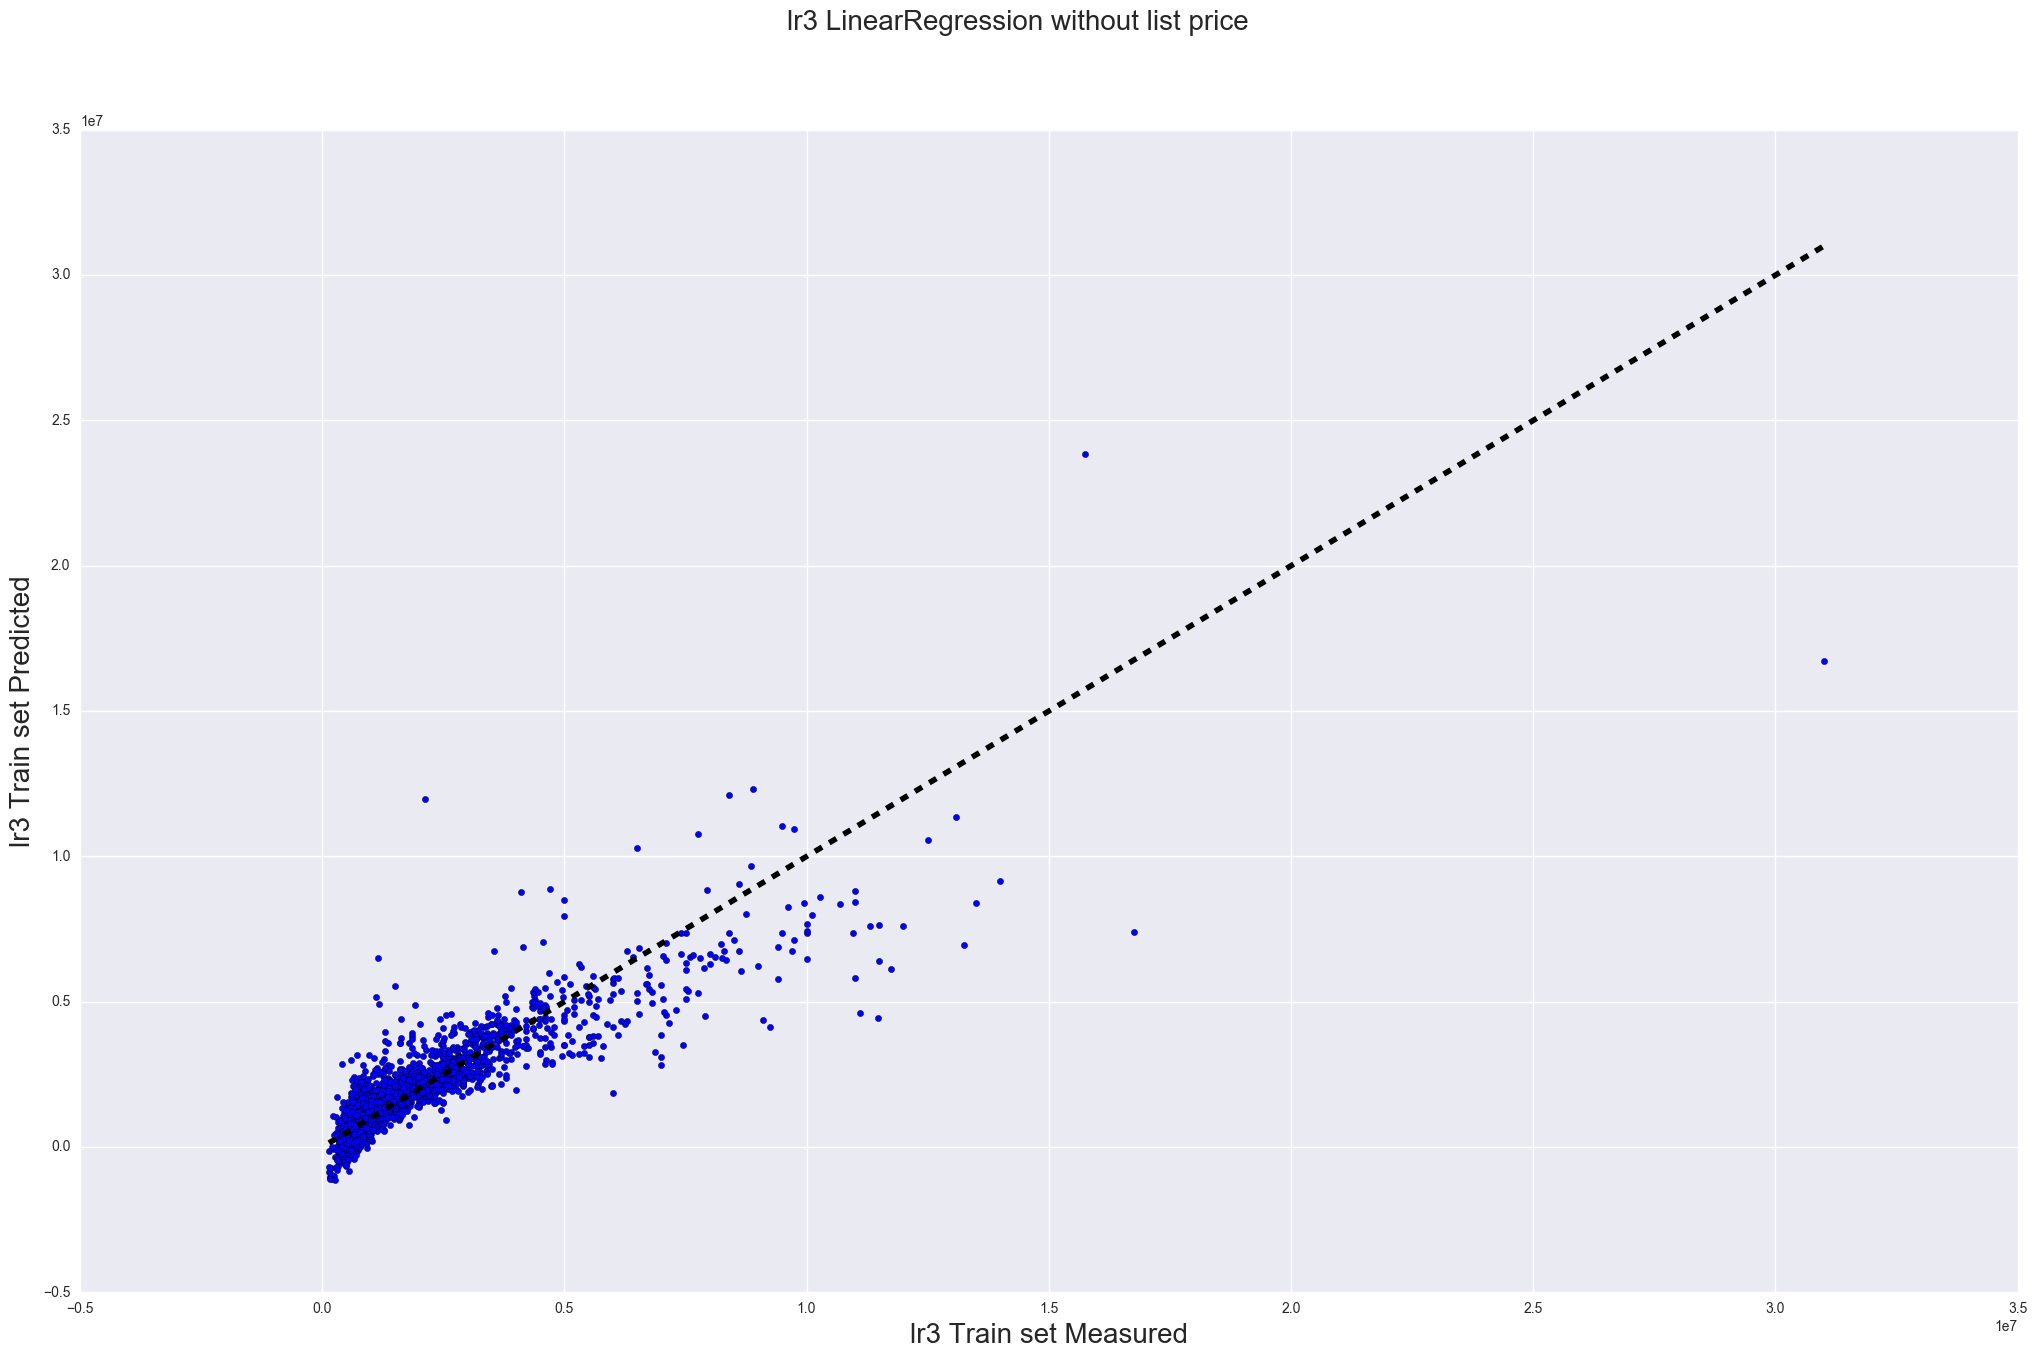

In [94]:
X_train.pop('list_price')
X_test.pop('list_price')
# Train

lr3 = linear_model.LinearRegression()
lr3.fit(X_train, y_train)

# The coefficients
print 'no list price Train Coefficients: \n', lr3.coef_
# Explained variance score: 1 is perfect prediction
print('no list price Train Variance score: %.2f' % lr3.score(X_train, y_train))

# Train
predicted_train3 = cross_val_predict(lr3, X_train, y_train, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr3 LinearRegression without list price', fontsize=20)
ax.scatter(y_train, predicted_train3)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('lr3 Train set Measured', fontsize=20)
ax.set_ylabel('lr3 Train set Predicted', fontsize=20)
plt.show()


lr3 Test Variance score: 0.76


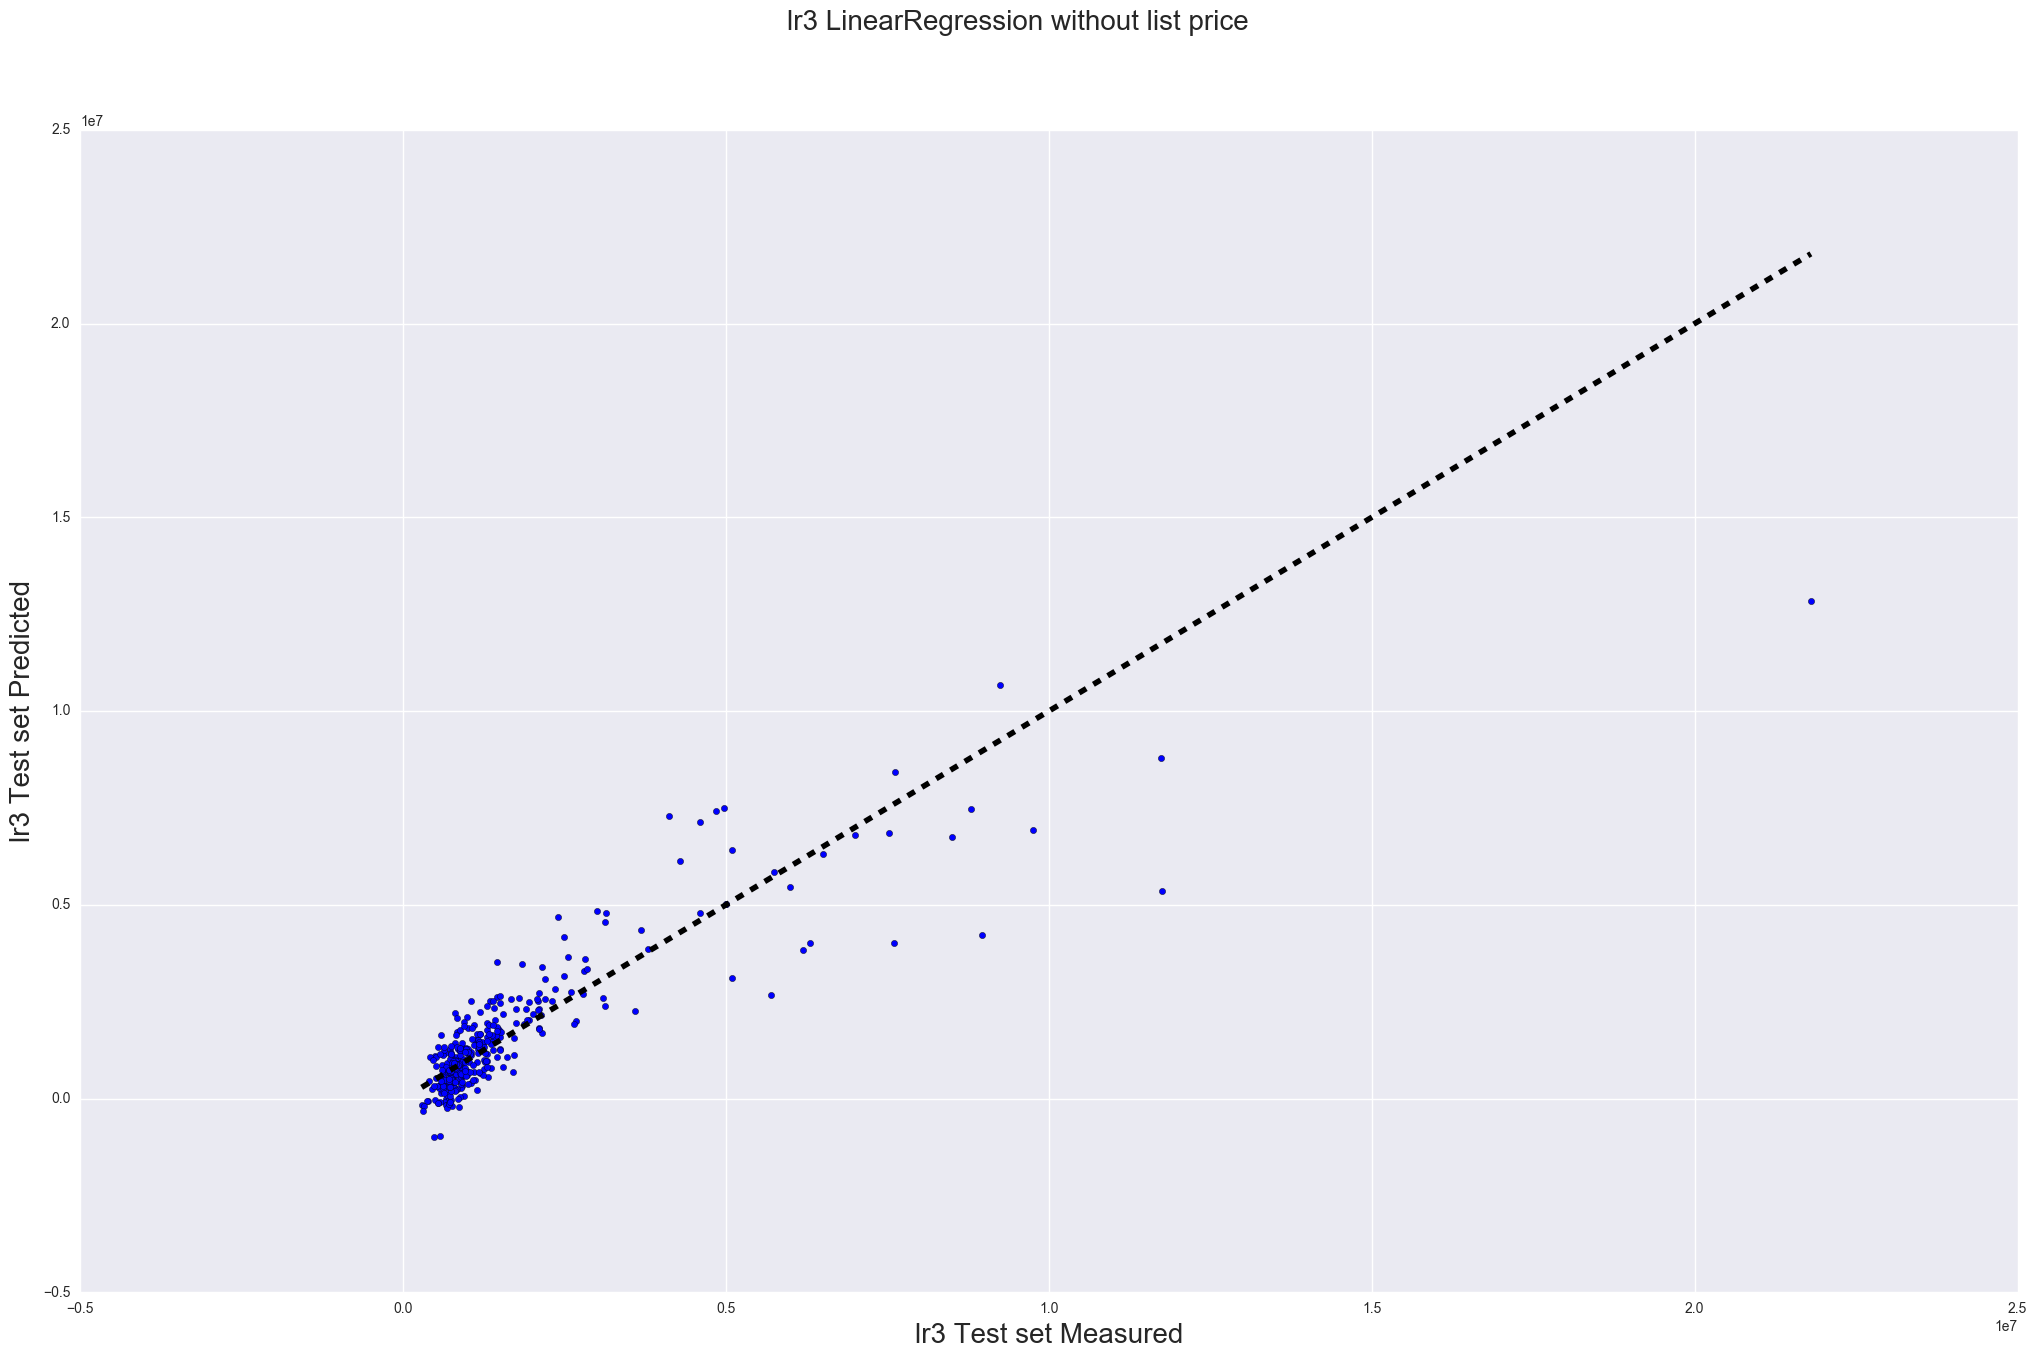

In [95]:
print('lr3 Test Variance score: %.2f' % lr3.score(X_test, y_test))

# Train
predicted_test3 = cross_val_predict(lr3, X_test, y_test, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr3 LinearRegression without list price', fontsize=20)
ax.scatter(y_test, predicted_test3)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('lr3 Test set Measured', fontsize=20)
ax.set_ylabel('lr3 Test set Predicted', fontsize=20)
plt.show()

In [96]:
X_sold.head(1)

,bedroom,bath,parking,sqft,home_own_ass,day_on_market,list_price,single_f_h,condo,dist_no,...,North Waterfront,Outer Mission,Pacific Heights,Portola,Presidio Heights,Russian Hill,Silver Terrace,Telegraph Hill,Van Ness/Civic Cente,Visitacion Valley
sold,,,,,,,,,,,,,,,,,,,,,
2013-11-12,1,1.0,1,700,511.14,35,599000,0,1,8,...,0,0,0,0,0,0,0,0,0,0


In [97]:
y_sold.head(1)

sold
2013-11-12    610000
Name: sale_price, dtype: int64

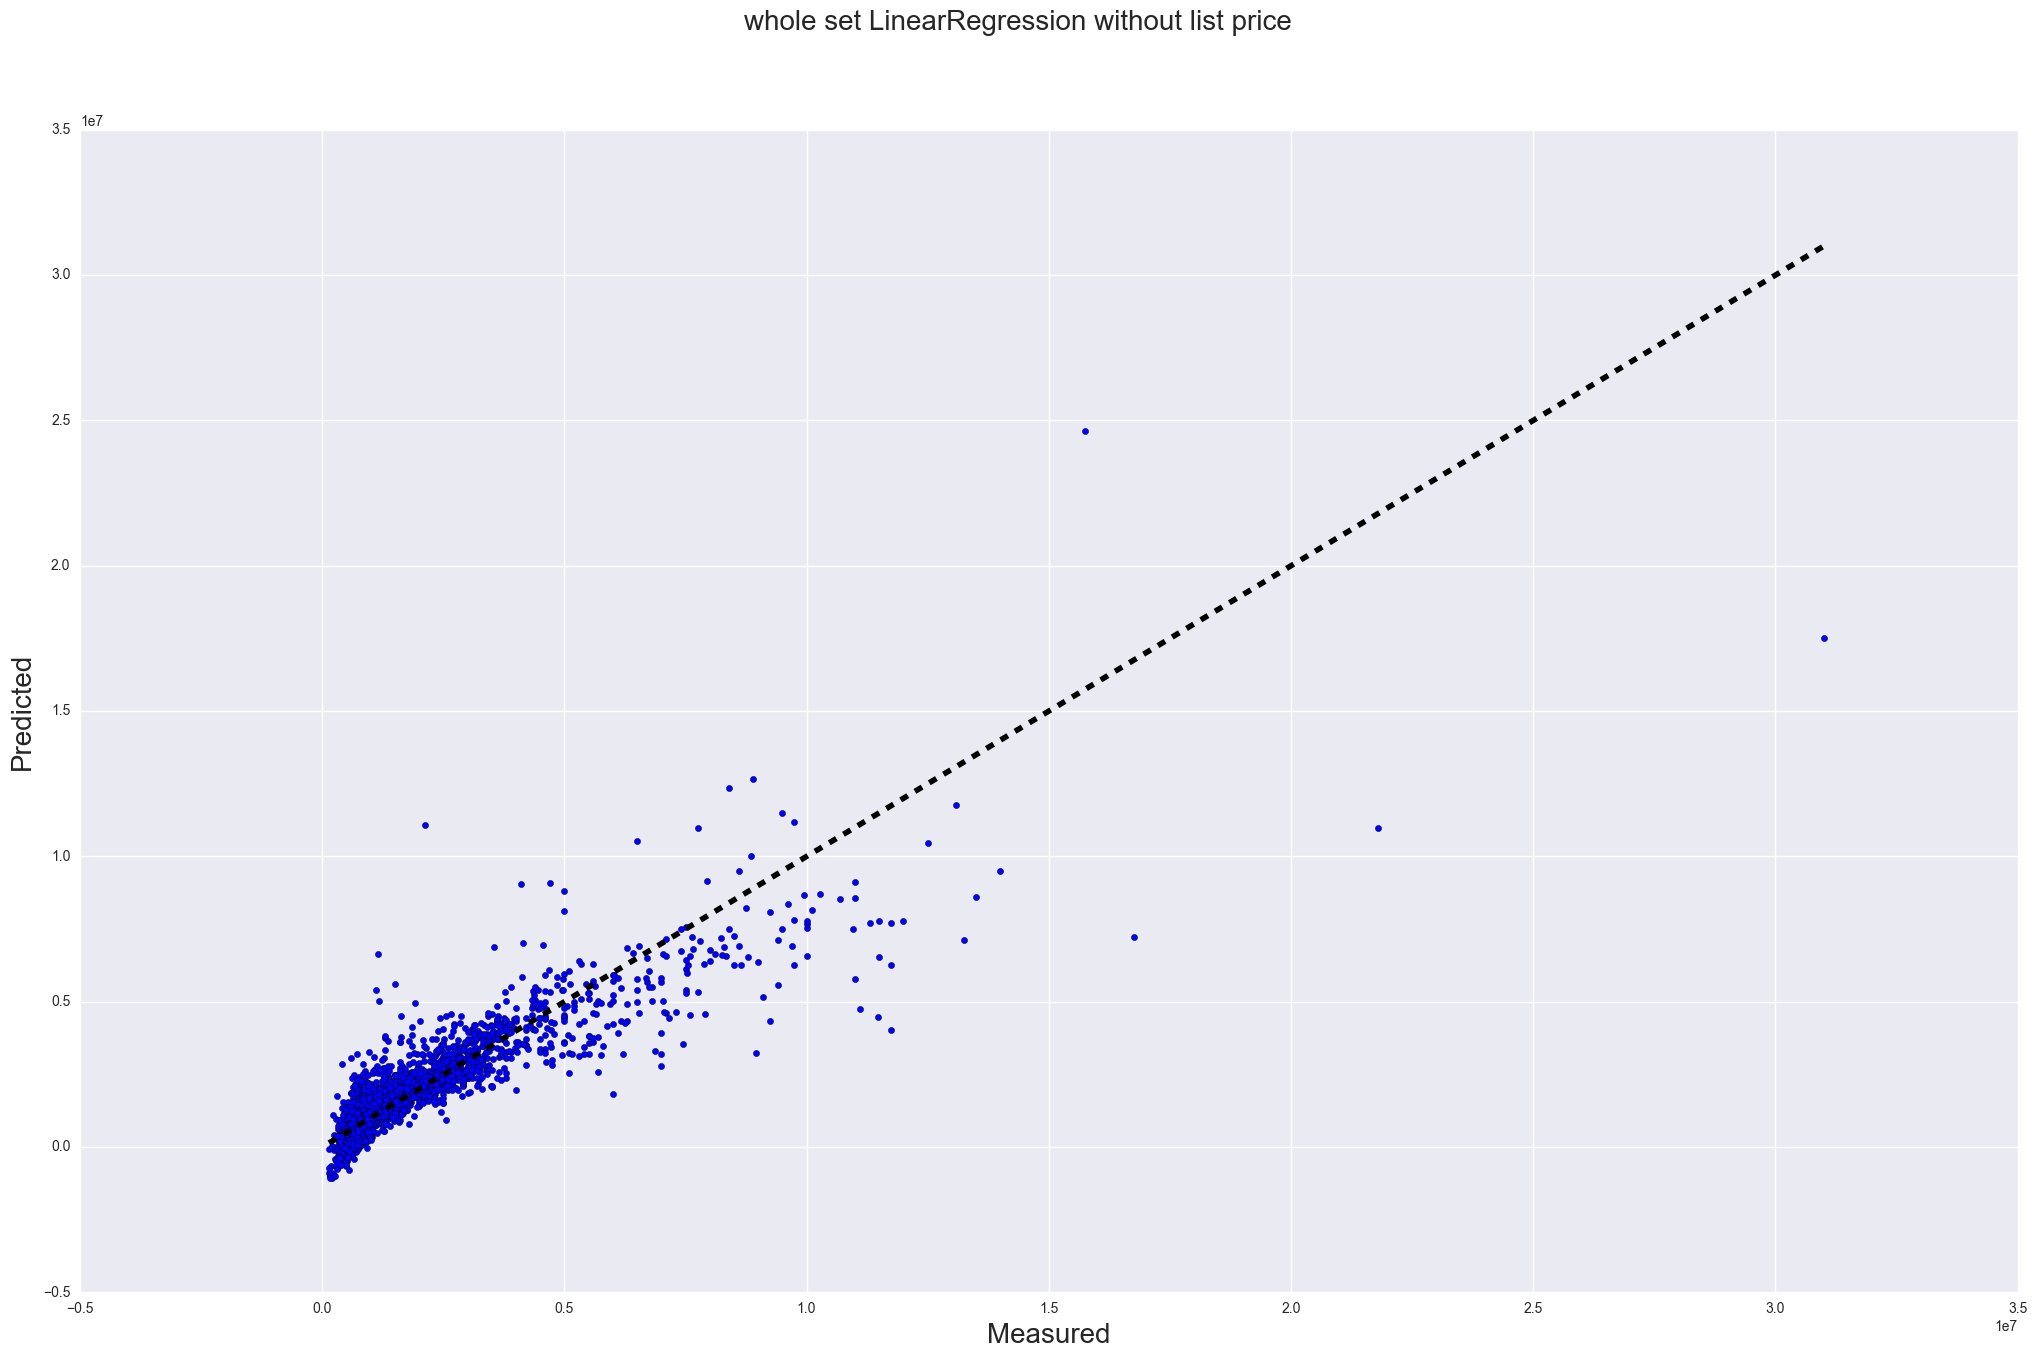

In [98]:
# The whole set
X_sold.pop('list_price')
predicted_all = cross_val_predict(lr3, X_sold, y_sold, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('whole set LinearRegression without list price', fontsize=20)
ax.scatter(y_sold, predicted_all)
ax.plot([y_sold.min(), y_sold.max()], [y_sold.min(), y_sold.max()], 'k--', lw=4)
ax.set_xlabel('Measured', fontsize=20)
ax.set_ylabel('Predicted', fontsize=20)
plt.show()

In [99]:
print('lr3 All Variance score: %.2f' % lr3.score(X_sold, y_sold))

lr3 All Variance score: 0.80


In [100]:
print 'Date        Square-Foot     Sale-price    Predicted price w LP   Predicted w/o LP    S-P error'
for i in xrange(30):
    print X_test.index[i].date(),'     ', X_test.sqft[i],'     ', y_test[i], '     ', predicted_test2[i], '     ', predicted_test3[i], '    ', y_test[i]-predicted_test2[i]


Date        Square-Foot     Sale-price    Predicted price w LP   Predicted w/o LP    S-P error
2016-08-16       1312       850000       780080.85583       1054243.33205      69919.14417
2016-08-16       1060       1315000       1195820.20074       552679.953402      119179.799258
2016-08-16       760       670000       552954.048467       -17743.0437017      117045.951533
2016-08-16       4617       9750000       8720166.07883       6935911.07189      1029833.92117
2016-08-16       700       917500       1240030.99199       1341472.88097      -322530.991988
2016-08-16       1050       980000       1086921.99963       1292908.81035      -106921.999628
2016-08-17       975       790000       697567.762078       299593.00887      92432.2379221
2016-08-17       1000       775000       722474.875282       564356.93482      52525.1247176
2016-08-17       550       699000       970520.594916       710353.376678      -271520.594916
2016-08-17       1210       1050000       1068107.97373       

In [102]:
print 'Date        Square-Foot     Sale-price  Pred. w LP   Pred. w/o LP    S-P error'
for i in xrange(30):
    print X_test.index[i].date(),'     ', X_test.sqft[i],'     ', y_test[i], '     ', np.round(predicted_test2[i], 2), '     ', np.round(predicted_all[i], 2), '    ', np.round(y_test[i]-predicted_all[i], 2)

Date        Square-Foot     Sale-price  Pred. w LP   Pred. w/o LP    S-P error
2016-08-16       1312       850000       780080.86       320150.72      529849.28
2016-08-16       1060       1315000       1195820.2       1250532.9      64467.1
2016-08-16       760       670000       552954.05       392689.99      277310.01
2016-08-16       4617       9750000       8720166.08       1368458.91      8381541.09
2016-08-16       700       917500       1240030.99       561219.56      356280.44
2016-08-16       1050       980000       1086922.0       -87067.05      1067067.05
2016-08-17       975       790000       697567.76       173711.44      616288.56
2016-08-17       1000       775000       722474.88       625766.64      149233.36
2016-08-17       550       699000       970520.59       -357522.01      1056522.01
2016-08-17       1210       1050000       1068107.97       907415.45      142584.55
2016-08-17       527       385000       -56847.45       3918350.63      -3533350.63
2016-08-17  

In [103]:
X_train.head(3)

,bedroom,bath,parking,sqft,home_own_ass,day_on_market,single_f_h,condo,dist_no,sold_year,...,North Waterfront,Outer Mission,Pacific Heights,Portola,Presidio Heights,Russian Hill,Silver Terrace,Telegraph Hill,Van Ness/Civic Cente,Visitacion Valley
sold,,,,,,,,,,,,,,,,,,,,,
2013-11-12,1,1.0,1,700,511.14,35,0,1,8,2013,...,0,0,0,0,0,0,0,0,0,0
2013-11-12,2,2.0,1,1456,565.00,38,0,1,8,2013,...,0,0,0,0,0,0,0,0,0,0
2013-11-12,2,1.5,0,744,556.00,8,0,1,8,2013,...,0,0,0,0,0,0,0,0,0,0


In [104]:
y_train.head(3)


sold
2013-11-12     610000
2013-11-12    1130000
2013-11-12     595000
Name: sale_price, dtype: int64

In [105]:
X_train.shape

(4000, 35)

In [106]:
y_train.shape

(4000,)

In [107]:
X_test.shape

(340, 35)

In [108]:
y_test.shape

(340,)

In [109]:
np.log10(y_train).head(3)


sold
2013-11-12    5.785330
2013-11-12    6.053078
2013-11-12    5.774517
Name: sale_price, dtype: float64

lr_log Train Variance score: 0.85


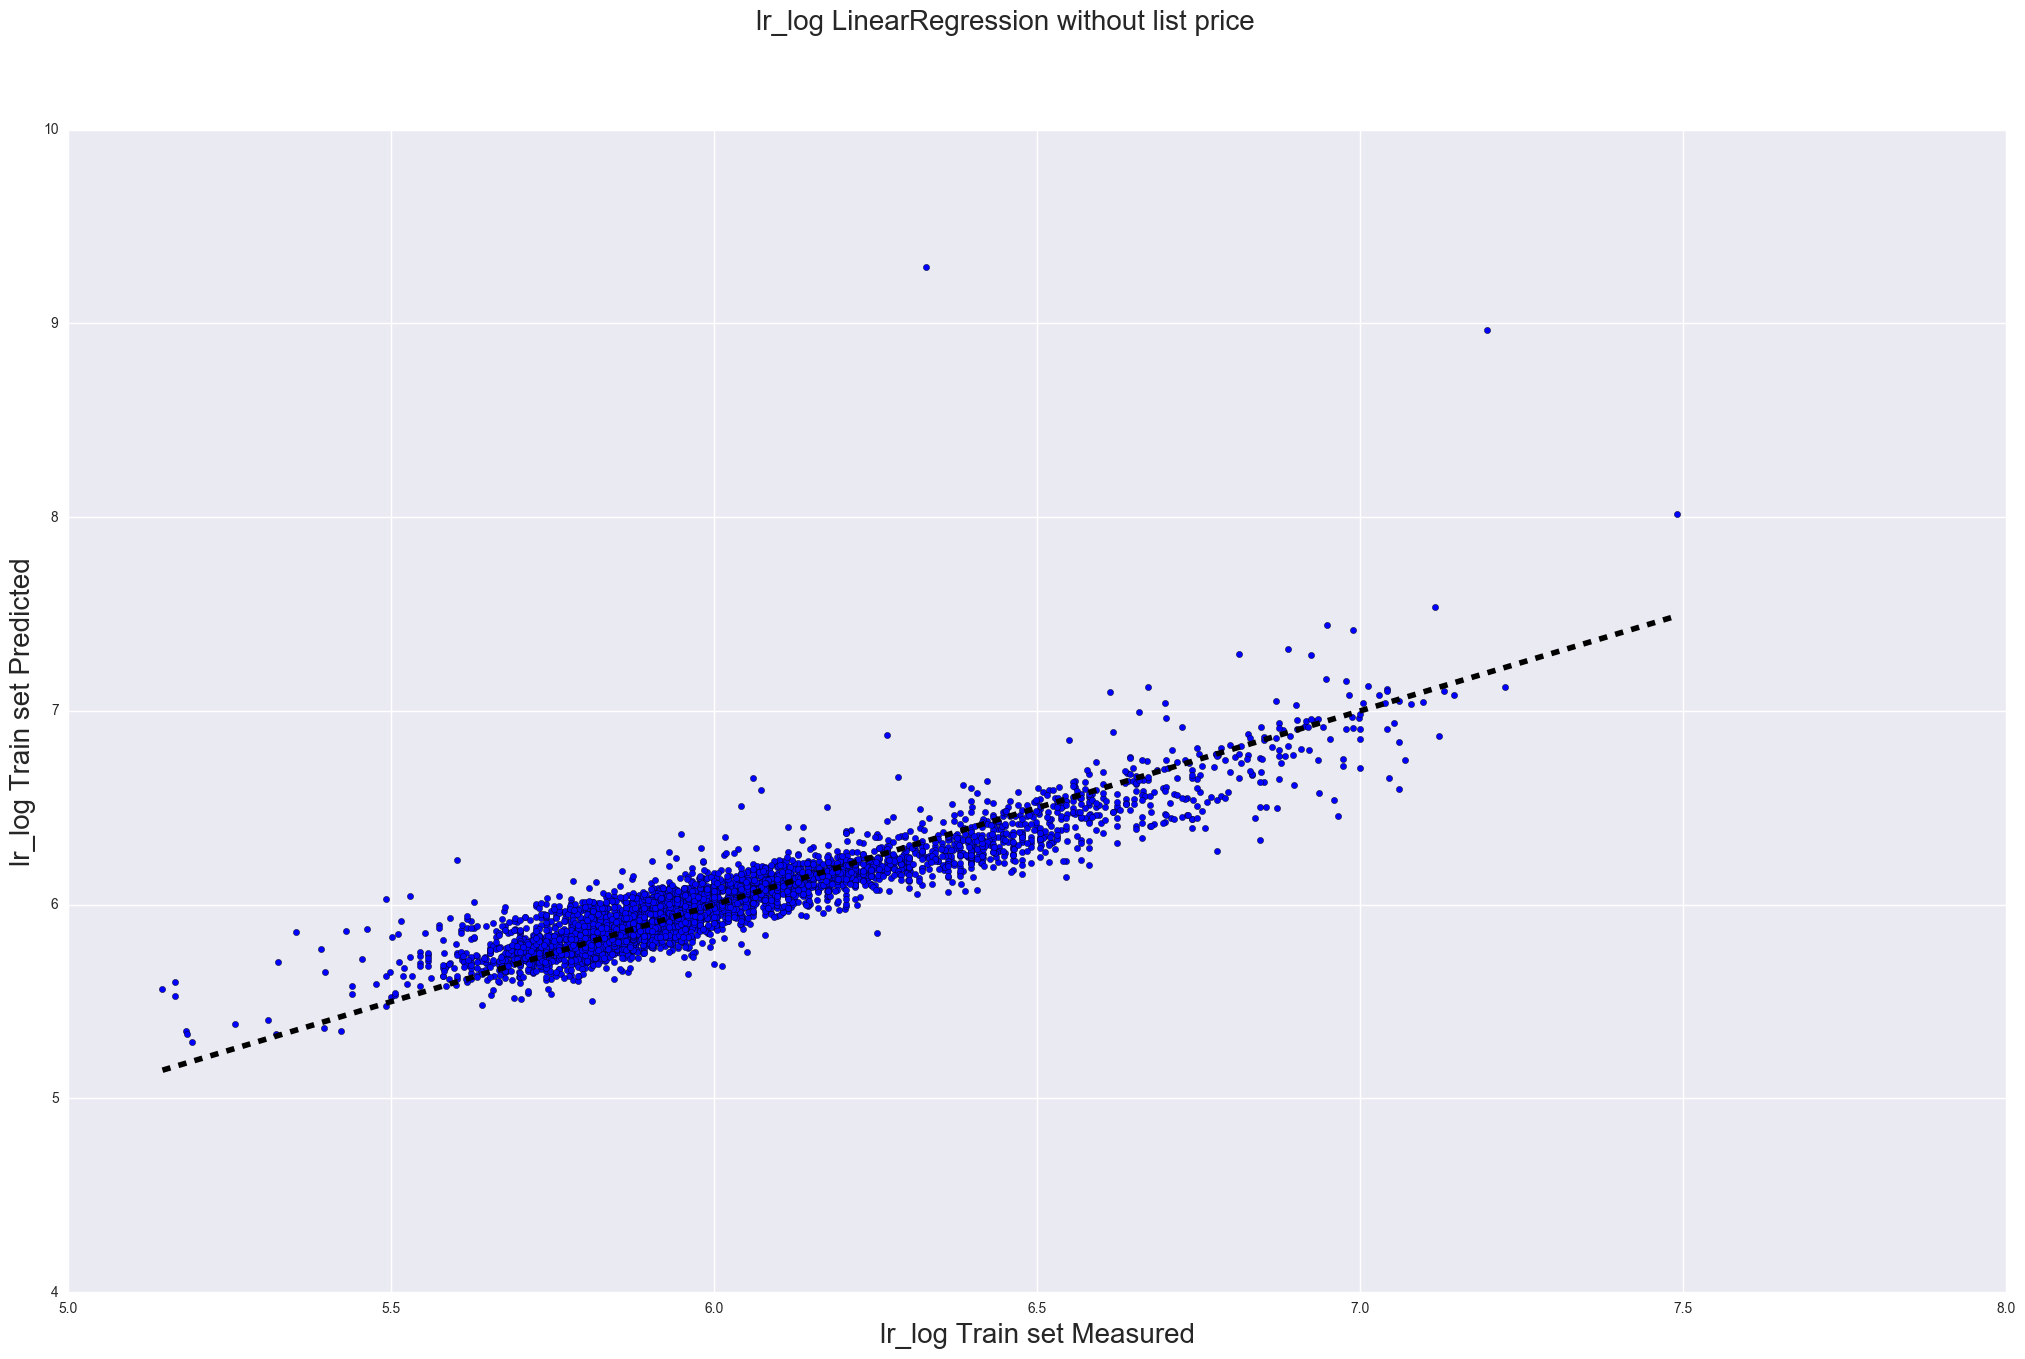

In [110]:
y_train_log = np.log10(y_train)
y_test_log = np.log10(y_test)

lr_log= linear_model.LinearRegression(normalize = True)
lr_log.fit(X_train, y_train_log)
# Train
print('lr_log Train Variance score: %.2f' % lr_log.score(X_train, y_train_log))
predicted_train_log = cross_val_predict(lr_log, X_train, y_train_log, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr_log LinearRegression without list price', fontsize=20)
ax.scatter(y_train_log, predicted_train_log)
ax.plot([y_train_log.min(), y_train_log.max()], [y_train_log.min(), y_train_log.max()], 'k--', lw=4)
ax.set_xlabel('lr_log Train set Measured', fontsize=20)
ax.set_ylabel('lr_log Train set Predicted', fontsize=20)
plt.show()


lr_log Test Variance score: 0.86


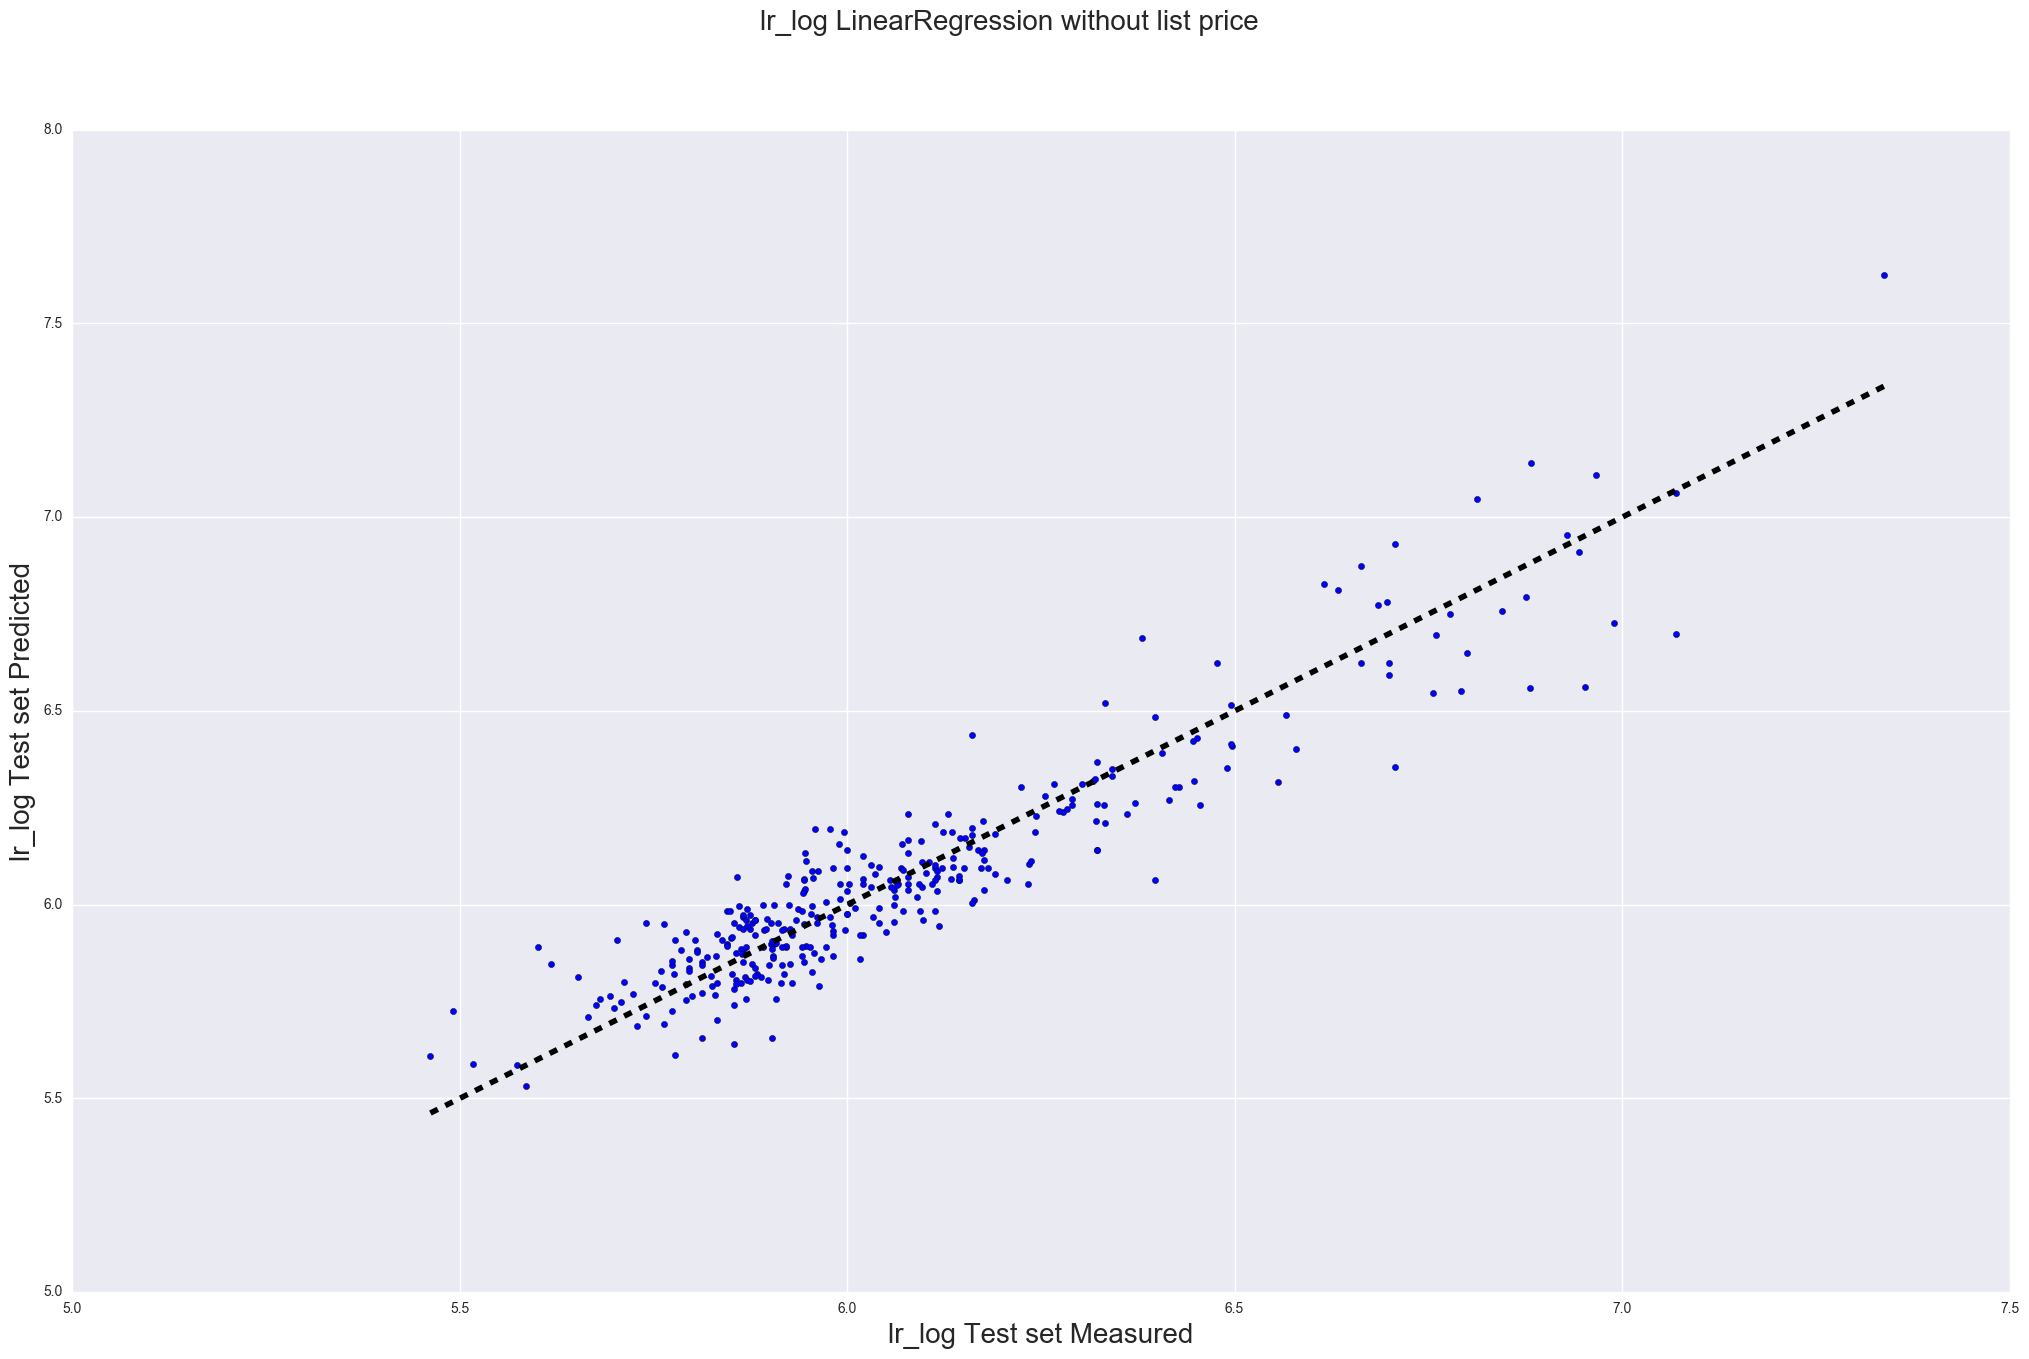

In [114]:
print('lr_log Test Variance score: %.2f' % lr_log.score(X_test, y_test_log))

# Train
predicted_test_log = cross_val_predict(lr_log, X_test, y_test_log, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr_log LinearRegression without list price', fontsize=20)
ax.scatter(y_test_log, predicted_test_log)
ax.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'k--', lw=4)
ax.set_xlabel('lr_log Test set Measured', fontsize=20)
ax.set_ylabel('lr_log Test set Predicted', fontsize=20)
plt.show()

In [124]:
print 'Date        Square-Foot     Sale-price    Predicted price '
for i in xrange(30):
    print X_test.index[i].date(),'     ', X_test.sqft[i],'     ', np.power(10, y_test_log[i]), '     ', np.power(10, predicted_test_log[i]).round(2)

Date        Square-Foot     Sale-price    Predicted price 
2016-08-16       1312       850000.0       626433.54
2016-08-16       1060       1315000.0       881683.07
2016-08-16       760       670000.0       615265.41
2016-08-16       4617       9750000.0       5327978.95
2016-08-16       700       917500.0       1218814.18
2016-08-16       1050       980000.0       1134194.4
2016-08-17       975       790000.0       637804.38
2016-08-17       1000       775000.0       649381.63
2016-08-17       550       699000.0       964661.62
2016-08-17       1210       1050000.0       835362.55
2016-08-17       527       385000.0       339820.83
2016-08-17       1140       1100000.0       982171.89
2016-08-18       1841       1850000.0       2053525.03
2016-08-18       1290       755000.0       897687.13
2016-08-18       460       760000.0       835362.55
2016-08-18       1350       1475000.0       1382372.23
2016-08-19       900       850000.0       835362.55
2016-08-19       1394       805000.0 

In [125]:
print 'Date        Sale price  Pred. with list p    W/o list p     W - W/o diff'
for i in xrange(30):
    print df_sold.index[4000+i].date(), '    ', df_sold.sale_price[4000+i], '    ', np.around(np.power(10, linreg3.fittedvalues[4000+i]), decimals = 2), '     ', np.around(np.power(10, linreg4.fittedvalues[4000+i]), decimals = 2), '    ',np.around(np.power(10,linreg3.fittedvalues[4000+i])-np.power(10,linreg4.fittedvalues[4000+i]), decimals = 2)

Date        Sale price  Pred. with list p    W/o list p     W - W/o diff
2016-08-16      850000      833941.07       674407.24      159533.82
2016-08-16      1315000      1033950.63       903702.01      130248.61
2016-08-16      670000      653632.68       630117.05      23515.63
2016-08-16      9750000      9778898.96       5793032.39      3985866.57
2016-08-16      917500      1025620.36       1220425.94      -194805.59
2016-08-16      980000      1040687.88       1330922.59      -290234.71
2016-08-17      790000      726092.66       649498.45      76594.21
2016-08-17      775000      805822.42       636907.54      168914.89
2016-08-17      699000      802589.33       1136176.26      -333586.93
2016-08-17      1050000      1136525.85       932925.13      203600.72
2016-08-17      385000      366773.16       348119.0      18654.16
2016-08-17      1100000      1065574.1       1323800.79      -258226.69
2016-08-18      1850000      1847061.88       1816531.21      30530.67
2016-08-18   

In [126]:
X_sold.head(3)

,bedroom,bath,parking,sqft,home_own_ass,day_on_market,single_f_h,condo,dist_no,sold_year,...,North Waterfront,Outer Mission,Pacific Heights,Portola,Presidio Heights,Russian Hill,Silver Terrace,Telegraph Hill,Van Ness/Civic Cente,Visitacion Valley
sold,,,,,,,,,,,,,,,,,,,,,
2013-11-12,1,1.0,1,700,511.14,35,0,1,8,2013,...,0,0,0,0,0,0,0,0,0,0
2013-11-12,2,2.0,1,1456,565.00,38,0,1,8,2013,...,0,0,0,0,0,0,0,0,0,0
2013-11-12,2,1.5,0,744,556.00,8,0,1,8,2013,...,0,0,0,0,0,0,0,0,0,0


In [127]:
X_sold.columns

Index([               u'bedroom',                   u'bath',
                      u'parking',                   u'sqft',
                 u'home_own_ass',          u'day_on_market',
                   u'single_f_h',                  u'condo',
                      u'dist_no',              u'sold_year',
                   u'sold_month',      u'Bayview Heights  ',
                    u'Bayview  ',    u'Candlestick Point  ',
                 u'Cow Hollow  ',       u'Crocker Amazon  ',
                   u'Downtown  ',            u'Excelsior  ',
         u'Financial District  ',        u'Hunters Point  ',
           u'Little Hollywood  ',               u'Marina  ',
            u'Mission Terrace  ',             u'Nob Hill  ',
                u'North Beach  ',     u'North Waterfront  ',
              u'Outer Mission  ',      u'Pacific Heights  ',
                    u'Portola  ',     u'Presidio Heights  ',
               u'Russian Hill  ',       u'Silver Terrace  ',
             u'Telegraph

In [128]:
y_sold.head()

sold
2013-11-12     610000
2013-11-12    1130000
2013-11-12     595000
2013-11-13     510000
2013-11-13     625000
Name: sale_price, dtype: int64

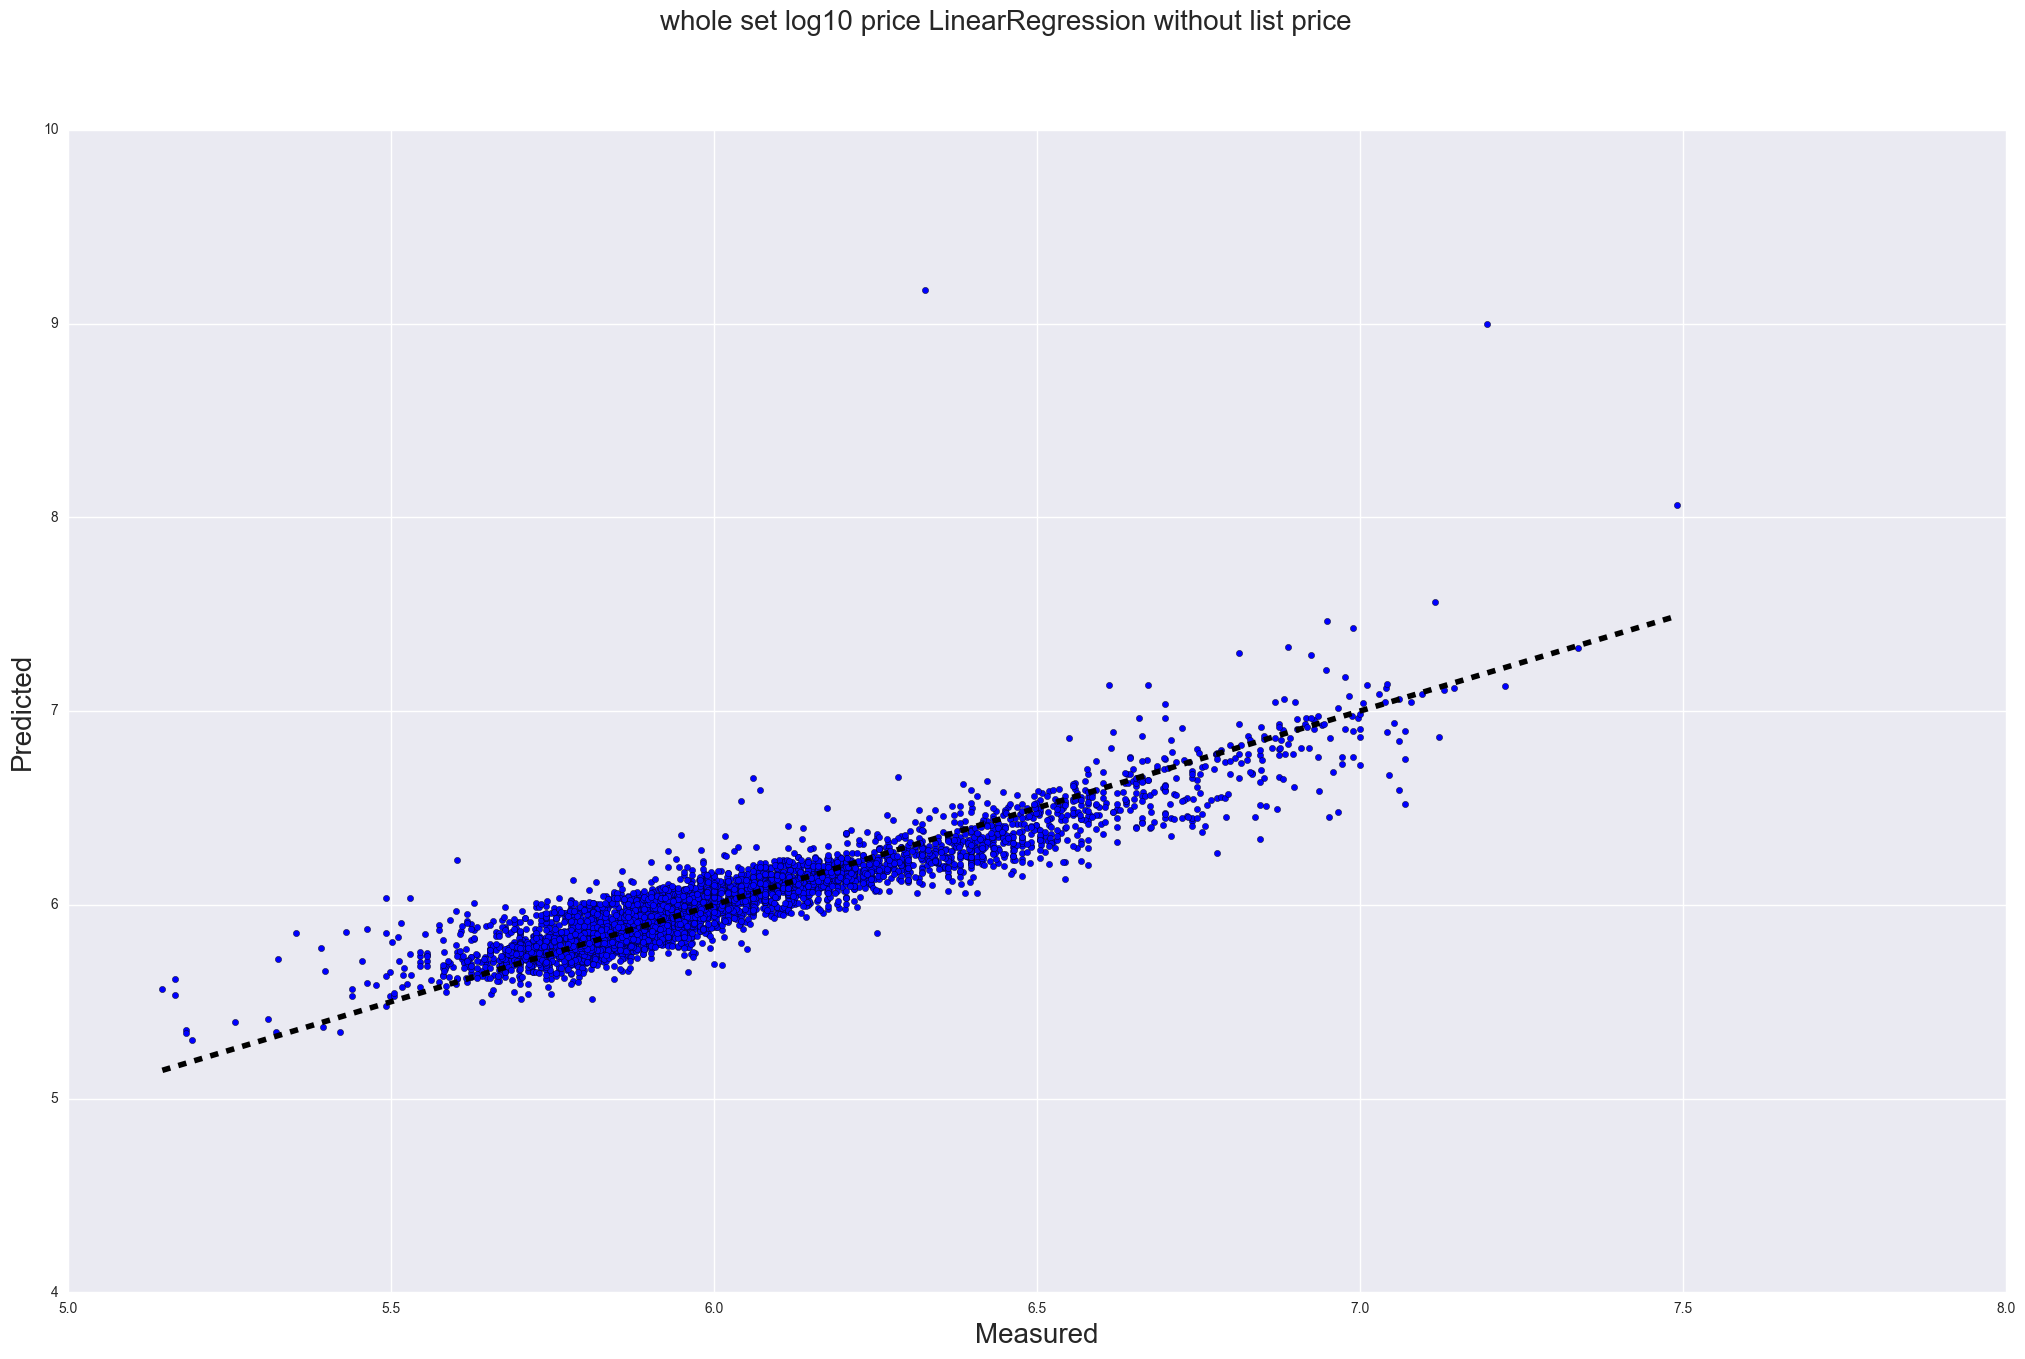

lr_log_all All Variance score: 0.85


In [129]:
y_sold_log = np.log10(y_sold)

lr_log_all= linear_model.LinearRegression(normalize = True)
lr_log_all.fit(X_sold, y_sold_log)
predicted_all_log = cross_val_predict(lr_log_all, X_sold, y_sold_log, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('whole set log10 price LinearRegression without list price', fontsize=20)
ax.scatter(y_sold_log, predicted_all_log)
ax.plot([y_sold_log.min(), y_sold_log.max()], [y_sold_log.min(), y_sold_log.max()], 'k--', lw=4)
ax.set_xlabel('Measured', fontsize=20)
ax.set_ylabel('Predicted', fontsize=20)
plt.show()

print('lr_log_all All Variance score: %.2f' % lr_log_all.score(X_sold, y_sold_log))

In [132]:
print np.power(10, y_test_log[0]), np.power(10, y_sold_log[4000])

850000.0 850000.0


In [133]:
print 'Date        Square-Foot     Sale-price    Predicted price '
for i in xrange(30):
    print X_test.index[i].date(),'     ', X_test.sqft[i],'     ', np.power(10, y_test_log[i]), '     ', np.power(10, predicted_all_log[4000+i]).round(2)

Date        Square-Foot     Sale-price    Predicted price 
2016-08-16       1312       850000.0       682697.82
2016-08-16       1060       1315000.0       910904.1
2016-08-16       760       670000.0       638163.03
2016-08-16       4617       9750000.0       5803257.95
2016-08-16       700       917500.0       1242333.74
2016-08-16       1050       980000.0       1358490.61
2016-08-17       975       790000.0       657093.17
2016-08-17       1000       775000.0       639959.28
2016-08-17       550       699000.0       1161944.93
2016-08-17       1210       1050000.0       948529.37
2016-08-17       527       385000.0       353261.01
2016-08-17       1140       1100000.0       1357727.14
2016-08-18       1841       1850000.0       1837215.73
2016-08-18       1290       755000.0       876740.55
2016-08-18       460       760000.0       1014153.08
2016-08-18       1350       1475000.0       1588282.44
2016-08-19       900       850000.0       731162.1
2016-08-19       1394       805000.

In [134]:
print 'Date        Square-Foot     Sale-price    Predicted price '
for i in xrange(30):
    print X_test.index[i].date(),'     ', X_test.sqft[i],'     ', np.power(10, y_test_log[i]), '     ', np.power(10, predicted_test_log[i]).round(2)


Date        Square-Foot     Sale-price    Predicted price 
2016-08-16       1312       850000.0       626433.54
2016-08-16       1060       1315000.0       881683.07
2016-08-16       760       670000.0       615265.41
2016-08-16       4617       9750000.0       5327978.95
2016-08-16       700       917500.0       1218814.18
2016-08-16       1050       980000.0       1134194.4
2016-08-17       975       790000.0       637804.38
2016-08-17       1000       775000.0       649381.63
2016-08-17       550       699000.0       964661.62
2016-08-17       1210       1050000.0       835362.55
2016-08-17       527       385000.0       339820.83
2016-08-17       1140       1100000.0       982171.89
2016-08-18       1841       1850000.0       2053525.03
2016-08-18       1290       755000.0       897687.13
2016-08-18       460       760000.0       835362.55
2016-08-18       1350       1475000.0       1382372.23
2016-08-19       900       850000.0       835362.55
2016-08-19       1394       805000.0 

In [135]:
df.head(1)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
0,113 Pixley St,Cow Hollow,3,3.5,2,1360,2022.058824,2016-04-29,0.0,73,2900000,2750000,94.827586,1,0,7,2016,4


In [138]:
residuals = np.array(linreg4.outlier_test()['student_resid'])

In [139]:
residuals.shape

(4340,)

In [141]:
residuals[0:10]

array([ 0.23496722,  0.56403854, -1.49099693, -1.82665708, -0.95918711,
        0.3366772 , -0.14147016, -0.88747704,  0.28965642,  0.86416845])

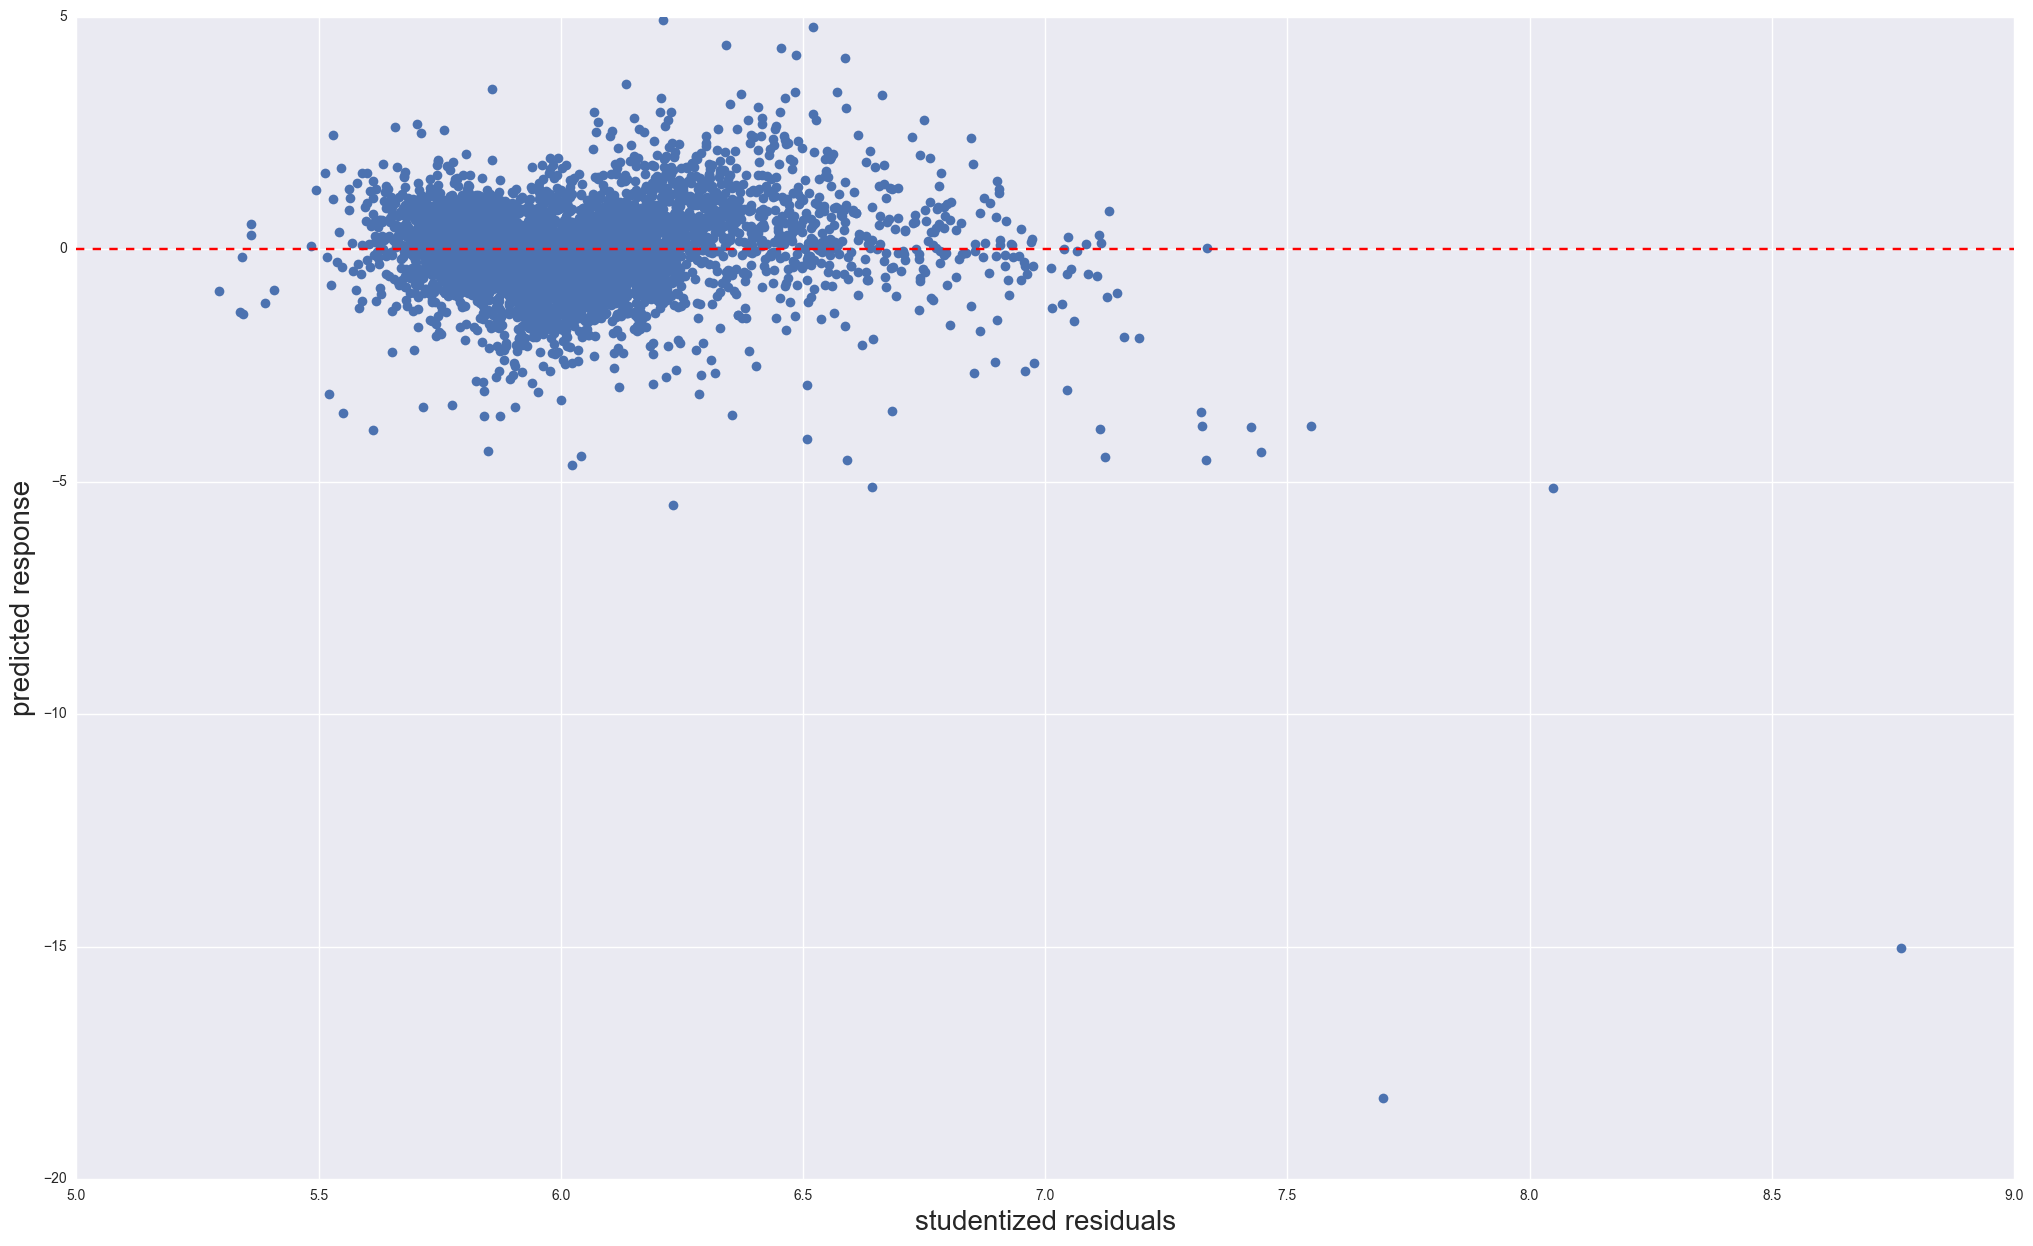

In [145]:
fig = plt.figure(figsize=(25,15))
plt.plot(linreg4.fittedvalues, resids, 'o')
plt.xlabel('studentized residuals', fontsize=20)
plt.ylabel('predicted response', fontsize=20)
plt.axhline(0, c='r', linestyle = '--')

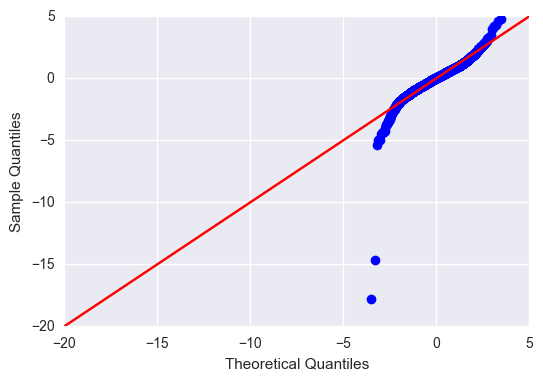

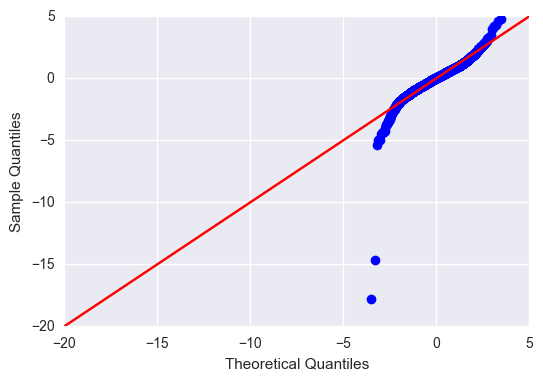

In [149]:
sm.graphics.qqplot(resids, line='45', fit=True)

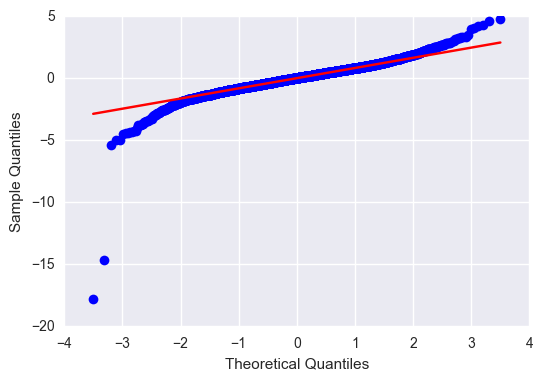

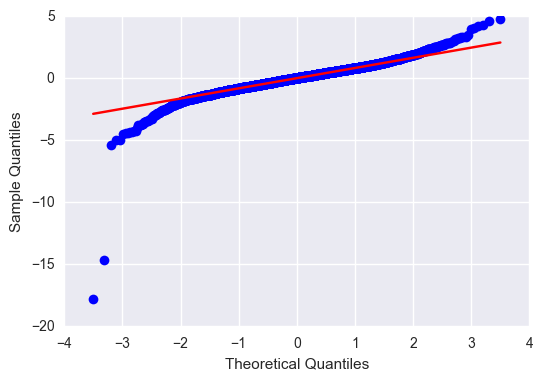

In [153]:
sm.graphics.qqplot(resids, line='q', fit=True)

In [155]:
from statsmodels.graphics import regressionplots as smg

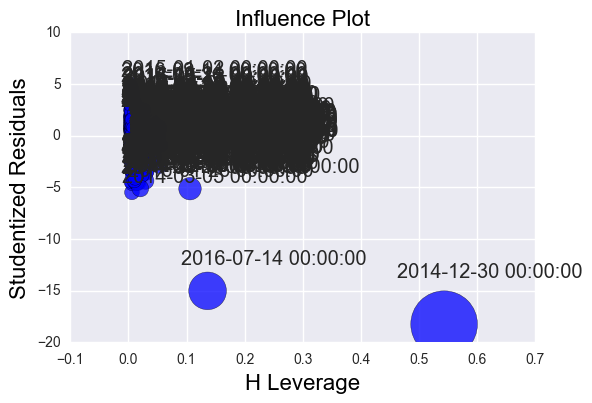

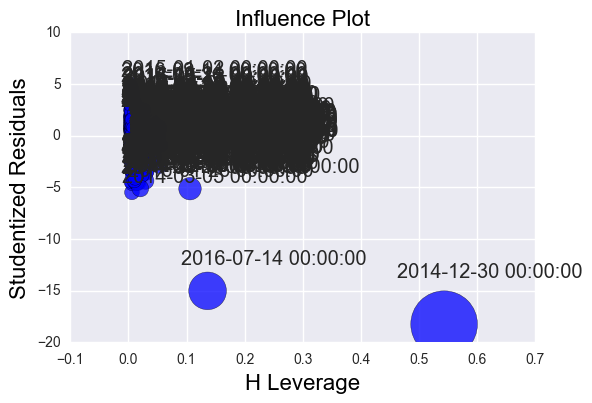

In [156]:
smg.influence_plot(linreg4)


In [164]:
df_sold.loc['2014-12-30']

,address,district,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
sold,,,,,,,,,,,,,,,,,
2014-12-30,666 Post St #1601,Downtown,1,1.0,0,590,889.830508,445.41,32,525000,525000,100.000000,0,1,8,2014,12
2014-12-30,1037 Vallejo St,Russian Hill,3,2.5,2,2590,1563.706564,2867.68,80,4190000,4050000,96.658711,0,1,8,2014,12
2014-12-30,120 Wetmore St #5,Nob Hill,2,2.0,1,1219,902.378999,568.26,15,980000,1100000,112.244898,0,1,8,2014,12
2014-12-30,260 Niagara Ave,Outer Mission,2,1.0,3,1125,715.555556,0.00,0,749000,805000,107.476636,1,0,10,2014,12
2014-12-30,2179 Pacific Ave,Pacific Heights,4,2.5,1,2775,906.306306,600.00,87,2775000,2515000,90.630631,0,1,7,2014,12
2014-12-30,85 Casa Way,Marina,3,3.5,2,2550,984.313725,0.00,0,2500000,2510000,100.400000,1,0,7,2014,12
2014-12-30,1726 Keith St,Bayview,4,2.0,1,1495,468.227425,0.00,46,668000,700000,104.790419,1,0,10,2014,12
2014-12-30,1388 Gough St #703,Van Ness/Civic Cente,2,2.0,1,1192,868.288591,915.31,29,990000,1035000,104.545455,0,1,8,2014,12
2014-12-30,690 Market St #2101,Financial District,2,2.0,1,1515,1402.640264,31356.77,0,2195000,2125000,96.810934,0,1,8,2014,12


In [166]:
df_sold.loc['2016-07-14']

,address,district,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
sold,,,,,,,,,,,,,,,,,
2016-07-14,1422 Palou Ave,Bayview,2,1.0,2,1200,608.333333,0.00,28,599000,730000,121.869783,1,0,10,2016,7
2016-07-14,3800-3810 Washington St,Presidio Heights,14,11.0,5,20516,767.693508,0.00,442,17995000,15750000,87.524312,1,0,7,2016,7
2016-07-14,1001 Pine St #503,Downtown,1,1.0,1,650,946.153846,488.15,14,595000,615000,103.361345,0,1,8,2016,7


In [137]:
X_sold.head()

,bedroom,bath,parking,sqft,home_own_ass,day_on_market,list_price,single_f_h,condo,dist_no,...,Pacific Heights,Portola,Presidio Heights,Russian Hill,Silver Terrace,Telegraph Hill,Van Ness/Civic Cente,Visitacion Valley,sin_month,cos_month
sold,,,,,,,,,,,,,,,,,,,,,
2013-11-12,2,2.0,1,1456,565.00,38,1195000,0,1,8,...,0,0,0,0,0,0,0,0,-0.5,0.866025
2013-11-12,1,1.0,1,700,511.14,35,599000,0,1,8,...,0,0,0,0,0,0,0,0,-0.5,0.866025
2013-11-12,2,1.5,0,744,556.00,8,500000,0,1,8,...,0,0,0,0,0,0,0,0,-0.5,0.866025
2013-11-13,2,1.5,1,1277,0.00,85,1299888,0,1,7,...,0,0,0,0,0,0,0,0,-0.5,0.866025
2013-11-13,1,1.0,1,605,434.75,22,589000,0,1,8,...,0,0,0,0,0,0,0,0,-0.5,0.866025


In [138]:
X_sold.columns

Index([               u'bedroom',                   u'bath',
                      u'parking',                   u'sqft',
                 u'home_own_ass',          u'day_on_market',
                   u'list_price',             u'single_f_h',
                        u'condo',                u'dist_no',
                    u'sold_year',      u'Bayview Heights  ',
                    u'Bayview  ',    u'Candlestick Point  ',
                 u'Cow Hollow  ',       u'Crocker Amazon  ',
                   u'Downtown  ',            u'Excelsior  ',
       u'Financial District/B  ',        u'Hunters Point  ',
           u'Little Hollywood  ',               u'Marina  ',
            u'Mission Terrace  ',             u'Nob Hill  ',
                u'North Beach  ',     u'North Waterfront  ',
              u'Outer Mission  ',      u'Pacific Heights  ',
                    u'Portola  ',     u'Presidio Heights  ',
               u'Russian Hill  ',       u'Silver Terrace  ',
             u'Telegraph

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_sold, y_sold, test_size=0.4, random_state=0)

In [147]:
X_train.shape

(2604, 37)

In [148]:
X_test.shape

(1736, 37)

In [149]:
y_train.shape

(2604,)

In [150]:
y_test.shape

(1736,)

In [151]:
lr1 = linear_model.LinearRegression()

In [152]:
lr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [154]:
lr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [ ]:
#print clf.score(X_test, y_test)  

In [ ]:
#clf[0]

In [ ]:
#type(clf)

In [ ]:
#from sklearn.svm import SVC

In [ ]:
#np.log(df_sold.sale_price)


In [155]:
print('Coefficients: \n', lr1.coef_)

('Coefficients: \n', array([ -3.83884834e+03,   7.13008741e+04,   3.11747317e+04,
         2.35837989e+01,   2.02927010e+01,  -2.38186813e+03,
         8.34750527e-01,   9.81987962e+04,  -9.81987962e+04,
        -1.00021982e+05,   1.51510132e+04,   1.16693171e+04,
        -1.71588632e+04,   8.82084650e+04,  -1.78826785e+04,
        -2.09880068e+04,  -3.84745289e+04,  -1.99000404e+04,
        -1.27817884e+04,   7.22996908e+04,   1.27589692e+04,
        -4.19426975e+04,   1.91653104e+04,   2.72472414e+04,
        -1.61092956e+04,  -5.60105111e+04,  -3.33650212e+04,
         1.82750065e+04,  -3.90454205e+04,   9.97636649e+04,
         1.08446326e+05,  -2.50202272e+04,  -1.66290132e+04,
        -3.29973821e+04,  -6.95285167e+04,   7.56154807e+03,
        -7.78807436e+03]))


In [156]:
print("Mean squared error: %.2f"
      % np.mean((lr1.predict(X_test) - y_test) ** 2))

Mean squared error: 56578297781.02


In [93]:
np.power(10, np.power(10, 0.76))

568066.75446238264

In [94]:
np.power(10, np.power(10, 0.78))

1060708.0399892735

In [95]:
np.power(10, np.power(10, 0.78))-np.power(10, np.power(10, 0.76))

492641.28552689089

In [157]:
print('Variance score: %.2f' % lr1.score(X_test, y_test))

Variance score: 0.98


In [159]:
predicted = cross_val_predict(lr1, X_train, y_train, cv=10)

In [161]:
y_train.shape

(2604,)

In [162]:
predicted.shape

(2604,)

In [163]:
y_test.shape

(1736,)

In [165]:
X_test.head()

,bedroom,bath,parking,sqft,home_own_ass,day_on_market,list_price,single_f_h,condo,dist_no,...,Pacific Heights,Portola,Presidio Heights,Russian Hill,Silver Terrace,Telegraph Hill,Van Ness/Civic Cente,Visitacion Valley,sin_month,cos_month
sold,,,,,,,,,,,,,,,,,,,,,
2015-04-02,2,1.0,1,1050,0.00,33,699000,1,0,10,...,0,1,0,0,0,0,0,0,0.866025,-0.500000
2014-07-21,2,2.0,4,1245,0.00,11,249000,1,0,10,...,0,0,0,0,0,0,0,0,-0.500000,-0.866025
2014-10-21,1,1.0,1,1115,564.49,11,995000,0,1,7,...,1,0,0,0,0,0,0,0,-0.866025,0.500000
2014-04-01,2,1.0,1,750,194.00,24,139500,0,1,10,...,0,0,0,0,0,0,0,0,0.866025,-0.500000
2015-08-04,3,2.5,1,1980,230.54,0,1849000,0,1,8,...,0,0,0,0,0,0,0,0,-0.866025,-0.500000


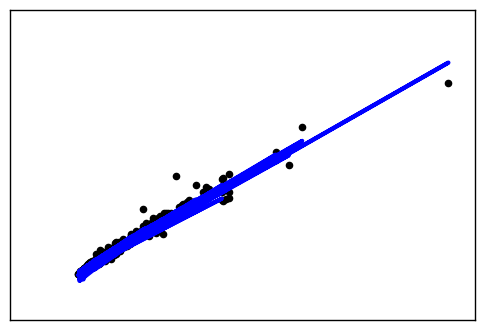

In [168]:
plt.scatter(X_test.list_price, y_test,  color='black')
plt.plot(X_test.list_price, lr1.predict(X_test), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

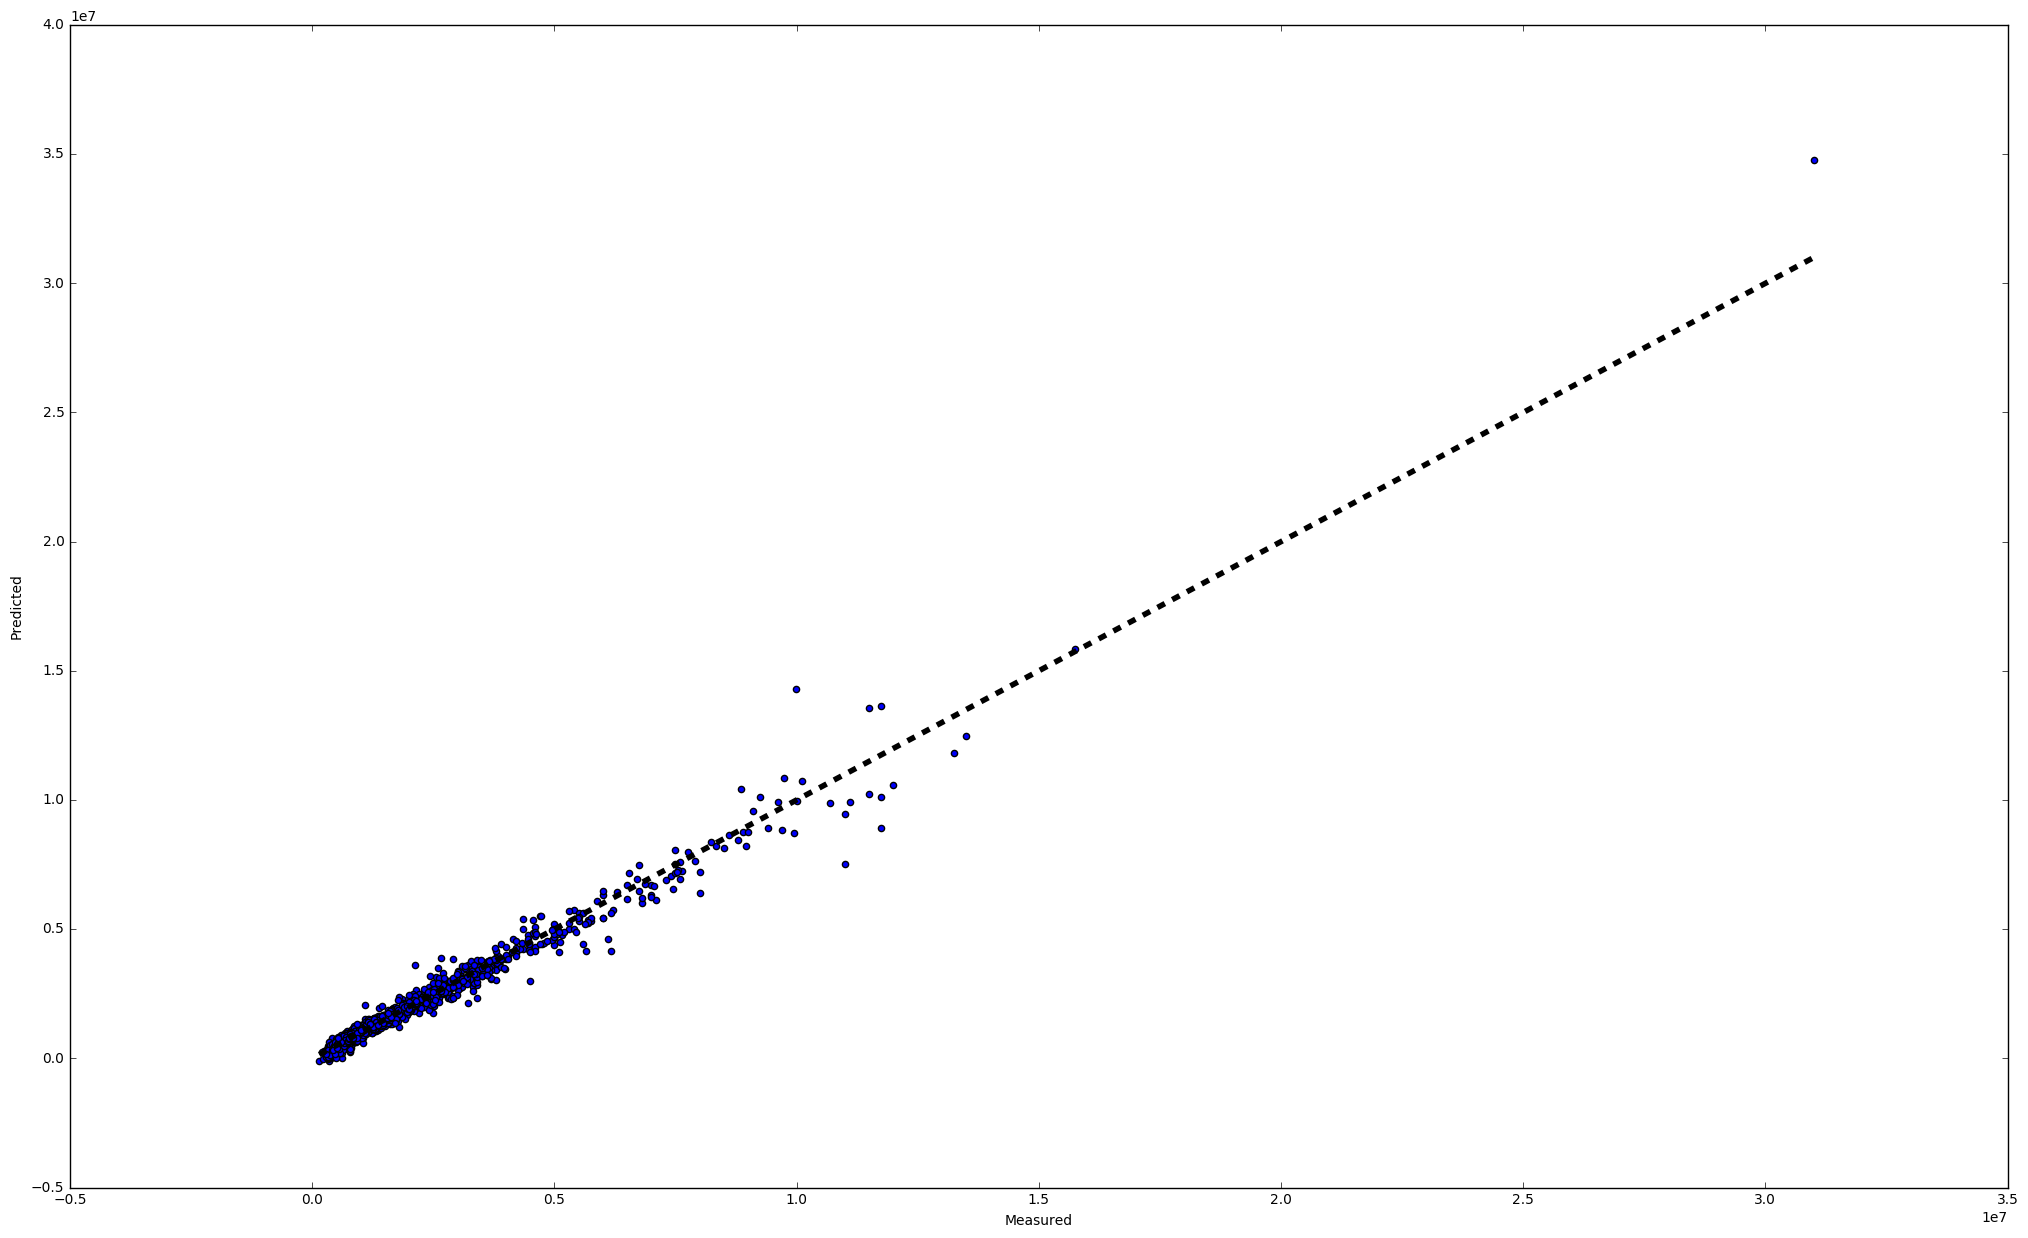

In [169]:
fig, ax = plt.subplots(figsize=(25,15))
ax.scatter(y_train, predicted)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

NameError: name 'y_test' is not defined